<h1 align="center"> Определение перспективного тарифа для телеком компании <h1 align="center">

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

### Тариф смарт

1. Ежемесячная плата: 550 рублей


2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика


3. Стоимость услуг сверх тарифного пакета:

    - минута разговора: 3 рубля

    - сообщение: 3 рубля

    - 1 Гб интернет-трафика: 200 рублей

###  Тариф ультра
1. Ежемесячная плата: 1950 рублей


2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика


3. Стоимость услуг сверх тарифного пакета:

    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

## Описание данных

1. **Таблица `users` (информация о пользователях):**

    - user_id — уникальный идентификатор пользователя
    
    - first_name — имя пользователя
    
    - last_name — фамилия пользователя
    
    - age — возраст пользователя (годы)
    
    - reg_date — дата подключения тарифа (день, месяц, год)
    
    - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    
    - city — город проживания пользователя
    
    - tariff — название тарифного плана
    
    
2. **Таблица `calls` (информация о звонках):**

    - id — уникальный номер звонка
    
    - call_date — дата звонка
    
    - duration — длительность звонка в минутах
    
    - user_id — идентификатор пользователя, сделавшего звонок
    
    
3. **Таблица `messages` (информация о сообщениях):**

    - id — уникальный номер сообщения
    
    - message_date — дата сообщения
    
    - user_id — идентификатор пользователя, отправившего сообщение
    
    
4. **Таблица `internet` (информация об интернет-сессиях):**

    - id — уникальный номер сессии
    
    - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    
    - session_date — дата интернет-сессии
    
    - user_id — идентификатор пользователя
    
    
5. **Таблица `tariffs` (информация о тарифах):**

    - tariff_name — название тарифа
    
    - rub_monthly_fee — ежемесячная абонентская плата в рублях
    
    - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    
    - messages_included — количество сообщений в месяц, включённых в абонентскую плату
    
    - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    
    - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    
    - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    
    - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## План проекта

1. **Чтение данных**


2. **Предобработка данных**

    - приводим данные к нужным типам
    
    - находим и исправляем ошибки в данных
    
    - для каждого пользователя считаем
 
        - количество сделанных звонков и израсходованных минут разговора по месяцам;
        - количество отправленных сообщений по месяцам;
        - объем израсходованного интернет-трафика по месяцам;
        - помесячную выручку с каждого пользователя
    
    
3. **Анализ данных**

    - посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
    - посчитаем среднее количество, дисперсию и стандартное отклонение
    - постройте гистограммы
    - опишем распределения
    
 
4. **Проверяем гипотезы**

    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
    

5. **Общий вывод**

In [7]:
# импорт библиотек

import pandas as pd
import numpy as np
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

from pymystem3 import Mystem
m = Mystem()

import datetime

In [8]:
# пропишем класс, чтобы красиво раскрашивать текст в print

class bcolors:
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [9]:
# настройка для pandas, чтобы выводились все колонки

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [10]:
# настройка палетки цветов для seaborn

sns.set_color_codes("pastel")

## Шаг 1. Открываем файлы с данными и изучаем общую информацию. 

In [11]:
# читаем файлы

try:
    
    users = pd.read_csv('/datasets/users.csv', sep=',')
    calls = pd.read_csv('/datasets/calls.csv', sep=',')
    messages = pd.read_csv('/datasets/messages.csv', sep=',')
    internet = pd.read_csv('/datasets/internet.csv', sep=',', index_col=0)
    tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
    
except FileNotFoundError:
    
    users = pd.read_csv('users.csv', sep=',')
    calls = pd.read_csv('calls.csv', sep=',')
    messages = pd.read_csv('messages.csv', sep=',')
    internet = pd.read_csv('internet.csv', sep=',', index_col=0)
    tariffs = pd.read_csv('tariffs.csv', sep=',')

Файлов достаточно много, поэтому для упрощения выполнения одинаковых операций над ними, создаем словарь в котором будем хранить все датафреймы. В качестве ключей выберем строки с их именами.

In [12]:
# создаем словарь для обращения сразу ко всем датафреймам в цикле

df_names = [ 'users', 'calls', 'messages', 'internet', 'tariffs']
df_list = [users, calls, messages, internet, tariffs]

df_dict={}

for i in range(len(df_list)):
    df_dict [df_names[i]] = df_list[i]

После того как словарь создан, можем в цикле пройти по всем датафреймам и вывести первые 5 строк в каждом

In [13]:
# в цикле печатаем название датафрейма и его первые 5 строк

for df_key in df_dict:
    print(bcolors.OKBLUE + bcolors.BOLD + df_key + bcolors.ENDC, end='')
    df = df_dict[df_key]
    display(df.head())
    print()

users

user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra


calls

id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000


messages

id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000


internet

id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000


tariffs

messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra

Все файлы прочитались корректно. Но для удобства дальнейшей обработки в качетсве индексов в датафрейме `tariffs` использвать не числа, а названия тарифов. Переиндексируем этот датафрейм

In [14]:
# переиндексируем датафрейм с тарифами

tariffs.set_index(tariffs['tariff_name'].values, inplace=True)

# выводим датафрейм с новыми индексами на экран

tariffs

messages_included  mb_per_month_included  minutes_included  \
smart                 50                  15360               500   
ultra               1000                  30720              3000   

       rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  \
smart              550         200                3               3   
ultra             1950         150                1               1   

      tariff_name  
smart       smart  
ultra       ultra

In [15]:
# в цикле печатаем название датафрейма и результпт метода info() для него

for df_key in df_dict:
    print(bcolors.OKBLUE + bcolors.BOLD + df_key + bcolors.ENDC)
    df = df_dict[df_key]
    df.info()
    print()

users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int

In [16]:
# в цикле печатаем название датафрейма и результпт метода describe() для него

for df_key in df_dict:
    print(bcolors.OKBLUE + bcolors.BOLD + df_key + bcolors.ENDC)
    df = df_dict[df_key]
    display(df.describe())
    print()

users


user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000


calls


duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


messages


user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000


internet


mb_used        user_id
count  149396.000000  149396.000000
mean      370.192426    1252.099842
std       278.300951     144.050823
min         0.000000    1000.000000
25%       138.187500    1130.000000
50%       348.015000    1251.000000
75%       559.552500    1380.000000
max      1724.830000    1499.000000


tariffs


messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  
count         2.000000    2.000000         2.000000        2.000000  
mean       1250.000000  175.000000         2.000000        2.000000  
std         989.949494   35.355339         1.414214        1.414214  
min         550.000000  150.000000         1.000000        1.000000  
25%         900.000000  162.500000         1.500000        1.500000  
50%        1250.000000  175.000000         2.000000        2.000000  
75%        1600.000000  187.500000         2.500000        2.500000  
max        1950.000000  200.000000         3.000000        3.000000

### *Промежуточный вывод 1.*

1. **`users`**
    - в столбце `churn_date` всего 38 заполненных строк. Это нормально, т.к. пропущенное значение означает, что тариф еще действовал на момент выгрузки данных
    - у столбца `churn_date` тип object, а должен быть datetime
    - у столбца `reg_date` тип object, а должен быть datetime
    
    
2. **`calls`**
    - у столбца `id` тип object, стоит попробовать превратить его в int64
    - у столбца `call_date` тип object, а должен быть datetime
    - значений значительно больше чем в **`users`**, т.е. стоит сделать выборку из этих данных с помощью маски, в качестве которой выберем столбец `user_id` из **`users`**
    - "Мегалайн" округляет вверх значения минут, поэтому значения столбца `duration` необходимо округлить вверх до целых значений, а потом привести к типу 'int64'
    - минимальная длительность звонка - 0.0 минут, это могут быть пропущенные звонки.
  

3. **`messages`**
    - у столбца `id` тип object, стоит попробовать превратить его в int64
    - у столбца `message_date` тип object, а должен быть datetime
    - значений значительно больше чем в **`users`**, т.е. стоит сделать выборку из этих данных с помощью маски, в качестве которой выберем столбец `user_id` из **`users`**
    
    
4. **`internet`**
    - у столбца `id` тип object, стоит попробовать превратить его в int64
    - у столбца `session_date` тип object, а должен быть datetime
    - значений значительно больше чем в **`users`**, т.е. стоит сделать выборку из этих данных с помощью маски, в качестве которой выберем столбец `user_id` из **`users`**
    - "Мегалайн" округляет вверх значения мегабайтов, поэтому значения столбца `mb_used	` необходимо округлить вверх до целых значений, а потом привести к типу 'int64'
    - минимальный объем потраченного трафика 0.0 Mb, это могло означать, что потрачено меньше мегабайта, но т.к. Мегалайн» всегда округляет вверх значениямегабайтов, то такие значения, скорее всего, являются ошибкой в данных
    
    
5. **`tariffs`**
    - в таблице указано сколько стоит один Gb сверх тарифа, хотя в таблице `internet` расход трафика указан в Mb.
    
        **Предположим, что пользователь должен платить не за целый Gb дополнительного трафика, а ровно за столько Mb, сколько он успел израсходовать (хотя политика округления вверх могла добраться и до этого аспекта). В качестве переводного коэффицента примем, что 1 Gb = 1024 Mb**

## Шаг 2. Предобработка данных.

### Изменение типа данных

Нам повезло - во всех датафреймах, в которых нужно исправить тип столбца с датой, дата имеет один и тот же формат `%Y-%m-%d`. Это позволяет нам проделать это в цикле

### Исправление ошибок в данных

Сначала поправим недоработку ПО "Мегалайна" и округлим минуты и мегабайты вверх, попутно превратив их тип в 'int64' 

In [18]:
# функция принимает на вход float64, округляет его вверх, превращает в 'int64' и возвращает

def dishonest_tariff (num):
    num_ceil = np.ceil(num)
    num_int = int(num_ceil)
    
    return num_int

In [19]:
# округляем минуты и мегабайты вверх

calls['duration'] = calls['duration'].apply(dishonest_tariff)
internet['mb_used'] = internet['mb_used'].apply(dishonest_tariff)

Проверим, что тип данных в соответствующих колонках изменился на 'int64'

In [20]:
# в цикле печатаем название датафрейма и результпт метода describe() для него

for df_key in ['calls', 'internet']:
    print(bcolors.OKBLUE + bcolors.BOLD + df_key + bcolors.ENDC)
    df = df_dict[df_key]
    df.info()
    print()

calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB

internet
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.7+ MB



### Чистка данных

Р/азберемся со звонками нулевой продолжительности. Для начала посчитаем - какое количество информации о звонках мы потеряем для каждого пользователя, если удалим данные о "нулевых звонках".

In [21]:
# считаем общее количество звонков каждого пользователя и количество звонков с нулевой продолжительностью

calls_user_group_null = calls[calls['duration'] == 0].groupby('user_id')['id'].count()
calls_user_group_total = calls.groupby('user_id')['id'].count()

# создаем датафрейм с индексацией по id пользователя и колонками с общим количеством звонков и количеством "нулевых" звонков

calls_user_group = pd.DataFrame({'total': calls_user_group_total, 'null': calls_user_group_null})

# добавляем столбец с отношением "нулевых" звонков к общему колчеству
calls_user_group ['null_to_total'] = calls_user_group ['null'] / calls_user_group ['total']

In [22]:
print('При удалении данных о звонках с нулевой продолжительностью мы потеряем для каждого пользователя в среднем\
{: .2%} данных. При этом для отдельных пользователей мы максимально потеряем{: .2%} данных,\
а минимально - {: .2%} данных'.format(
    calls_user_group ['null_to_total'].mean(),
    calls_user_group ['null_to_total'].max(),
    calls_user_group ['null_to_total'].min()
))

При удалении данных о звонках с нулевой продолжительностью мы потеряем для каждого пользователя в среднем 19.61% данных. При этом для отдельных пользователей мы максимально потеряем 50.00% данных,а минимально -  8.77% данных


20% в среднем - довольно немного. 50% максимум - значительное количетсво.

Тем не менее, нашей целью является формирование стратегии по корректировке рекламного бюджета. Очевидно, что корректировка будет происходит на основании данных о выручке с клиента, но звонки с нулевой продолжительностью не приносят прибыли компании, при этом увеличивая общее количество звонков, совершенных пользователем. Из-за этого, вероятно, может возникнуть ошибочная статистика. Представим такую ситуацию:

    Мы анализируем данные без чистки "нулевых" звонков и получаем такую статистику

- Среднестатистический клиент группы A, совершил по тарифу N 5000 звонков, привысив при этом бесплатный лимит на 90 минут
- Среднестатистический клиент группы B, совершил по тарифу N 1000 звонков, привысив при этом бесплатный лимит на 90 минут

    Такая ситуация возможна в том случае, если у клиента A подавляющее количество звонков имело нулевую продолжительность. При анализе, мы скорее всего обнаружим, что средняя продолжительность звонка клиента A ниже, чем у клиента B. Т.е. можно сделать вывод, что нужно проводить более активную рекламную компанию среди клиентов группы B.
    
    Отфильтровав звонки нулевой продолжительности мы получаем, что:
    
- Среднестатистический клиент группы A, совершил по тарифу N 1100 звонков, привысив при этом бесплатный лимит на 90 минут
- Среднестатистический клиент группы B, совершил по тарифу N 1000 звонков, привысив при этом бесплатный лимит на 90 минут

    Пересчитывая среднее значение мы получим, что средняя продолжительность звонка у обоих клиентов примерно одинакова, т.е. делать вывод о корректировке рекламной политики пока что рано и необходимо либо по-другому категоризировать данные, либо использовать другие характеристики для анализа.
    
 
Чтобы избежать похожих ситуаций в ходе нашего анализа, **очистим таблицу `call` от звонков с нулевой продолжительностью**.

In [23]:
# выбираем из таблицы calls только те строки, для которых duration не равна 0

calls_null_free = calls[calls['duration'] != 0].copy()

before_after_dict = {'до удаления нулевых': calls, 'после удаления нулевых': calls_null_free}
for key in before_after_dict:
    print(bcolors.WARNING + bcolors.BOLD + key + bcolors.ENDC)
    display(before_after_dict[key].describe())

до удаления нулевых


duration        user_id
count  202607.000000  202607.000000
mean        7.158198    1253.940619
std         5.959173     144.722751
min         0.000000    1000.000000
25%         2.000000    1126.000000
50%         6.000000    1260.000000
75%        11.000000    1379.000000
max        38.000000    1499.000000

после удаления нулевых


duration        user_id
count  162994.000000  162994.000000
mean        8.897880    1254.149877
std         5.353761     144.751050
min         1.000000    1000.000000
25%         5.000000    1126.000000
50%         8.000000    1261.000000
75%        12.000000    1379.000000
max        38.000000    1499.000000

Видно, что в результате удаления данных о звонках с нулевой продолжительностью, средняя продолжительность звонка и второй квартиль заметно увеличились

По скольку в рамках данного исследования нас интересует только объем израсходованного пользователем трафика, то с подключениями при которых было потрачено 0 Mb поступим так же, как и со звонками нулевой продолжительности - очистим данные от них

In [24]:
# выбираем из таблицы calls только те строки, для которых duration не равна 0

internet_null_free = internet[internet['mb_used'] != 0].copy()

before_after_dict = {'до удаления нулевых': internet, 'после удаления нулевых': internet_null_free}
for key in before_after_dict:
    print(bcolors.WARNING + bcolors.BOLD + key + bcolors.ENDC)
    display(before_after_dict[key].describe())

до удаления нулевых


mb_used        user_id
count  149396.000000  149396.000000
mean      370.622098    1252.099842
std       278.387019     144.050823
min         0.000000    1000.000000
25%       139.000000    1130.000000
50%       349.000000    1251.000000
75%       560.000000    1380.000000
max      1725.000000    1499.000000

после удаления нулевых


mb_used        user_id
count  129798.000000  129798.000000
mean      426.581758    1253.046318
std       255.596114     143.782672
min         1.000000    1000.000000
25%       228.000000    1132.000000
50%       401.000000    1252.000000
75%       593.000000    1380.000000
max      1725.000000    1499.000000

Снова в результате чистки данных наблюдаем рост среднего значения израсходованного трафика и второго квартиля для него

### Расчет дополнительных показателей

Для того чтобы получить количество звонков/смс, общую продолжительность звонков/объем трафика по месяцам, для начала добавим в соответствующие датафреймы столбец с номером месяца

In [25]:
messages['message_month'] = messages['message_date'].dt.month
calls_null_free['call_month'] = calls_null_free['call_date'].dt.month
internet_null_free['session_month'] = internet_null_free['session_date'].dt.month

### Сводная таблица по звонкам

Сделаем две сводных таблицы, содержащих общее количество и длительность звонков для каждого абонента по месяцам - высокую и широкую. У высокой таблицы будет двойной индекс - *id пользователя* и *месяц*, сохраним эту таблицу под именем `calls_user_month_pivot_vertical`. У широкой в качестве индекса используем *id пользователя*, а *номер месяца* превратим в имя колонки, сохраним широкую таблицу под именем `calls_user_month_pivot_horizontal`.
 Мы делаем это для удобства обращения к данным. Если нужно будет посмотреть данные о звонках по конкретному пользователю, то мы воспользуемся высокой таблицей, вызвав подтаблицу по его id  . А для расчета прибыли по конкретному пользователю мы воспользуемся широкой таблицей, объединив ее с аналогичными широкмими сводными таблицами с количеством смс и трафиком

In [26]:
# создаем высокую сводную таблицу для звонков таблицу

calls_user_month_pivot_vertical = pd.pivot_table(calls_null_free,
                                        index=['user_id', 'call_month'],
                                        values='duration',
                                        aggfunc=['count', 'sum'],
                                                 dropna=False
                                       )

# переименовываем колонки для удобства обращения

calls_user_month_pivot_vertical.set_axis(['calls_total', 'calls_duration'], axis='columns', inplace=True)

# вызываем первые 15 строк высокой таблицы, чтобы проверить результат

calls_user_month_pivot_vertical.head(15)

calls_total  calls_duration
user_id call_month                             
1000    1                   NaN             NaN
        2                   NaN             NaN
        3                   NaN             NaN
        4                   NaN             NaN
        5                  17.0           159.0
        6                  28.0           172.0
        7                  41.0           340.0
        8                  42.0           408.0
        9                  46.0           466.0
        10                 44.0           350.0
        11                 37.0           338.0
        12                 38.0           333.0
1001    1                   NaN             NaN
        2                   NaN             NaN
        3                   NaN             NaN

In [27]:
# создаем широкую сводную таблицу для звонков

calls_user_month_pivot_horizontal = pd.pivot_table(calls_null_free,
                                                   index=['user_id'],
                                                   columns='call_month',
                                                   values='duration',
                                                   aggfunc=['count', 'sum']
                                                  )

# выводим первые 5 строк широкой таблицы, чтобы проверить результат

calls_user_month_pivot_horizontal.head()

count                                                               \
call_month    1   2   3   4     5     6     7     8      9     10    11    12   
user_id                                                                         
1000         NaN NaN NaN NaN  17.0  28.0  41.0  42.0   46.0  44.0  37.0  38.0   
1001         NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   NaN  45.0  47.0   
1002         NaN NaN NaN NaN   NaN  14.0  21.0  37.0   25.0  24.0  25.0  27.0   
1003         NaN NaN NaN NaN   NaN   NaN   NaN  43.0  105.0  97.0  95.0  88.0   
1004         NaN NaN NaN NaN   7.0  25.0  20.0  18.0   18.0  21.0  15.0  15.0   

           sum                                                               \
call_month  1   2   3   4      5      6      7      8      9      10     11   
user_id                                                                       
1000       NaN NaN NaN NaN  159.0  172.0  340.0  408.0  466.0  350.0  338.0   
1001       NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN  430.0   
1002       NaN NaN NaN NaN    NaN  117.0  214.0  289.0  206.0  212.0  243.0   
1003       NaN NaN NaN NaN    NaN    NaN    NaN  380.0  961.0  855.0  824.0   
1004       NaN NaN NaN NaN   35.0  171.0  135.0  137.0  117.0  145.0  117.0   

                   
call_month     12  
user_id            
1000        333.0  
1001        414.0  
1002        236.0  
1003        802.0  
1004        130.0

Чтобы переименовать колнки в широкой таблице, придется создать объект типа MultiIndex

In [28]:
# создаем объект типа MultiIndex в 5 этапов

"""
1 этап создаем списки с количеством элементов, равных общему числу колонок в широкой таблице.
count_replace_list - содержит строку, которой хотим заменить первое имя колонки [count]
sum_replace_list - содержит строку, которой хотим заменить первое имя колонки [sum]
month_replace_list - содержит элементы, которыми хотим заменить второе имя колонок в широкой таблице
"""


count_replace_list = []
sum_replace_list = []
month_replace_list = []

for i in range(1,13):
    count_replace_list.append('calls_total')
    sum_replace_list.append('calls_duration')
    month_replace_list.append(i)
    
"""
2 этап создаем два списка с именами колонок
first__name_list - первые имена всех колонок в таблице
second__name_list - вторые имена всех колонок в таблице
"""
    

first_name_list = count_replace_list+sum_replace_list
second_name_list = month_replace_list *2

"""
3 этап создаем список с кортежами в которых хранится пара (первое имя, второе имя)
"""

tuples = list(zip(*[first_name_list, second_name_list]))

"""
4 этап создаем объект типа MultiindexБ в котором будут хранится новые имена для всех колонок в широкой таблице
"""

MultiColumns = pd.MultiIndex.from_tuples(tuples)


"""
5 этап переименовываем колонки в широкой таблице
"""

calls_user_month_pivot_horizontal.set_axis(MultiColumns, axis='columns', inplace=True)

In [29]:
# вызываем первые 5 строк широкой таблицы, чтобы проверить результат

calls_user_month_pivot_horizontal.head()

calls_total                                                         \
                 1   2   3   4     5     6     7     8      9     10    11   
user_id                                                                      
1000            NaN NaN NaN NaN  17.0  28.0  41.0  42.0   46.0  44.0  37.0   
1001            NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   NaN  45.0   
1002            NaN NaN NaN NaN   NaN  14.0  21.0  37.0   25.0  24.0  25.0   
1003            NaN NaN NaN NaN   NaN   NaN   NaN  43.0  105.0  97.0  95.0   
1004            NaN NaN NaN NaN   7.0  25.0  20.0  18.0   18.0  21.0  15.0   

              calls_duration                                                 \
           12             1   2   3   4      5      6      7      8      9    
user_id                                                                       
1000     38.0            NaN NaN NaN NaN  159.0  172.0  340.0  408.0  466.0   
1001     47.0            NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN   
1002     27.0            NaN NaN NaN NaN    NaN  117.0  214.0  289.0  206.0   
1003     88.0            NaN NaN NaN NaN    NaN    NaN    NaN  380.0  961.0   
1004     15.0            NaN NaN NaN NaN   35.0  171.0  135.0  137.0  117.0   

                              
            10     11     12  
user_id                       
1000     350.0  338.0  333.0  
1001       NaN  430.0  414.0  
1002     212.0  243.0  236.0  
1003     855.0  824.0  802.0  
1004     145.0  117.0  130.0

### Сводная таблица по смс

In [30]:
# создаем высокую сводную таблицу для смс

messages_user_month_pivot_vertical = pd.pivot_table(messages,
                                           index=['user_id', 'message_month'],
                                          values='id',
                                          aggfunc='count',
                                                   dropna=False
                                                   )

# переименовываем колонки для удобства обращения

messages_user_month_pivot_vertical.set_axis(['messages_total'], axis='columns', inplace=True)

# вызываем первые 15 строк высокой таблицы, чтобы проверить результат

messages_user_month_pivot_vertical.head(15)

messages_total
user_id message_month                
1000    1                         NaN
        2                         NaN
        3                         NaN
        4                         NaN
        5                        22.0
        6                        60.0
        7                        75.0
        8                        81.0
        9                        57.0
        10                       73.0
        11                       58.0
        12                       70.0
1002    1                         NaN
        2                         NaN
        3                         NaN

Чтобы не писать такой же громоздкий код, как в случае с широкой сводной таблицей для звонков, воспользуемся тут другим приемом - широкую таблицу сделаем путем перегруппировки высокой

In [31]:
# создаем широкую сводную таблицу для смс путем перегруппировки соответствующей высокой таблицы

messages_user_month_pivot_horizontal= messages_user_month_pivot_vertical.pivot_table(index='user_id',
                                                                                     columns='message_month'
                                                                                    )

# выводим первые 5 строк широкой таблицы, чтобы проверить результат

messages_user_month_pivot_horizontal.head()

messages_total                                               \
message_month             1     2     3     4     5      6      7      8    
user_id                                                                     
1000                     NaN   NaN   NaN   NaN  22.0   60.0   75.0   81.0   
1002                     NaN   NaN   NaN   NaN   NaN    4.0   11.0   13.0   
1003                     NaN   NaN   NaN   NaN   NaN    NaN    NaN   37.0   
1004                     NaN   NaN   NaN   NaN  95.0  134.0  181.0  151.0   
1005                     7.0  38.0  56.0  41.0  42.0   47.0   56.0   64.0   

                                           
message_month     9      10     11     12  
user_id                                    
1000            57.0   73.0   58.0   70.0  
1002             4.0   10.0   16.0   12.0  
1003            91.0   83.0   94.0   75.0  
1004           146.0  165.0  158.0  162.0  
1005            52.0   44.0   51.0   54.0

### Сводная таблица по израсходованному трафику

In [32]:
internet_null_free.head()

id  mb_used session_date  user_id  session_month
0  1000_0      113   2018-11-25     1000             11
1  1000_1     1053   2018-09-07     1000              9
2  1000_2     1198   2018-06-25     1000              6
3  1000_3      551   2018-08-22     1000              8
4  1000_4      303   2018-09-24     1000              9

In [33]:
# создаем высокую сводную таблицу для трафика

internet_user_month_pivot_vertical = pd.pivot_table(internet_null_free,
                                          index=['user_id', 'session_month'],
                                          values='mb_used',
                                          aggfunc='sum',
                                                   dropna=False
                                                   )

# переименовываем колонки для удобства обращения

internet_user_month_pivot_vertical.set_axis(['mb_total'], axis='columns', inplace=True)

# вызываем первые 15 строк высокой таблицы, чтобы проверить результат

internet_user_month_pivot_vertical.head(15)

mb_total
user_id session_month          
1000    1                   NaN
        2                   NaN
        3                   NaN
        4                   NaN
        5                2256.0
        6               23257.0
        7               14016.0
        8               14070.0
        9               14581.0
        10              14717.0
        11              14768.0
        12               9827.0
1001    1                   NaN
        2                   NaN
        3                   NaN

In [34]:
# создаем широкую сводную таблицу для смс путем перегруппировки соответствующей высокой таблицы

internet_user_month_pivot_horizontal= internet_user_month_pivot_vertical.pivot_table(index='user_id',
                                                                            columns='session_month')

# выводим первые 5 строк широкой таблицы, чтобы проверить результат

internet_user_month_pivot_horizontal.head()

mb_total                                                  \
session_month       1   2   3   4        5        6        7        8    
user_id                                                                  
1000               NaN NaN NaN NaN   2256.0  23257.0  14016.0  14070.0   
1001               NaN NaN NaN NaN      NaN      NaN      NaN      NaN   
1002               NaN NaN NaN NaN      NaN  10871.0  17601.0  20347.0   
1003               NaN NaN NaN NaN      NaN      NaN      NaN   8571.0   
1004               NaN NaN NaN NaN  13415.0  17619.0  22243.0  28607.0   

                                                   
session_month       9        10       11       12  
user_id                                            
1000           14581.0  14717.0  14768.0   9827.0  
1001               NaN      NaN  18452.0  14053.0  
1002           16712.0  13905.0  18610.0  18137.0  
1003           12479.0  14779.0  11368.0  10132.0  
1004           15125.0  18494.0  15631.0  18038.0

### Сводная таблица по звонкам, смс, трафику и личным данным для каждого клиента

Объединим широкие сводные таблицы по звонкам, смс и трафику между собой и добавим к ним данные из таблицы `users` для последующей обработки

In [35]:
# объединяем все широкие таблицы методом join с параметром how='outer', чтобы не потерять строки с данными

horizontal_pivot_join = calls_user_month_pivot_horizontal.join([messages_user_month_pivot_horizontal, 
                                                                internet_user_month_pivot_horizontal],
                                                               how='outer')

horizontal_pivot_join.head()

calls_total                                                         \
                 1   2   3   4     5     6     7     8      9     10    11   
user_id                                                                      
1000            NaN NaN NaN NaN  17.0  28.0  41.0  42.0   46.0  44.0  37.0   
1001            NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   NaN  45.0   
1002            NaN NaN NaN NaN   NaN  14.0  21.0  37.0   25.0  24.0  25.0   
1003            NaN NaN NaN NaN   NaN   NaN   NaN  43.0  105.0  97.0  95.0   
1004            NaN NaN NaN NaN   7.0  25.0  20.0  18.0   18.0  21.0  15.0   

              calls_duration                                                 \
           12             1   2   3   4      5      6      7      8      9    
user_id                                                                       
1000     38.0            NaN NaN NaN NaN  159.0  172.0  340.0  408.0  466.0   
1001     47.0            NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN   
1002     27.0            NaN NaN NaN NaN    NaN  117.0  214.0  289.0  206.0   
1003     88.0            NaN NaN NaN NaN    NaN    NaN    NaN  380.0  961.0   
1004     15.0            NaN NaN NaN NaN   35.0  171.0  135.0  137.0  117.0   

                             messages_total                                  \
            10     11     12             1   2   3   4     5      6      7    
user_id                                                                       
1000     350.0  338.0  333.0            NaN NaN NaN NaN  22.0   60.0   75.0   
1001       NaN  430.0  414.0            NaN NaN NaN NaN   NaN    NaN    NaN   
1002     212.0  243.0  236.0            NaN NaN NaN NaN   NaN    4.0   11.0   
1003     855.0  824.0  802.0            NaN NaN NaN NaN   NaN    NaN    NaN   
1004     145.0  117.0  130.0            NaN NaN NaN NaN  95.0  134.0  181.0   

                                           mb_total                       \
            8      9      10     11     12       1   2   3   4        5    
user_id                                                                    
1000      81.0   57.0   73.0   58.0   70.0      NaN NaN NaN NaN   2256.0   
1001       NaN    NaN    NaN    NaN    NaN      NaN NaN NaN NaN      NaN   
1002      13.0    4.0   10.0   16.0   12.0      NaN NaN NaN NaN      NaN   
1003      37.0   91.0   83.0   94.0   75.0      NaN NaN NaN NaN      NaN   
1004     151.0  146.0  165.0  158.0  162.0      NaN NaN NaN NaN  13415.0   

                                                                        
              6        7        8        9        10       11       12  
user_id                                                                 
1000     23257.0  14016.0  14070.0  14581.0  14717.0  14768.0   9827.0  
1001         NaN      NaN      NaN      NaN      NaN  18452.0  14053.0  
1002     10871.0  17601.0  20347.0  16712.0  13905.0  18610.0  18137.0  
1003         NaN      NaN   8571.0  12479.0  14779.0  11368.0  10132.0  
1004     17619.0  22243.0  28607.0  15125.0  18494.0  15631.0  18038.0

Теперь объединим полученную таблицу `horizontal_pivot_join` с таблицей `users` и назовем результат `users_month_distr`

In [36]:
# вызываем первые 5 строк users, чтобы вспомнить структуру таблицы

users.head()

user_id  age churn_date         city first_name  last_name   reg_date  \
0     1000   52        NaT    Краснодар     Рафаил  Верещагин 2018-05-25   
1     1001   41        NaT       Москва       Иван       Ежов 2018-11-01   
2     1002   59        NaT  Стерлитамак    Евгений  Абрамович 2018-06-17   
3     1003   23        NaT       Москва      Белла   Белякова 2018-08-17   
4     1004   68        NaT  Новокузнецк    Татьяна   Авдеенко 2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra

Объединять будем по столбцу `user_id` т.к. это уникальное для каждого пользователя значения есть в обеих таблицах - `users`  и `horizontal_pivot_join`. В последнюю user_id входит в качестве индекса, поэтому для начала добавим столбец user_id

In [37]:
# добавляем столбец 'user_id'

horizontal_pivot_join['user_id'] = horizontal_pivot_join.index

# переиндексируем датафрейм, чтобы при использовании метода merge по столбцу 'user_id' не возникало ошибки

horizontal_pivot_join.reset_index(drop=True, inplace=True)

Если сейчас мы попробуем объединить таблицы `users`  и `horizontal_pivot_join`, то двухуровневые названия колонок во второй превратятся в одноуровневые, которые будут представлять собой кортежи из имен первого и второго уровня. Это не слишком удобно для работы. Чтобы избежать этого, сделаем копию датафрейма `users`, но с двухуровневыми названиями (назовем её `users_multi`). Причем названия первого уровня будут повторять имена колонок из `users`, а названия воторого уровня будут пустыми

In [38]:
# создаем списки с названиями первого и второго уровня для нового датафрейма гыукы_ьгдеш

first_name_list = []
second_name_list = []

for name in users.columns:
    first_name_list.append(name)
    second_name_list.append('')
    
#  создаем список с парами названий первого и второго уровня, в виде кортежей

tuples = list(zip(*[first_name_list, second_name_list]))


# создаем объект типа MultiIndex

MultiColumns = pd.MultiIndex.from_tuples(tuples)

# копируем датафрейм users

users_multi = users.copy()

# меняем одноуровневые названия на двухуровневые

users_multi.set_axis(MultiColumns, axis='columns', inplace=True)

In [39]:
# объединяем таблицы horizontal_pivot_join и users, сохраняем результат в users_month_distr

users_month_distr = horizontal_pivot_join.merge(users_multi, on='user_id', how='outer')

# меняем порядок столбцов в users_month_distr для удобства восприятия

users_month_distr = users_month_distr[['user_id',
                                       'age',
                                       'churn_date',
                                       'city','first_name',
                                       'last_name',
                                       'reg_date',
                                       'tariff',
                                      'calls_total',
                                      'calls_duration',
                                      'messages_total',
                                      'mb_total']]

# выводим первые 5 строк, чтобы проверить результат

users_month_distr.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


user_id age churn_date         city first_name  last_name   reg_date tariff  \
                                                                                
0    1000  52        NaT    Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
1    1001  41        NaT       Москва       Иван       Ежов 2018-11-01  smart   
2    1002  59        NaT  Стерлитамак    Евгений  Абрамович 2018-06-17  smart   
3    1003  23        NaT       Москва      Белла   Белякова 2018-08-17  ultra   
4    1004  68        NaT  Новокузнецк    Татьяна   Авдеенко 2018-05-14  ultra   

  calls_total                                                               \
            1   2   3   4     5     6     7     8      9    10    11    12   
0         NaN NaN NaN NaN  17.0  28.0  41.0  42.0   46.0  44.0  37.0  38.0   
1         NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   NaN  45.0  47.0   
2         NaN NaN NaN NaN   NaN  14.0  21.0  37.0   25.0  24.0  25.0  27.0   
3         NaN NaN NaN NaN   NaN   NaN   NaN  43.0  105.0  97.0  95.0  88.0   
4         NaN NaN NaN NaN   7.0  25.0  20.0  18.0   18.0  21.0  15.0  15.0   

  calls_duration                                                               \
               1   2   3   4      5      6      7      8      9     10     11   
0            NaN NaN NaN NaN  159.0  172.0  340.0  408.0  466.0  350.0  338.0   
1            NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN  430.0   
2            NaN NaN NaN NaN    NaN  117.0  214.0  289.0  206.0  212.0  243.0   
3            NaN NaN NaN NaN    NaN    NaN    NaN  380.0  961.0  855.0  824.0   
4            NaN NaN NaN NaN   35.0  171.0  135.0  137.0  117.0  145.0  117.0   

         messages_total                                                       \
      12              1   2   3   4     5      6      7      8      9     10   
0  333.0            NaN NaN NaN NaN  22.0   60.0   75.0   81.0   57.0   73.0   
1  414.0            NaN NaN NaN NaN   NaN    NaN    NaN    NaN    NaN    NaN   
2  236.0            NaN NaN NaN NaN   NaN    4.0   11.0   13.0    4.0   10.0   
3  802.0            NaN NaN NaN NaN   NaN    NaN    NaN   37.0   91.0   83.0   
4  130.0            NaN NaN NaN NaN  95.0  134.0  181.0  151.0  146.0  165.0   

                mb_total                                                  \
      11     12        1   2   3   4        5        6        7        8   
0   58.0   70.0      NaN NaN NaN NaN   2256.0  23257.0  14016.0  14070.0   
1    NaN    NaN      NaN NaN NaN NaN      NaN      NaN      NaN      NaN   
2   16.0   12.0      NaN NaN NaN NaN      NaN  10871.0  17601.0  20347.0   
3   94.0   75.0      NaN NaN NaN NaN      NaN      NaN      NaN   8571.0   
4  158.0  162.0      NaN NaN NaN NaN  13415.0  17619.0  22243.0  28607.0   

                                       
         9       10       11       12  
0  14581.0  14717.0  14768.0   9827.0  
1      NaN      NaN  18452.0  14053.0  
2  16712.0  13905.0  18610.0  18137.0  
3  12479.0  14779.0  11368.0  10132.0  
4  15125.0  18494.0  15631.0  18038.0

Проверим, что в результате объединения всех таблиц мы получала датафрейм с количеством строк равным 500 (по числу пользователей)

In [40]:
# проверяем количество строк и стлобцов в объединенном датафрейме

users_month_distr.shape

(500, 56)

Нашей задачей является подсчет помесячной выручки с каждого пользователя. Для начала создадим группу столбцов для записи помесячной выручки. Столбцы так же будут иметь двухуровневое название - ('income', month_number)

In [41]:
# создаем списки с названиями первого и второго уровня для новых столбцов

first_name_list = []
second_name_list = []

for i in range(1,13):
    first_name_list.append('income')
    second_name_list.append(i)
    
#  создаем список с парами названий первого и второго уровня, в виде кортежей

tuples = list(zip(*[first_name_list, second_name_list]))


# создаем объект типа MultiIndex

MultiColumns = pd.MultiIndex.from_tuples(tuples)

# копируем 12 столбцов 'calls_total', но с новыми названиями

users_month_distr[MultiColumns] = users_month_distr['calls_total']

# меняем значения столбцов 'income' на NaN

users_month_distr[MultiColumns] = np.nan

In [42]:
# функция для расчета помесячной выручки

"""
принимает на вход датафрейм и номер месяца для которого надо считать выручку
в цикле проходит по всем строкам датафрейма, считая для каждой выручку для указанного месяца
возвращает столбец с выручкой по каждому пользователю
"""

def month_income (df, month_number=1):
    
    # создаем пустой список, в который будем записывать подряд выручку по каждому клиенту
    
    income_list = []
    
    # в цикле идем по всем пользователям
    
    for i in df.index.values:
    
        # получаем имя тарифа для конкретного пользователя
        
        tariff_name_loc = df['tariff'].values[i]
        
        # получаем количетсво потраченных минут/смс/Mb в данном месяце конкретным пользователем
        
        minutes_spend = df['calls_duration'][month_number][i]
        messages_spend = df['messages_total'][month_number][i]
        mb_spend = df['mb_total'][month_number][i]
    
        # выбираем строку датафрейма 'tariffs' с  данными соответствующими тарифу конкретного пользователя
    
        tariff_row = tariffs[tariffs['tariff_name'] == tariff_name_loc]
       
        # из строки с тарифными данными получаем все данные по тарифу - ставку, количество включенных минут/смс/Mb и т.п.
    
        messages_included = tariff_row['messages_included'].values[0]
        mb_per_month_included = tariff_row['mb_per_month_included'].values[0]
        minutes_included = tariff_row['minutes_included'].values[0]    
        rub_monthly_fee = tariff_row['rub_monthly_fee'].values[0]
        rub_per_gb = tariff_row['rub_per_gb'].values[0]
        rub_per_message = tariff_row['rub_per_message'].values[0]
        rub_per_minute = tariff_row['rub_per_minute'].values[0]
                
        # создаем переменную для подсчета выручки с пользователя.
        # если пользователь пользовался услугами связи - присваем ей значение абонентской платы, иначе - NaN
        
        if ~np.isnan(minutes_spend) or ~np.isnan(messages_spend) or ~np.isnan(mb_spend):
        
            income = rub_monthly_fee
            
        else:
            
            income = np.nan
        
        # проверяем условия для каждого парметра минут/смс/Mb - не NaN и потрачено больше, чем включено в тариф
        # если условия выполняются, то добавляем к выручке плату за перерасход
        
        if ~np.isnan(minutes_spend) and (minutes_spend > minutes_included):
            
            income += (minutes_spend - minutes_included)*rub_per_minute
            
            
        if ~np.isnan(messages_spend) and (messages_spend > messages_included):
            
            income += (messages_spend - messages_included)*rub_per_message
            
            
        if ~np.isnan(mb_spend) and (mb_spend > mb_per_month_included):
            
            income += (mb_spend - mb_per_month_included)*rub_per_gb/1024
            
        # добавляем в список с выручками выручку по очередному клиенту
            
        income_list.append(income)
        
    # из списка с выручкой по всем клиентами формируем столбец, чтобы вернуть его в результате работы функции
    
    result = pd.Series(income_list)
    
    return result

In [43]:
# проходим в цикле по номерам всех месяцев и записываем в таблицу доход для всех пользователей

for i in range(1,13):
    users_month_distr.loc[:, ('income', i)] = month_income(users_month_distr, i)

In [44]:
users_month_distr.head()

user_id age churn_date         city first_name  last_name   reg_date tariff  \
                                                                                
0    1000  52        NaT    Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
1    1001  41        NaT       Москва       Иван       Ежов 2018-11-01  smart   
2    1002  59        NaT  Стерлитамак    Евгений  Абрамович 2018-06-17  smart   
3    1003  23        NaT       Москва      Белла   Белякова 2018-08-17  ultra   
4    1004  68        NaT  Новокузнецк    Татьяна   Авдеенко 2018-05-14  ultra   

  calls_total                                                               \
            1   2   3   4     5     6     7     8      9    10    11    12   
0         NaN NaN NaN NaN  17.0  28.0  41.0  42.0   46.0  44.0  37.0  38.0   
1         NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   NaN  45.0  47.0   
2         NaN NaN NaN NaN   NaN  14.0  21.0  37.0   25.0  24.0  25.0  27.0   
3         NaN NaN NaN NaN   NaN   NaN   NaN  43.0  105.0  97.0  95.0  88.0   
4         NaN NaN NaN NaN   7.0  25.0  20.0  18.0   18.0  21.0  15.0  15.0   

  calls_duration                                                               \
               1   2   3   4      5      6      7      8      9     10     11   
0            NaN NaN NaN NaN  159.0  172.0  340.0  408.0  466.0  350.0  338.0   
1            NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN  430.0   
2            NaN NaN NaN NaN    NaN  117.0  214.0  289.0  206.0  212.0  243.0   
3            NaN NaN NaN NaN    NaN    NaN    NaN  380.0  961.0  855.0  824.0   
4            NaN NaN NaN NaN   35.0  171.0  135.0  137.0  117.0  145.0  117.0   

         messages_total                                                       \
      12              1   2   3   4     5      6      7      8      9     10   
0  333.0            NaN NaN NaN NaN  22.0   60.0   75.0   81.0   57.0   73.0   
1  414.0            NaN NaN NaN NaN   NaN    NaN    NaN    NaN    NaN    NaN   
2  236.0            NaN NaN NaN NaN   NaN    4.0   11.0   13.0    4.0   10.0   
3  802.0            NaN NaN NaN NaN   NaN    NaN    NaN   37.0   91.0   83.0   
4  130.0            NaN NaN NaN NaN  95.0  134.0  181.0  151.0  146.0  165.0   

                mb_total                                                  \
      11     12        1   2   3   4        5        6        7        8   
0   58.0   70.0      NaN NaN NaN NaN   2256.0  23257.0  14016.0  14070.0   
1    NaN    NaN      NaN NaN NaN NaN      NaN      NaN      NaN      NaN   
2   16.0   12.0      NaN NaN NaN NaN      NaN  10871.0  17601.0  20347.0   
3   94.0   75.0      NaN NaN NaN NaN      NaN      NaN      NaN   8571.0   
4  158.0  162.0      NaN NaN NaN NaN  13415.0  17619.0  22243.0  28607.0   

                                      income                              \
         9       10       11       12      1   2   3   4       5       6   
0  14581.0  14717.0  14768.0   9827.0    NaN NaN NaN NaN  1950.0  1950.0   
1      NaN      NaN  18452.0  14053.0    NaN NaN NaN NaN     NaN     NaN   
2  16712.0  13905.0  18610.0  18137.0    NaN NaN NaN NaN     NaN   550.0   
3  12479.0  14779.0  11368.0  10132.0    NaN NaN NaN NaN     NaN     NaN   
4  15125.0  18494.0  15631.0  18038.0    NaN NaN NaN NaN  1950.0  1950.0   

                                                                          
             7            8          9      10           11           12  
0  1950.000000  1950.000000  1950.0000  1950.0  1950.000000  1950.000000  
1          NaN          NaN        NaN     NaN  1153.906250   550.000000  
2   987.695312  1524.023438   814.0625   550.0  1184.765625  1092.382812  
3          NaN  1950.000000  1950.0000  1950.0  1950.000000  1950.000000  
4  1950.000000  1950.000000  1950.0000  1950.0  1950.000000  1950.000000

По умолчанию ячейки с выручкой были заполнены NaN'ами, но логика этой величины такая, что после работы функции пропущенных значений остаться не могло. Убедимся в этом:

In [45]:
# выделяем столбцы с доходами в отдельную таблицу

income_df = users_month_distr['income']

# в цикле проходим по всем месяцам и считаем количество пропущенных значений дохода

for i in range(1,13):
    print(income_df[i].isna().sum())

457
418
386
333
292
252
208
158
125
83
50
24


Все значения заполнены

### *Промежуточный вывод 2.*

В процессе предобработки было проделано:

1. Тип всех столбцов, содержащих дату был изменен на datetime


2. Количество минут и Mb, израсходованных пользователем были округлены вверх, согласно условию


3. Из таблиц `calls` и `internet` были удалены записи о звонках с нулевой продолжительностью и сессиях с нулевым трафиком


4. Были созданы сводные таблицы по количеству и продолжительности звонков/количеству смс/израсходованному трафику, в качестве индексов были выбраны id пользователей, а в качетсве колонок - номера календарных месяцев


5. Была создана общая сводная таблица, путем объединения сводных таблиц по звонкам, смс и трафику с таблицей `users`, содержащей личные данные клиентов


6. В общую сводную таблицу были добавлены данные о помесячной выручке с каждого клиента

## Шаг 3. Анализ данных.

Разделим данные на две группы - пользователи тарифа смарт и пользователи тарифа ультра

In [46]:
users_month_distr_smart = users_month_distr[users_month_distr['tariff'] == 'smart']
users_month_distr_ultra = users_month_distr[users_month_distr['tariff'] == 'ultra']

### Расчёт среднего, дисперсии и стандартного отклонения

Попробуем описать поведение клиентов оператора. Рассчитаем какое количество минут разговора, смс и Mb интернет трафика необходимо пользователям каждого тарифа. Для этого посчитаем среднее, дисперсию и стандартное отклонение для каждой величины. Поскольку в нашем распоряжении только небольшая выборка по пользователям, то будем пользоваться несмещенными оценками.

Для записи получаемых значений построим два датафрема (один для пользователей тарифа смарт, другой - для пользователей ультра). В этих датафреймах так же воспользуемся двухуровневыми названиями колонок.

Структура этих датафреймов будет такой:

1. В качестве индексов выберем номер календарного месяца


2. В качестве названий столбцов первого уровня выберем `['calls_duration', 'messages_total', 'mb_total']`, в соответствии с названиями величин, для которых мы хотим получить статистику


3. В качетсве названий столбцов второго уровня выберем `['mean', 'var', 'std']` в соответствии с теми статистическими величинами, которые мы хотим рассчитать

Для начала напишем функцию, которая будет создавать датафрейм указанной структуры.

In [47]:
# функция, создающая датафрейм для хранения статистики

"""
функция ничего не принимает на вход
возвращает датафрейм фиксированной структуры
"""

def df_for_analyze():

    # создаем списки с названиями первого и второго уровня для новых столбцов

    first_name_list = []
    second_name_list = []

    for parametr in ['calls_duration', 'messages_total', 'mb_total', 'income']:
        for value in ['mean', 'var', 'std']:
        
            first_name_list.append(parametr)
            second_name_list.append(value)
    
    #  создаем список с парами названий первого и второго уровня, в виде кортежей

    tuples = list(zip(*[first_name_list, second_name_list]))


    # создаем объект типа MultiIndex, в котором будут храниться названия колонок

    MultiColumns = pd.MultiIndex.from_tuples(tuples)

    # создаем список индексов

    index_list = []

    for i in range(1,13):
        index_list.append(i)
    
    # создаем датафрейм, заполняя все ячейки 'unknown'

    df = pd.DataFrame(index=index_list, columns=MultiColumns)
    df.fillna('unknown', inplace=True)
    
    return df

Теперь воспользуемся этой функцией дважды, чтобы получить датафреймы для хранения статистики

In [48]:
# создаем два датафрейма для хранения статистики - один для пользователей ультра, другой для пользователей смарт

smart_values = df_for_analyze()
ultra_values = df_for_analyze()

Теперь напишем функцию, которая будет рассчитывать среднее значение, дисперсию и стандартное отклонение

In [49]:
# функция для расчета статистических значений

"""
на вход функция принимает:
    1) датафрейм, для которого будут рассчитываться статистические значения.
        в нашем случае это либо smart_values, либо ultra_values
        
    2) имя параметра, для которого будет рассчитываться статистика.
        в нашем случае это либо calls_duration, либо messages_total, либо mb_total
        
    3) номер календарного месяца, для которого будет рассчитываться статистика
    
функция возвращает:
    1) среднее значение
    
    2) дисперсию
    
    3) стандартное отклонение
    

"""

def calculate_statistic_values(df, parameter, month_number):

    i = month_number

    mean = np.mean(df[parameter][i].dropna().values)
    var = np.var(df[parameter][i].dropna().values, ddof=1)
    std = np.std(df[parameter][i].dropna().values, ddof=1)


    return mean, var, std

Теперь воспользуемся функцией `calculate_statistic_values`, для рассчета статистических значений для пользователей тарифоф ультра и смарт

In [50]:
"""
рассчитываем статистические значения для пользователей тарифа smart
"""


# в двух циклах проходим по всем ячейкам таблицы smart_values

# цикл для столбцов

for parameter in smart_values.columns.levels[0]:
    
    # цикл для строк
    
    for i in range(1,13):
        
        # рассчитываем среднее значение, выборочную дисперсию, выборочное стандартное отклонения и записываем в соотв. ячейки
        
        # среднее
        
        smart_values.loc[i, (parameter, 'mean')] = calculate_statistic_values(
                                                                                users_month_distr_smart,
                                                                                    parameter,
                                                                                        i)[0]
        
        # дисперсия
        
        smart_values.loc[i, (parameter, 'var')] = calculate_statistic_values(
                                                                                users_month_distr_smart,
                                                                                    parameter,
                                                                                        i)[1]
        
        # стандартное отклонение
        
        smart_values.loc[i, (parameter, 'std')] = calculate_statistic_values(
                                                                                users_month_distr_smart,
                                                                                    parameter,
                                                                                        i)[2]
        

In [51]:
"""
рассчитываем статистические значения для пользователей тарифа ultra
"""


# в двух циклах проходим по всем ячейкам таблицы smart_values

# цикл для столбцов

for parameter in ultra_values.columns.levels[0]:
    
    # цикл для строк
    
    for i in range(1,13):
        
        # рассчитываем среднее значение, выборочную дисперсию, выборочное стандартное отклонения и записываем в соотв. ячейки
        
        # среднее
        
        ultra_values.loc[i, (parameter, 'mean')] = calculate_statistic_values(
                                                                                users_month_distr_ultra,
                                                                                    parameter,
                                                                                        i)[0]
        
        # дисперсия
        
        ultra_values.loc[i, (parameter, 'var')] = calculate_statistic_values(
                                                                                users_month_distr_ultra,
                                                                                    parameter,
                                                                                        i)[1]
        
        # стандартное отклонение
        
        ultra_values.loc[i, (parameter, 'std')] = calculate_statistic_values(
                                                                                users_month_distr_ultra,
                                                                                    parameter,
                                                                                        i)[2]

In [52]:
ultra_values

calls_duration                   messages_total                   mb_total  \
             mean      var      std           mean      var      std     mean   
1         428.111  72769.4  269.758        43.4286  765.286  27.6638  13153.6   
2         310.043  87728.7   296.19        32.9375  713.396  26.7095  12858.5   
3         489.649   111385  333.744           47.8  1826.67  42.7395    17552   
4         475.302  66036.8  256.976        44.5128  1408.26  37.5267  16843.8   
5          534.25    74881  273.644        48.7692  1559.55  39.4912  19977.5   
6         497.469  86019.7  293.291        52.3134  1935.67  43.9963  19170.5   
7         570.885  84217.1  290.202         62.137  2190.73  46.8052  20742.6   
8         535.814  89257.3   298.76        58.8977  2022.97  44.9774  19778.9   
9         563.964  96610.8  310.823        63.2947  1906.76  43.6665  19390.8   
10        581.729  97140.3  311.673        69.7767  2426.61  49.2606  20228.3   
11        562.364  88449.6  297.405        66.1593   2249.3  47.4267  19954.2   
12        614.925   107981  328.605        72.0085  2362.87  48.6094  21971.7   

                           income                    
            var      std     mean      var      std  
1   4.72264e+07  6872.15     1950        0        0  
2   1.09891e+08  10482.9  1973.05   6100.9  78.1082  
3   1.20164e+08  10961.9  2004.17  34914.9  186.855  
4   9.46239e+07  9727.48  1995.43  30676.6  175.147  
5    9.2176e+07  9600.83  2054.97   156402  395.478  
6   8.31492e+07  9118.62  2032.06  89209.4  298.679  
7   9.78365e+07  9891.24   2108.5   178410  422.386  
8   1.07312e+08  10359.2  2071.15   141910   376.71  
9    8.7648e+07  9362.05  2013.73  49164.8  221.731  
10  9.37131e+07  9680.55  2056.92   138474  372.121  
11  9.60915e+07  9802.63  2080.79   147781  384.423  
12  1.05194e+08  10256.4  2126.25   210462  458.761

In [53]:
smart_values

calls_duration                   messages_total                   mb_total  \
             mean      var      std           mean      var      std     mean   
1          210.03  23192.7  152.292             20  252.133  15.8787  8524.44   
2          298.69  36412.3   190.82          27.94  440.466  20.9873  11611.4   
3         390.052  36823.2  191.894        35.5507   669.78  25.8801  15123.9   
4         370.441    33858  184.005        35.8646  517.866  22.7567  13479.5   
5         387.362  34820.1  186.601        39.0328  638.776   25.274  15825.2   
6         398.067  29960.5  173.091        38.5775  731.636  27.0488  15814.8   
7         408.353  32250.3  179.584        38.9885  719.352  26.8207  15763.5   
8         423.269  34177.3  184.871          38.75  767.213  27.6986  16703.3   
9         430.266  32950.5  181.523        39.2197  702.506  26.5048  16324.5   
10         427.59  34889.5  186.787        39.0827  736.503  27.1386  16835.8   
11        436.648  31100.6  176.354        39.8815  711.361  26.6714  16917.5   
12        479.985  39131.4  197.817        42.2648  832.447  28.8522  18136.8   

                           income                        
            var      std     mean          var      std  
1   4.16262e+07  6451.84  702.556       176245  419.815  
2   3.91193e+07  6254.55  804.338       263411  513.235  
3   3.40526e+07  5835.46  1118.38       439158   662.69  
4   3.25474e+07  5705.03   922.34       276513  525.845  
5   3.58224e+07  5985.18  1146.92       472369  687.291  
6   3.36164e+07  5797.97  1149.58       506364  711.593  
7   3.48611e+07  5904.33  1168.06       498000  705.691  
8   3.03058e+07  5505.07   1258.5       574664  758.066  
9   2.70621e+07  5202.13  1199.07       488374  698.838  
10  3.35676e+07  5793.75  1304.84       658683  811.593  
11  2.85885e+07  5346.82  1283.36       588906  767.402  
12  3.11408e+07   5580.4  1505.87  1.03214e+06  1015.94

Теперь посчитаем средние годовые значения. Вот теперь нам пригодятся **высокие таблицы**. Напомним для начала их структуру

In [54]:
# вертикальная таблица по звонкам

display(calls_user_month_pivot_vertical.head(15))

# вертикальная таблица по сообщениям

display(messages_user_month_pivot_vertical.head(15))

# вертикальная таблица по сообщениям

display(internet_user_month_pivot_vertical.head(15))

calls_total  calls_duration
user_id call_month                             
1000    1                   NaN             NaN
        2                   NaN             NaN
        3                   NaN             NaN
        4                   NaN             NaN
        5                  17.0           159.0
        6                  28.0           172.0
        7                  41.0           340.0
        8                  42.0           408.0
        9                  46.0           466.0
        10                 44.0           350.0
        11                 37.0           338.0
        12                 38.0           333.0
1001    1                   NaN             NaN
        2                   NaN             NaN
        3                   NaN             NaN

messages_total
user_id message_month                
1000    1                         NaN
        2                         NaN
        3                         NaN
        4                         NaN
        5                        22.0
        6                        60.0
        7                        75.0
        8                        81.0
        9                        57.0
        10                       73.0
        11                       58.0
        12                       70.0
1002    1                         NaN
        2                         NaN
        3                         NaN

mb_total
user_id session_month          
1000    1                   NaN
        2                   NaN
        3                   NaN
        4                   NaN
        5                2256.0
        6               23257.0
        7               14016.0
        8               14070.0
        9               14581.0
        10              14717.0
        11              14768.0
        12               9827.0
1001    1                   NaN
        2                   NaN
        3                   NaN

Объединим таблицы для удобства работы

In [55]:
# объединяем все вертикальные таблицы в одну

vertical_pivot_join = calls_user_month_pivot_vertical.join([messages_user_month_pivot_vertical, 
                                                                internet_user_month_pivot_vertical],
                                                               how='outer')

# вызываем первые 5 строк, чтобы проверить результат

vertical_pivot_join.head()

calls_total  calls_duration  messages_total  mb_total
1000 1          NaN             NaN             NaN       NaN
     2          NaN             NaN             NaN       NaN
     3          NaN             NaN             NaN       NaN
     4          NaN             NaN             NaN       NaN
     5         17.0           159.0            22.0    2256.0

Вспомним, что нам нужно разделить все данные на две группы - пользователи тарфиа smart и пользователи тарифа ultra. Данные о соответствии user_id и имени тарифа хранятся в таблице users, но объединить их просто так не получится - сводная вертикальная таблица имеет мультииндекс.

Поступим так:
1. В цикле пройдемся по всем строкам таблицы vertical_pivot_join и сохраним название тарифа, соответствуюшего пользователю, который записан в этой строке (получается, что каждый тарифф мы будем записывать 12 раз подряд)

2. Создадим отдельный датафрейм, в котором сохраним столбец с тарифами. При этом проиндексируем этот датафрейм также, как vertical_pivot_join

3. Создадим колонку 'tariff' в vertical_pivot_join и присвоим ей значения вспомогательного датафрейма

In [56]:
# создаем пустой список, в который будем записывать названия тарифа

tariff_list=[]

# в цикле идем по всем строкам таблицы vertical_pivot_join и записываем в список название тарифа, который соответствует юзеру
"""
получается, что мы 12 раз подряд записываем один и тот же тариф, потому что каждому пользователю
соответствует 12 строк (по числу месяцев)
"""

for i in vertical_pivot_join.index:
    
    tariff_list.append(users[users['user_id'] == i[0]]['tariff'].values[0])
    
# из списка с тарифами создаем датафрейм из одной колонки, но с мультииндексом, соответствующим vertical_pivot_join
    
tariff_column = pd.DataFrame(tariff_list, index=vertical_pivot_join.index)

# создаем в vertical_pivot_join новый столбец и присваием ему назвония тарифа пользователя

vertical_pivot_join['tariff'] = tariff_column

Вызовем таблицу, чтобы посмотреть, что получилось.

In [57]:
vertical_pivot_join.head(20)

calls_total  calls_duration  messages_total  mb_total tariff
1000 1           NaN             NaN             NaN       NaN  ultra
     2           NaN             NaN             NaN       NaN  ultra
     3           NaN             NaN             NaN       NaN  ultra
     4           NaN             NaN             NaN       NaN  ultra
     5          17.0           159.0            22.0    2256.0  ultra
     6          28.0           172.0            60.0   23257.0  ultra
     7          41.0           340.0            75.0   14016.0  ultra
     8          42.0           408.0            81.0   14070.0  ultra
     9          46.0           466.0            57.0   14581.0  ultra
     10         44.0           350.0            73.0   14717.0  ultra
     11         37.0           338.0            58.0   14768.0  ultra
     12         38.0           333.0            70.0    9827.0  ultra
1001 1           NaN             NaN             NaN       NaN  smart
     2           NaN             NaN             NaN       NaN  smart
     3           NaN             NaN             NaN       NaN  smart
     4           NaN             NaN             NaN       NaN  smart
     5           NaN             NaN             NaN       NaN  smart
     6           NaN             NaN             NaN       NaN  smart
     7           NaN             NaN             NaN       NaN  smart
     8           NaN             NaN             NaN       NaN  smart

 Отлично, осталось только посчитать доход для каждого клиента. Напишем функцию для этого

In [58]:
# функция для добавления дохода в вертикальную таблицу

def vertical_income(row):
    
    # получаем данные по клиенту - тариф, потраченные минуты, Mb, сообщения
    
    tariff_name_loc = row['tariff']
    minutes_spend = row['calls_duration']
    messages_spend = row['messages_total']
    mb_spend = row['mb_total']
    
    # по имени тарифа определяем лимиты минут, сообщений и Mb
    
    minutes_included = tariffs.loc[tariff_name_loc, 'minutes_included']
    messages_included = tariffs.loc[tariff_name_loc, 'messages_included']
    mb_per_month_included = tariffs.loc[tariff_name_loc, 'mb_per_month_included']
    rub_monthly_fee = tariffs.loc[tariff_name_loc, 'rub_monthly_fee']
    
    # по имени тарифа определяем плату за перерасход
    
    rub_per_gb = tariffs.loc[tariff_name_loc, 'rub_per_gb']
    rub_per_message = tariffs.loc[tariff_name_loc, 'rub_per_message']
    rub_per_minute = tariffs.loc[tariff_name_loc, 'rub_per_minute']\
    
    # проверяем - если пользователь подключен к тарифу - выручке присваем значение абонентской платы, иначе - NaN
    
    if ~np.isnan(minutes_spend) or ~np.isnan(messages_spend) or ~np.isnan(mb_spend):
        
            income = rub_monthly_fee
            
    else:
            
            income = np.nan
            
    # тремя условиями проверяем, не вышел ли пользователь за рамки тарифа
    # если вышел, то добавляем к выручке плату за перерасход
    
    if ~np.isnan(minutes_spend) and (minutes_spend > minutes_included):
            
            income += (minutes_spend - minutes_included)*rub_per_minute
            
            
    if ~np.isnan(messages_spend) and (messages_spend > messages_included):
            
            income += (messages_spend - messages_included)*rub_per_message
            
            
    if ~np.isnan(mb_spend) and (mb_spend > mb_per_month_included):
            
            income += (mb_spend - mb_per_month_included)*rub_per_gb/1024
    
    return income

In [59]:
vertical_pivot_join['income'] = vertical_pivot_join.apply(vertical_income, axis=1)

Теперь можем разделить все данные на две группы - пользователи smart и пользователи ultra

In [60]:
# делим пользователей на две группы по тарифу

users_smart_vertical = vertical_pivot_join[vertical_pivot_join['tariff'] == 'smart']
users_ultra_vertical = vertical_pivot_join[vertical_pivot_join['tariff'] == 'ultra']

Зададим новый датафрейм, в котором будем хранить средние годовые значения, такой структуры:

1. строки smart и ultra

2. столбцы 'calls_duration', 'messages_total', 'mb_total', 'income', каждый из которых разделим на 'mean', 'var', 'std'

In [61]:
 # создаем списки с названиями первого и второго уровня для новых столбцов

first_name_list = []
second_name_list = []

for parametr in ['calls_duration', 'messages_total', 'mb_total', 'income']:
    for value in ['mean', 'var', 'std']:
        
        first_name_list.append(parametr)
        second_name_list.append(value)
    
#  создаем список с парами названий первого и второго уровня, в виде кортежей

tuples = list(zip(*[first_name_list, second_name_list]))


# создаем объект типа MultiIndex, в котором будут храниться названия колонок

MultiColumns = pd.MultiIndex.from_tuples(tuples)

# создаем список индексов

index_list = ['smart', 'ultra']

    
# создаем датафрейм, заполняя все ячейки 'unknown'

year_stat = pd.DataFrame(index=index_list, columns=MultiColumns)
year_stat.fillna('unknown', inplace=True)

Теперь напишем функцию, которая рассчитает нам среднее, дисперсию и стандартное отклонение

In [62]:
def year_stat_calc (df, parameter):
    
    mean = df[parameter].mean()
    var = df[parameter].var()
    std = df[parameter].std()
    
    return mean, var, std

In [63]:
for col in year_stat.columns.levels[0]:

    year_stat.loc['smart', (col, 'mean')], year_stat.loc['smart', (col, 'var')], year_stat.loc['smart', (col, 'std')] = year_stat_calc(users_smart_vertical, col)
    
    year_stat.loc['ultra', (col, 'mean')], year_stat.loc['ultra', (col, 'var')], year_stat.loc['ultra', (col, 'std')] = year_stat_calc(users_ultra_vertical, col)
    

Посмотрим, что получилось

In [64]:
year_stat

calls_duration                   messages_total                    \
                mean      var      std           mean      var      std   
smart         419.44  35718.1  188.992        38.7164  717.594  26.7879   
ultra        547.755  93338.4  305.513         61.161  2109.66   45.931   

      mb_total                         income                   
          mean          var      std     mean     var      std  
smart  16243.8  3.43401e+07  5860.04  1233.35  620453  787.688  
ultra    19707  9.87465e+07  9937.13  2060.53  126953  356.305

Построим графики

Text(0, 0.5, 'выручка в рублях')

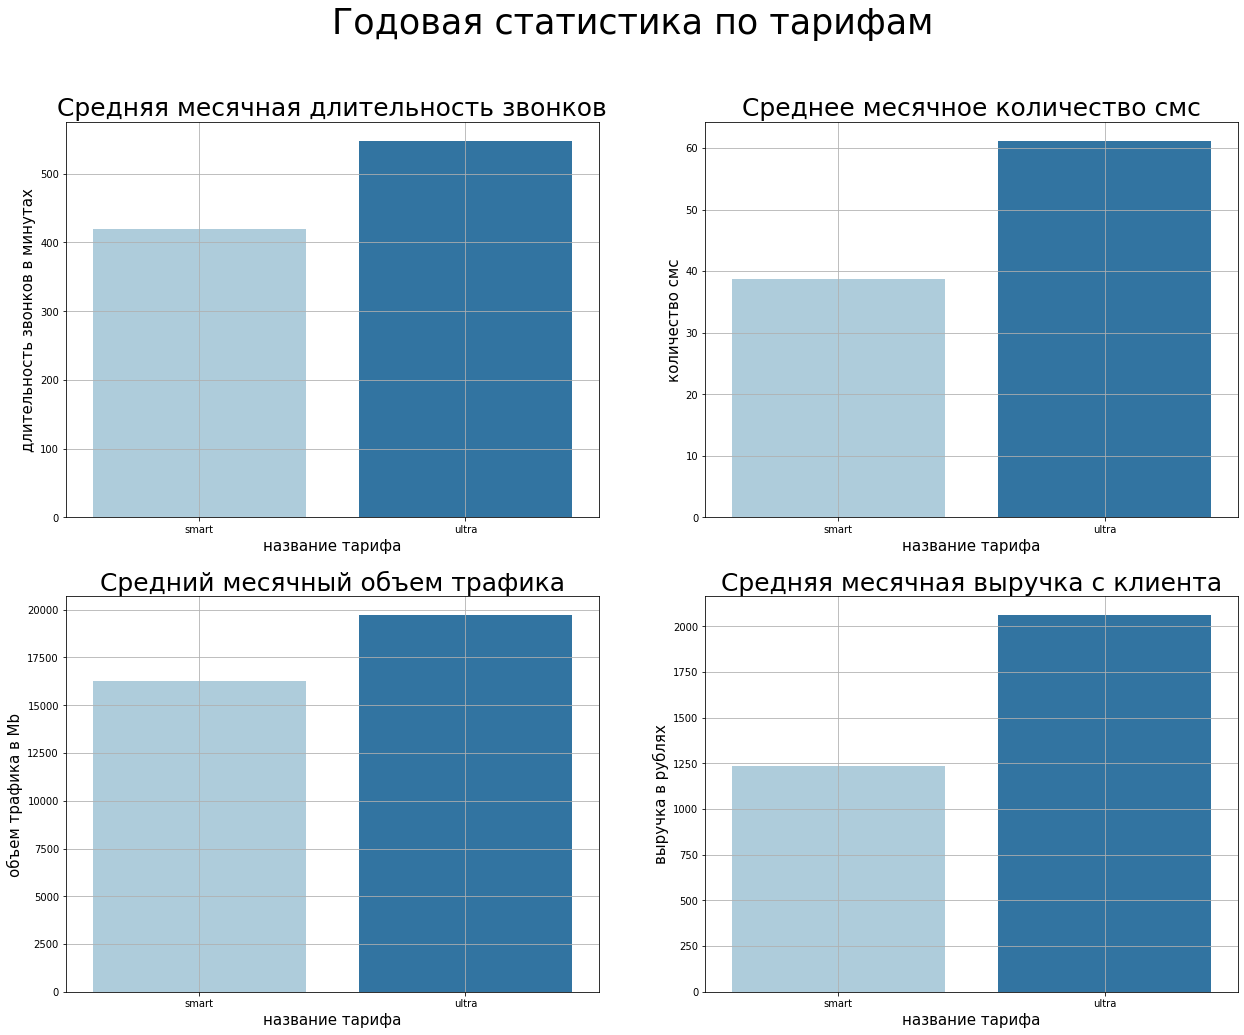

In [65]:
calls_duration = year_stat['calls_duration']
messages_total = year_stat['messages_total']
mb_total = year_stat['mb_total']
income =  year_stat['income']


plt.figure(figsize=(21,16))
plt.suptitle('Годовая статистика по тарифам', fontsize=35)
    
plt.subplot(2,2,1)
sns.barplot(x='index', y='mean', data=calls_duration['mean'].reset_index(), palette="Paired")
plt.grid()
plt.xlabel('название тарифа', fontsize=15)
plt.title('Средняя месячная длительность звонков', fontsize=25)
plt.ylabel('длительность звонков в минутах', fontsize=15)
   
       
plt.subplot(2,2,2)
sns.barplot(x='index', y='mean', data=messages_total['mean'].reset_index(), palette="Paired")
plt.grid()
plt.xlabel('название тарифа', fontsize=15)
plt.title('Среднее месячное количество смс', fontsize=25)
plt.ylabel('количество смс', fontsize=15)
   
    
plt.subplot(2,2,3)
sns.barplot(x='index', y='mean', data=mb_total['mean'].reset_index(), palette="Paired")
plt.grid()
plt.xlabel('название тарифа', fontsize=15)
plt.title('Средний месячный объем трафика', fontsize=25)
plt.ylabel('объем трафика в Mb', fontsize=15)
   
    
plt.subplot(2,2,4)
sns.barplot(x='index', y='mean', data=income['mean'].reset_index(), palette="Paired")
plt.grid()
plt.xlabel('название тарифа', fontsize=15)
plt.title('Средняя месячная выручка с клиента', fontsize=25)
plt.ylabel('выручка в рублях', fontsize=15)

### Построение распределений

Нас интересует как именно изменяется средняя продолжительность звонков/количество смс/объем трафика для клиентов разных тарифоф в зависимости от календарного месяца. Номер календарного месяца - категориальная величина, поэтому гистограммы, вероятно, могут ввести в заблуждение. Поэтому будем пользоваться box и bar plot'ами

Чтобы не писать два раза одинаковый код, обернем построение графиков в функцию и вызовем ее для каждого интересующего датафрейма

In [66]:
# функция построения boxplot'ов

"""
на вход принимает датафрейм по которому строит boxplot и название графика
в результате работы строит 4 графика в одной фигуре:
    1) общая продолжительность звонков в месяце в минутах
    2) общее количество смс в месяце
    3) общий объем интернет трафика в месяце в Mb
    4) выручку с клиента в месяце в рублях
"""

def month_boxplot(df, title='Figure 1'):
    
    calls_duration = df['calls_duration']
    messages_total = df['messages_total']
    mb_total = df['mb_total']
    income = df['income']
    
    plt.figure(figsize=(21,16))
    plt.suptitle(title, fontsize=35)

    
    plt.subplot(2,2,1)
    sns.boxplot(data=calls_duration, color='c')
    plt.title('Общая продолжительность звонков', fontsize=20)
    plt.grid()
    plt.xlabel('номер календарного месяца', fontsize=15)
    plt.ylabel('длительность в минутах', fontsize=15)
    
    
    plt.subplot(2,2,2)
    sns.boxplot(data=messages_total, color='c')
    plt.title('Общее количество сообщений', fontsize=20)
    plt.grid()
    plt.xlabel('номер календарного месяца', fontsize=15)
    plt.ylabel('количество сообщений', fontsize=15)
    
    plt.subplot(2,2,3)
    sns.boxplot(data=mb_total, color='c')
    plt.title('Общий объём интернет трафика', fontsize=20)
    plt.grid()
    plt.xlabel('номер календарного месяца', fontsize=15)
    plt.ylabel('объем трафика в Mb', fontsize=15)
    
    plt.subplot(2,2,4)
    sns.boxplot(data=income, color='c')
    plt.title('Выручка с клиента', fontsize=20)
    plt.grid()
    plt.xlabel('номер календарного месяца', fontsize=15)
    plt.ylabel('выручка в рублях', fontsize=15)
    #plt.ylim(0)

In [67]:
# функция построения barplot'ов

"""
на вход принимает датафрейм по которому строит barplot и название графика
в результате работы строит 3 графика в одной фигуре:
    1) средняя продолжительность звонков в месяце в минутах
    2) среднее количество смс в месяце
    3) средний объем интернет трафика в месяце в Mb
"""

def month_barplot(df, title='Figure 2'):
    
    calls_duration = df['calls_duration']
    messages_total = df['messages_total']
    mb_total = df['mb_total']
    income = df['income']
    
    plt.figure(figsize=(21,16))
    plt.suptitle(title, fontsize=35)
    
    plt.subplot(2,2,1)
    sns.barplot(x='index', y='mean', data=calls_duration['mean'].reset_index(), color='g')
    plt.grid()
    plt.title('Средняя продолжительность звонков', fontsize=20)
    plt.xlabel('номер календарного месяца', fontsize=15)
    plt.ylabel('продолжительность звонков в минутах', fontsize=15)
       
    plt.subplot(2,2,2)
    sns.barplot(x='index', y='mean', data=messages_total['mean'].reset_index(), color='g')
    plt.grid()
    plt.title('Среднее количество сообщений', fontsize=20)
    plt.xlabel('номер календарного месяца', fontsize=15)
    plt.ylabel('количество сообщений', fontsize=15)
    
    plt.subplot(2,2,3)
    sns.barplot(x='index', y='mean', data=mb_total['mean'].reset_index(), color='g')
    plt.grid()
    plt.title('Средний объем интернет трафика', fontsize=20)
    plt.xlabel('номер календарного месяца', fontsize=15)
    plt.ylabel('объем трафика в Mb', fontsize=15)
    
    plt.subplot(2,2,4)
    sns.barplot(x='index', y='mean', data=income['mean'].reset_index(), color='g')
    plt.title('Средняя выручка с клиента', fontsize=20)
    plt.grid()
    plt.xlabel('номер календарного месяца', fontsize=15)
    plt.ylabel('выручка в рублях', fontsize=15)
    plt.ylim(0)

Функции написаны, теперь можно построить графики

### Boxplot'ы общей продолжительности звонков, общего количества сообщений, общего объёма интернет трафика и выручки с клиента

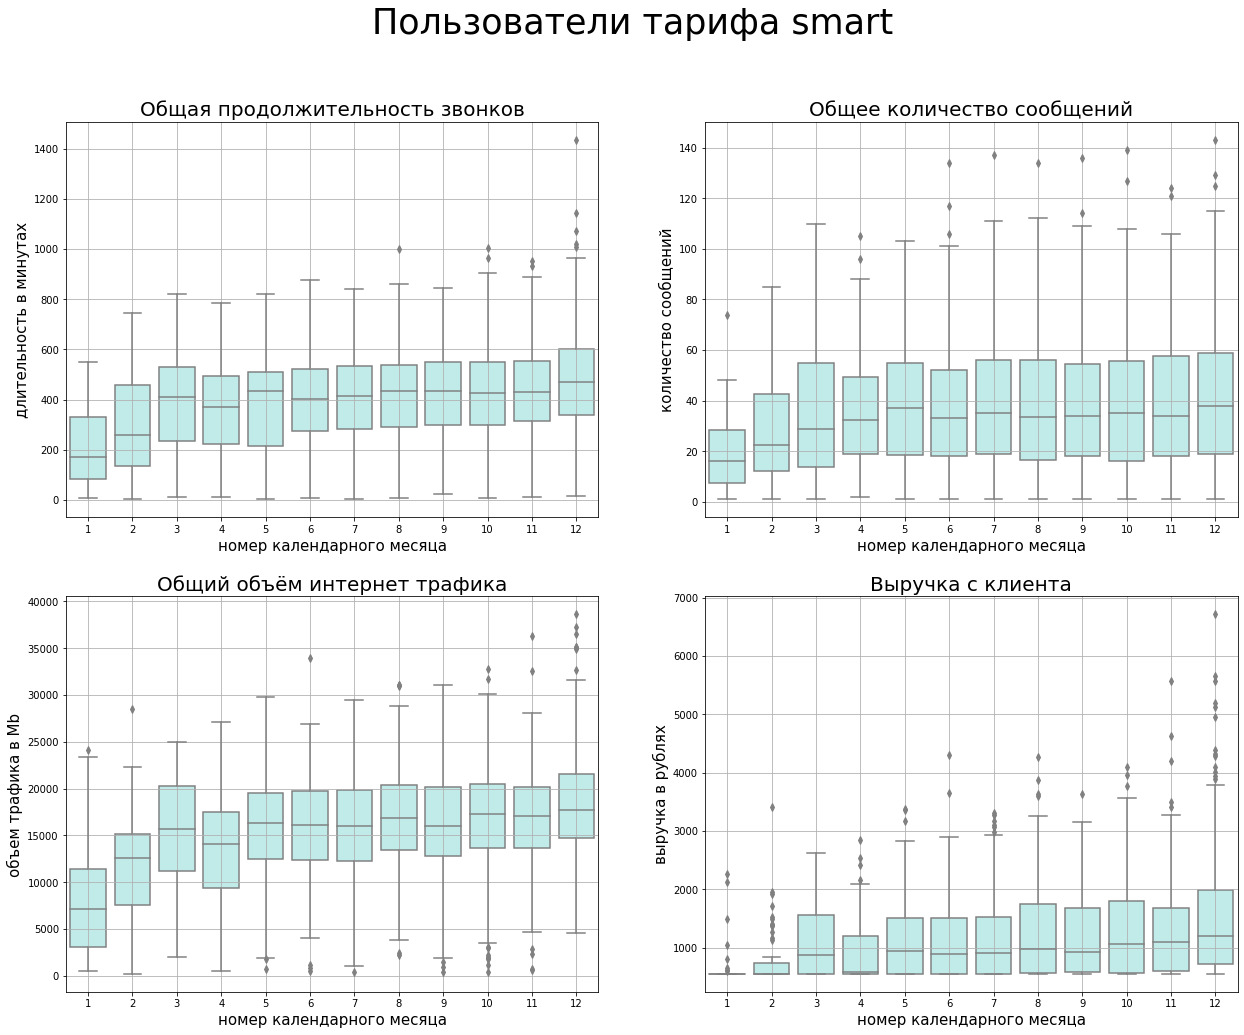

In [68]:
month_boxplot(users_month_distr_smart, 'Пользователи тарифа smart')

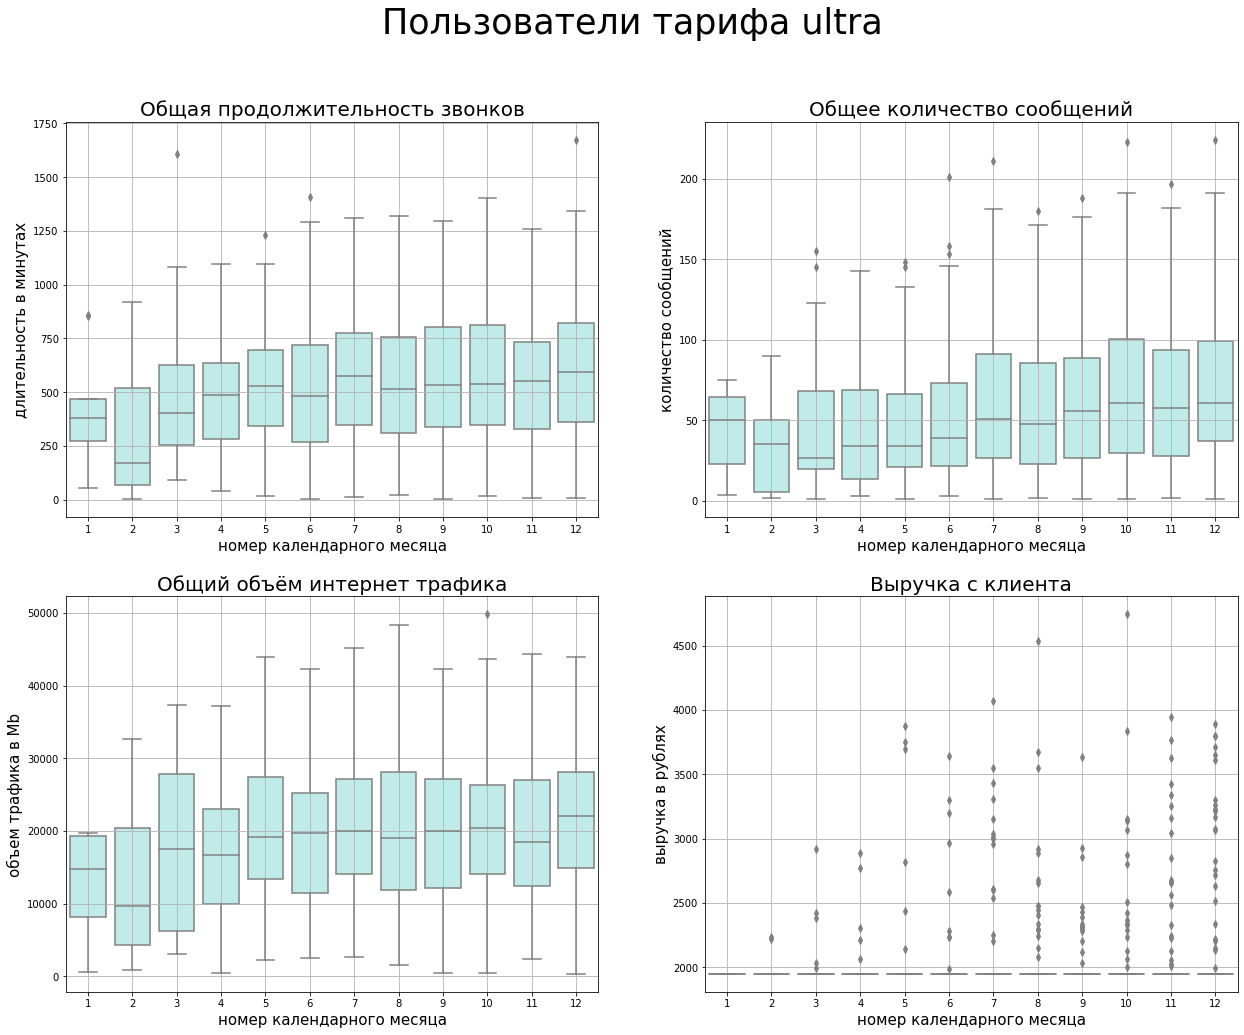

In [69]:
month_boxplot(users_month_distr_ultra, 'Пользователи тарифа ultra')

### Barplot'ы средней продолжительности звонков, среднего количества сообщений и среднего объёма интернет трафика

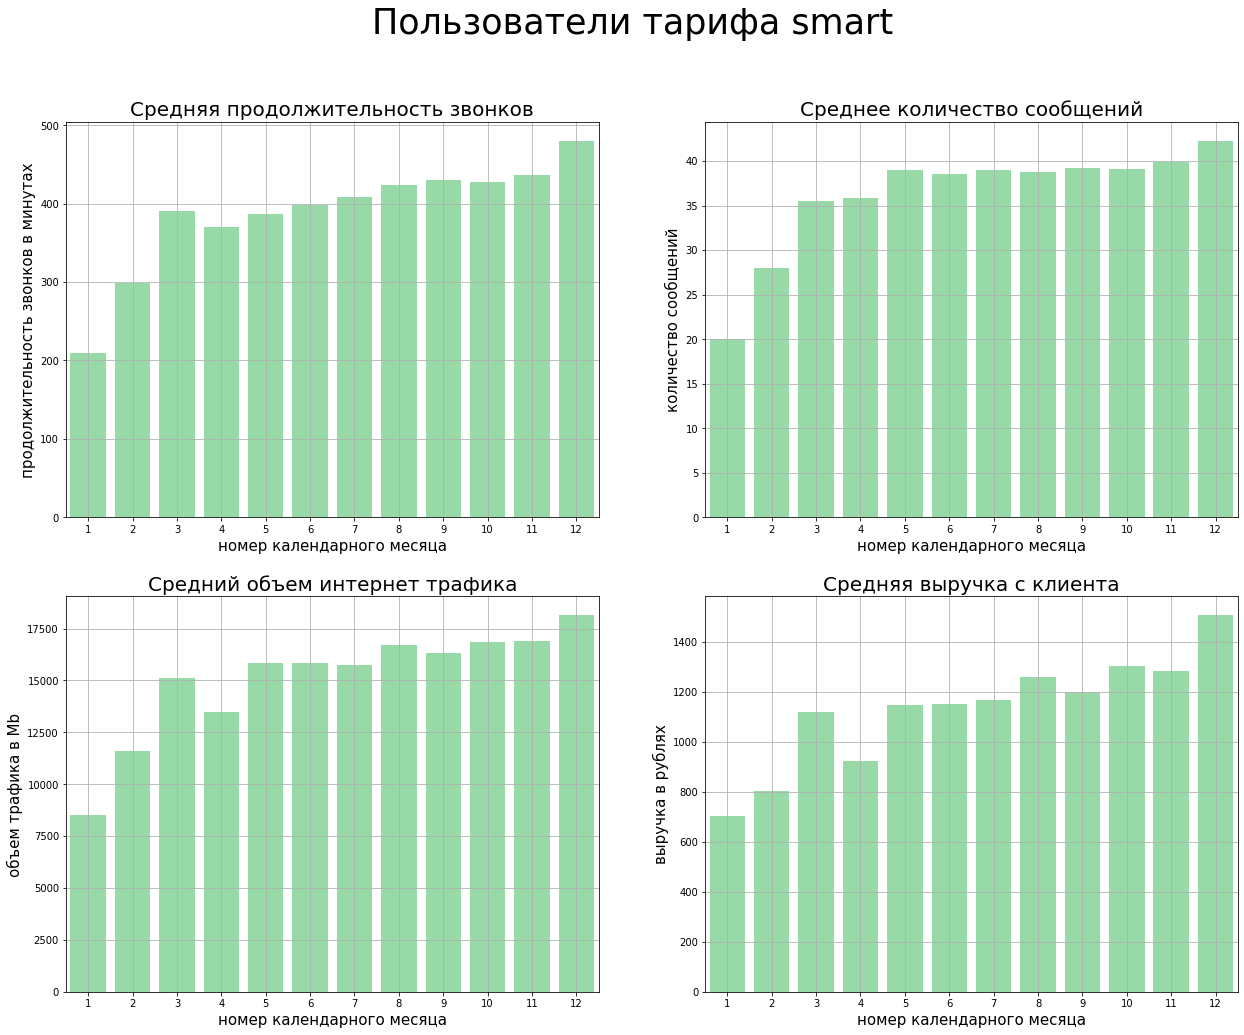

In [70]:
month_barplot(smart_values, 'Пользователи тарифа smart')

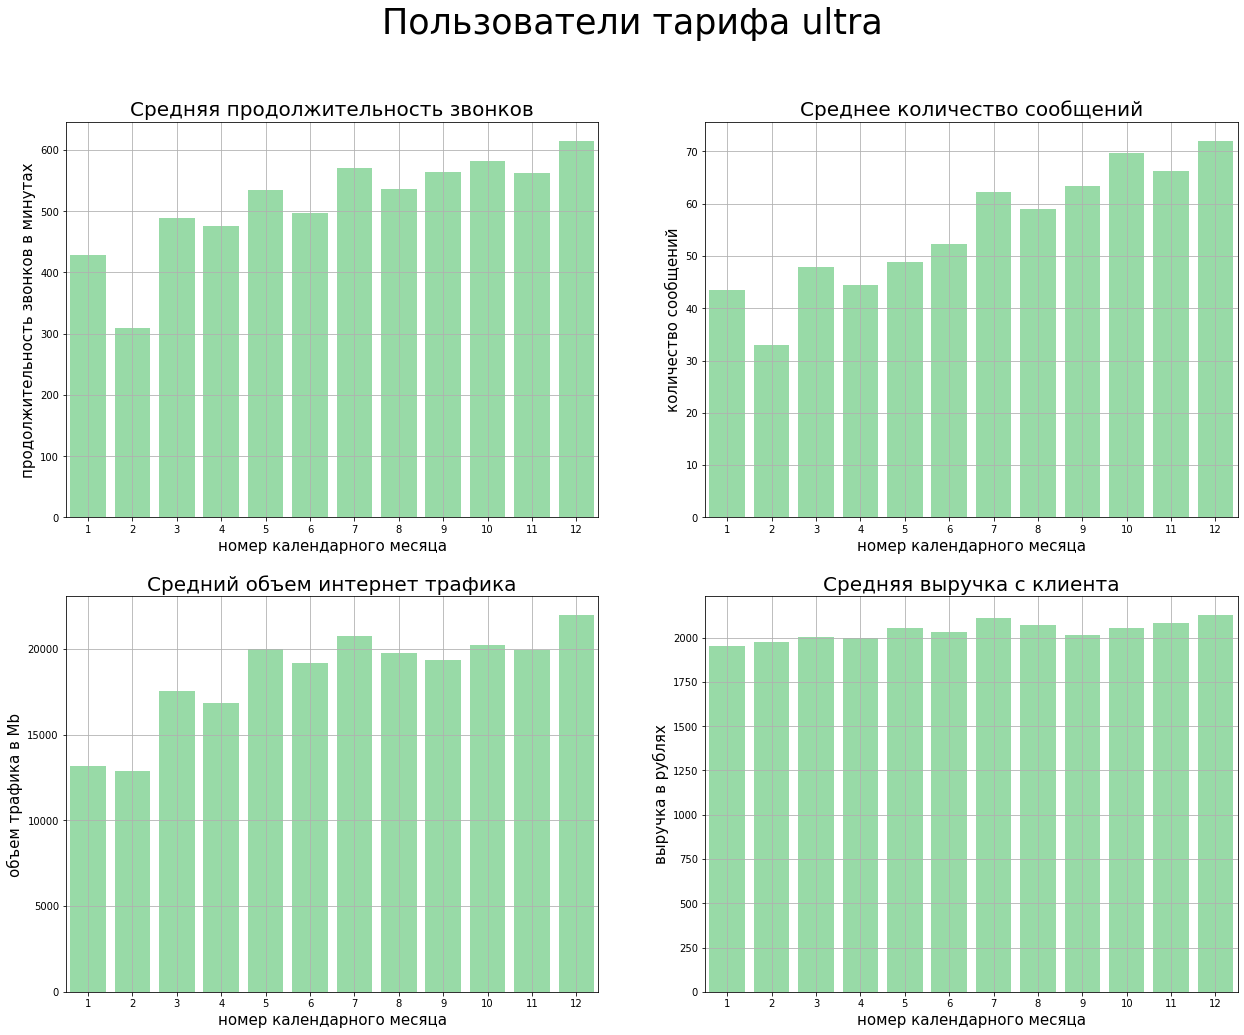

In [71]:
month_barplot(ultra_values, 'Пользователи тарифа ultra')

<b>UPD: <font color='green'>Итак, прежде всего должен сказать: графики очень красивые и наглядные. `Seaborn` во всей красе.

In [72]:
ultra_values

calls_duration                   messages_total                   mb_total  \
             mean      var      std           mean      var      std     mean   
1         428.111  72769.4  269.758        43.4286  765.286  27.6638  13153.6   
2         310.043  87728.7   296.19        32.9375  713.396  26.7095  12858.5   
3         489.649   111385  333.744           47.8  1826.67  42.7395    17552   
4         475.302  66036.8  256.976        44.5128  1408.26  37.5267  16843.8   
5          534.25    74881  273.644        48.7692  1559.55  39.4912  19977.5   
6         497.469  86019.7  293.291        52.3134  1935.67  43.9963  19170.5   
7         570.885  84217.1  290.202         62.137  2190.73  46.8052  20742.6   
8         535.814  89257.3   298.76        58.8977  2022.97  44.9774  19778.9   
9         563.964  96610.8  310.823        63.2947  1906.76  43.6665  19390.8   
10        581.729  97140.3  311.673        69.7767  2426.61  49.2606  20228.3   
11        562.364  88449.6  297.405        66.1593   2249.3  47.4267  19954.2   
12        614.925   107981  328.605        72.0085  2362.87  48.6094  21971.7   

                           income                    
            var      std     mean      var      std  
1   4.72264e+07  6872.15     1950        0        0  
2   1.09891e+08  10482.9  1973.05   6100.9  78.1082  
3   1.20164e+08  10961.9  2004.17  34914.9  186.855  
4   9.46239e+07  9727.48  1995.43  30676.6  175.147  
5    9.2176e+07  9600.83  2054.97   156402  395.478  
6   8.31492e+07  9118.62  2032.06  89209.4  298.679  
7   9.78365e+07  9891.24   2108.5   178410  422.386  
8   1.07312e+08  10359.2  2071.15   141910   376.71  
9    8.7648e+07  9362.05  2013.73  49164.8  221.731  
10  9.37131e+07  9680.55  2056.92   138474  372.121  
11  9.60915e+07  9802.63  2080.79   147781  384.423  
12  1.05194e+08  10256.4  2126.25   210462  458.761

### Годовые распределения

Напишем функцию построения годового распределения величины по таблицам `users_smart_vertical` и `users_ultra_vertical`

In [73]:
"""
принимает на вход:

    1. датафрейм по которому будет строить гистограммы
    2. имя тарифа, чтобы по нему отметить лимиты на звонки/сообщения/Mb на графиках
    3. заголовок для фигуры
    
возвращает фигуру с 4 гистограммами:
    1. распределение месячной длительности звонков за весь год
    2. распределение месячного количества смс за весь год
    3. распределение месячного количества объёма трафика за весь год
    4. распределение месячной выручки за весь год
"""

def year_distr_hist(df, tariff_name_loc, title='Figure'):
    
    # по имени тарифа получаем лимиты на услуги, чтобы отметить их на гистограмме
    
    minutes_included = tariffs.loc[tariff_name_loc, 'minutes_included']
    messages_included = tariffs.loc[tariff_name_loc, 'messages_included']
    mb_per_month_included = tariffs.loc[tariff_name_loc, 'mb_per_month_included']
    rub_monthly_fee = tariffs.loc[tariff_name_loc, 'rub_monthly_fee']
      
    plt.figure(figsize=(21,16))
    plt.suptitle(title, fontsize=35)
    
    plt.subplot(2,2,1)
    sns.distplot(df['calls_duration'].dropna())
    plt.grid()
    plt.title('Месячная продолжительность звонков', fontsize =20)
    plt.xlabel('продолжительность звонков в минутах', fontsize=15)
    plt.axvline(minutes_included, color='r', linestyle='--', linewidth=4, label='количество минут \n в тарифе')
    plt.legend(fontsize=15, loc='upper right')
       
    plt.subplot(2,2,2)
    sns.distplot(df['messages_total'].dropna())
    plt.grid()
    plt.title('Месячное количество смс', fontsize =20)
    plt.xlabel('количество смс', fontsize=15)
    plt.axvline(messages_included, color='r', linestyle='--', linewidth=4, label='количество сообщений \n в тарифе')
    plt.legend(fontsize=15, loc='upper right')
    
    plt.subplot(2,2,3)
    sns.distplot(df['mb_total'].dropna())
    plt.grid()
    plt.title('Месячный объем трафика', fontsize =20)
    plt.xlabel('объем трафика в Mb', fontsize=15)
    plt.axvline(mb_per_month_included, color='r', linestyle='--', linewidth=4, label='количество Mb \n в тарифе')
    plt.legend(fontsize=15, loc='upper right')
    
    plt.subplot(2,2,4)
    sns.distplot(df['income'].dropna())
    plt.grid()
    plt.title('Месячная выручка', fontsize =20)
    plt.xlabel('выручка в рублях', fontsize=15)
    plt.axvline(rub_monthly_fee, color='r', linestyle='--', linewidth=4, label='абонентская плата')
    plt.legend(fontsize=15, loc='upper right')

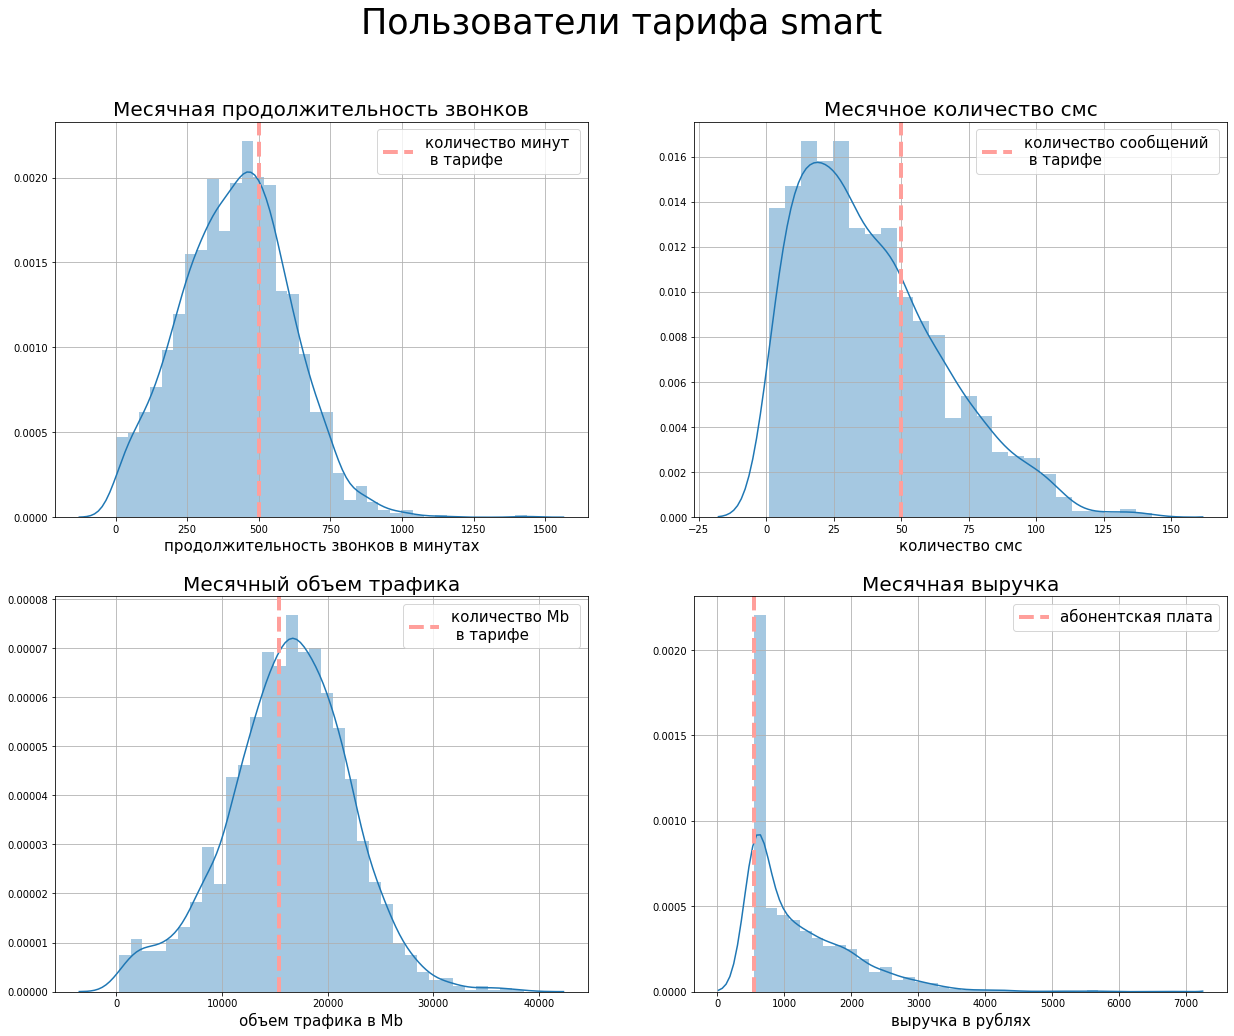

In [74]:
year_distr_hist(users_smart_vertical, 'smart', 'Пользователи тарифа smart')

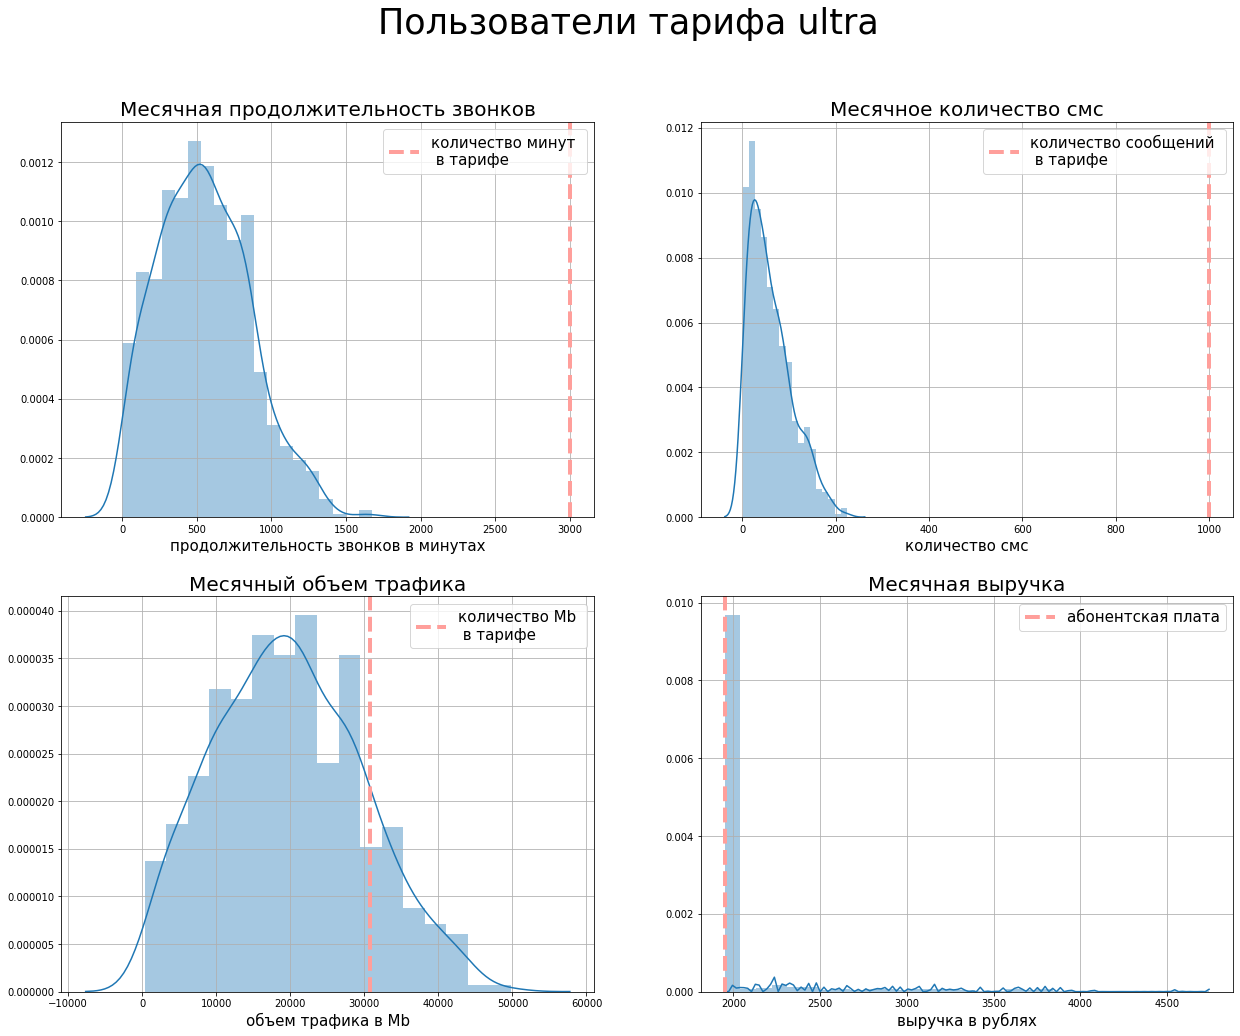

In [75]:
year_distr_hist(users_ultra_vertical, 'ultra', 'Пользователи тарифа ultra')

По данным графикам можно сделать следующие выводы:
    
1. Значительной части пользователей тарифа smart не хватает пакета звонков, смс и Mb трафика на месяц. Видно, что достаточно количество пользователей тратят больше, чем заложено в тариф. В случае интернет трафика пик распределения вообще находится после линии, обозначающей ограничение тарифа.

2. Все пользователи тарифа ultra не нуждаются в дополнительных минутах и смс (в случае смс практически все пользователи расходуют только 20% от предела тарифа). Тем не менее, некоторая часть пользователей все же превышает предел интернет трафика (но не такая значительная как в случае тарифа smart)

### Распределения для каждого месяца

Теперь построим аналогичные графики, но не для всего года сразу, а для каждого месяца по отдельности. Опять же вопспользуемся функцией

In [76]:
def month_distr_hist(DF, tariff_name_loc, month_number=1):
    
    datetime_object = datetime.datetime.strptime(str(month_number), "%m")
    title = datetime_object.strftime("%B")
    
    
    minutes_included = tariffs.loc[tariff_name_loc, 'minutes_included']
    messages_included = tariffs.loc[tariff_name_loc, 'messages_included']
    mb_per_month_included = tariffs.loc[tariff_name_loc, 'mb_per_month_included']
    rub_monthly_fee = tariffs.loc[tariff_name_loc, 'rub_monthly_fee']
    
    df = DF.xs(month_number, level=1)
      
    plt.figure(figsize=(21,16))
    plt.suptitle(title, fontsize=35)
    
    plt.subplot(2,2,1)
    sns.distplot(df['calls_duration'].dropna())
    plt.grid()
    plt.title('Месячная продолжительность звонков', fontsize =20)
    plt.xlabel('продолжительность звонков в минутах', fontsize=15)
    plt.axvline(minutes_included, color='r', linestyle='--', linewidth=4, label='количество минут \n в тарифе')
    plt.legend(fontsize=15, loc='upper right')
       
    plt.subplot(2,2,2)
    sns.distplot(df['messages_total'].dropna())
    plt.grid()
    plt.title('Месячное количество смс', fontsize =20)
    plt.xlabel('количество смс', fontsize=15)
    plt.axvline(messages_included, color='r', linestyle='--', linewidth=4, label='количество сообщений \n в тарифе')
    plt.legend(fontsize=15, loc='upper right')
    
    plt.subplot(2,2,3)
    sns.distplot(df['mb_total'].dropna())
    plt.grid()
    plt.title('Месячный объем трафика', fontsize =20)
    plt.xlabel('объем трафика в Mb', fontsize=15)
    plt.axvline(mb_per_month_included, color='r', linestyle='--', linewidth=4, label='количество Mb \n в тарифе')
    plt.legend(fontsize=15, loc='upper right')
    
    plt.subplot(2,2,4)
    sns.distplot(df['income'].dropna())
    plt.grid()
    plt.title('Месячная выручка', fontsize =20)
    plt.xlabel('выручка в рублях', fontsize=15)
    plt.axvline(rub_monthly_fee, color='r', linestyle='--', linewidth=4, label='абонентская плата')
    plt.legend(fontsize=15, loc='upper right')

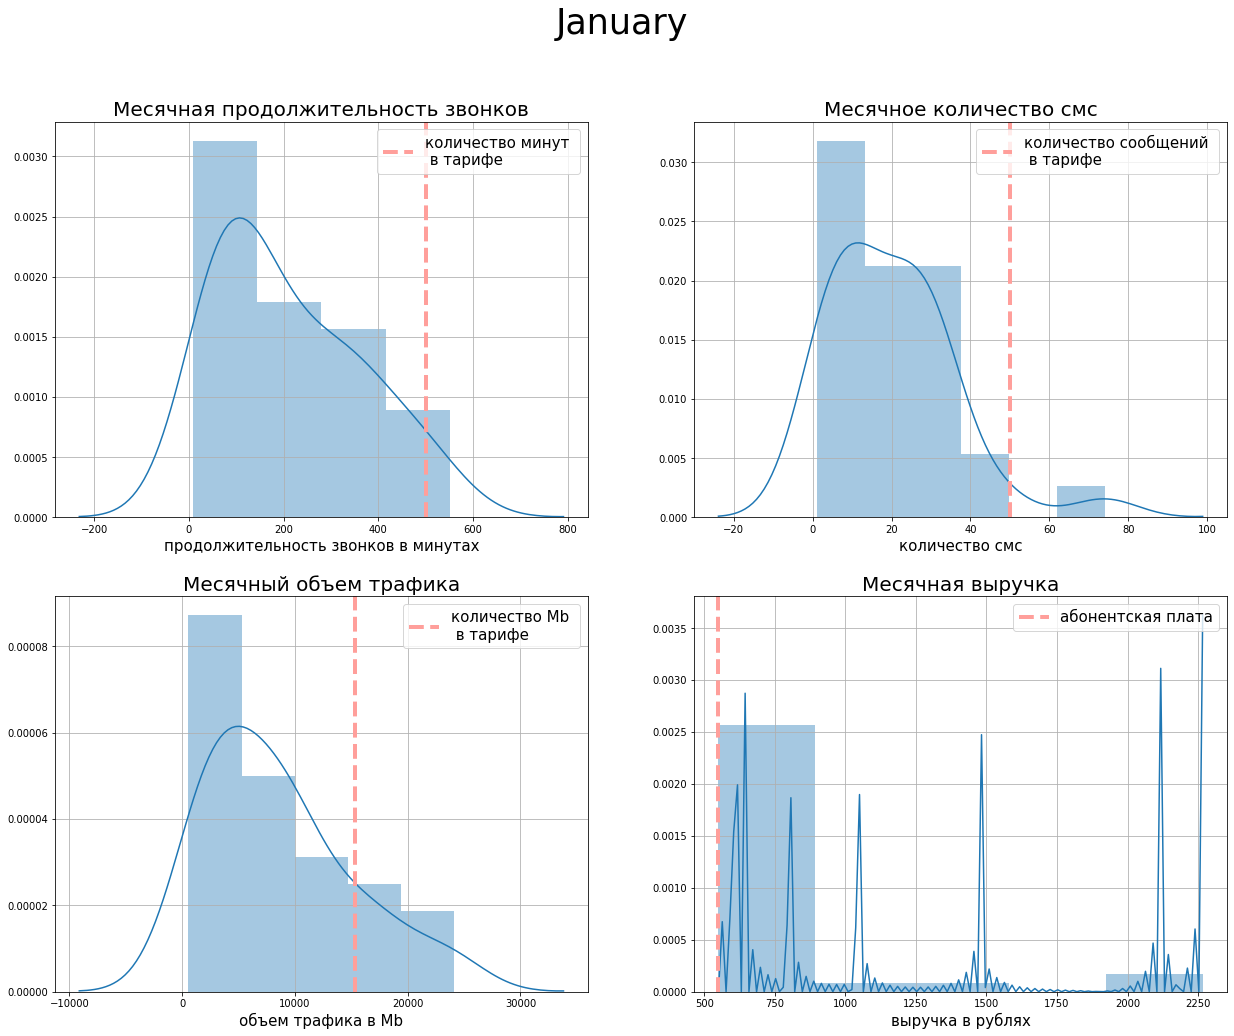

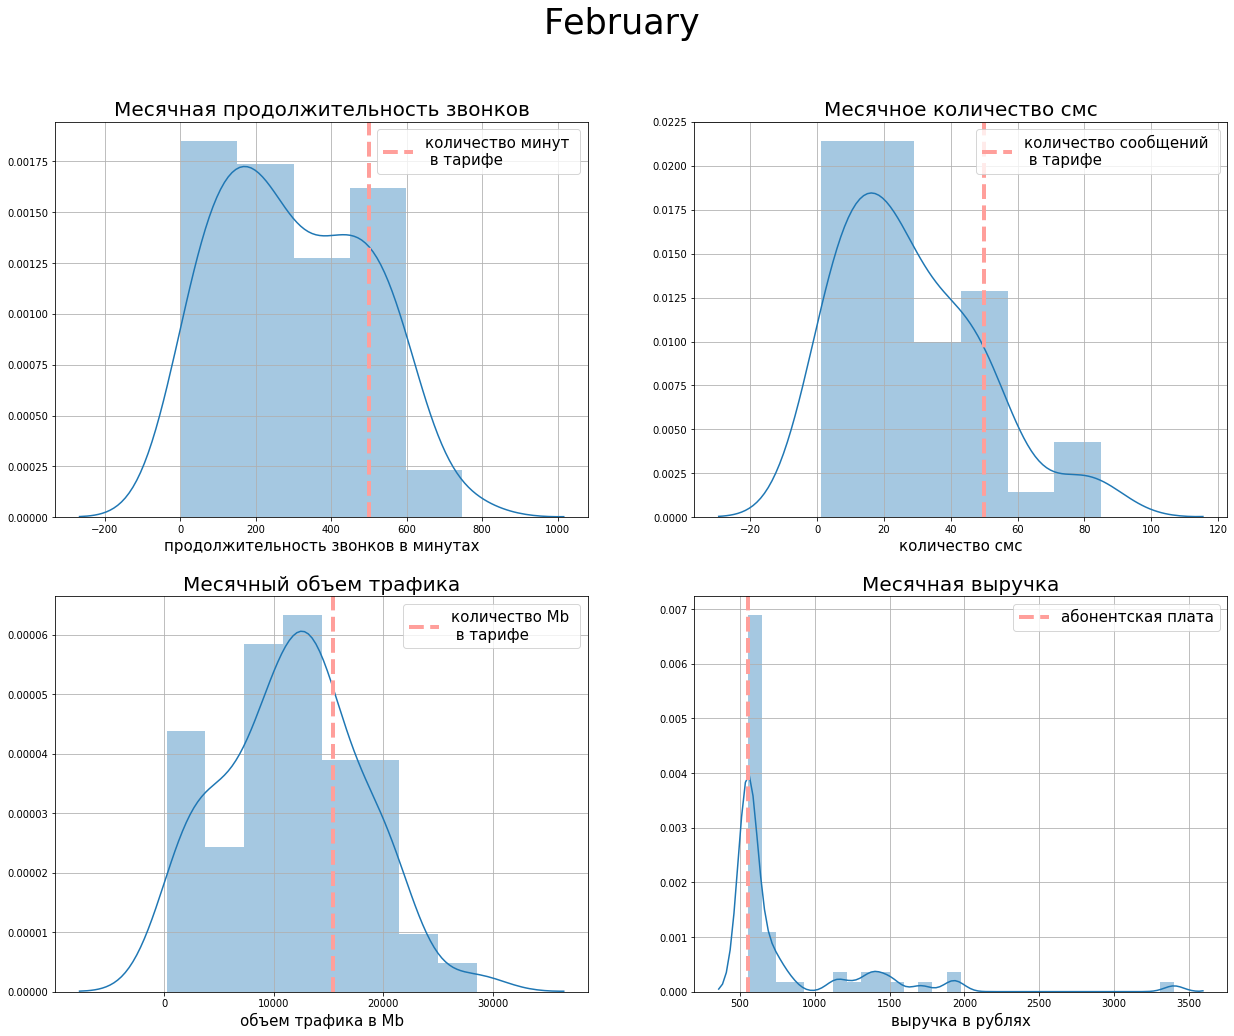

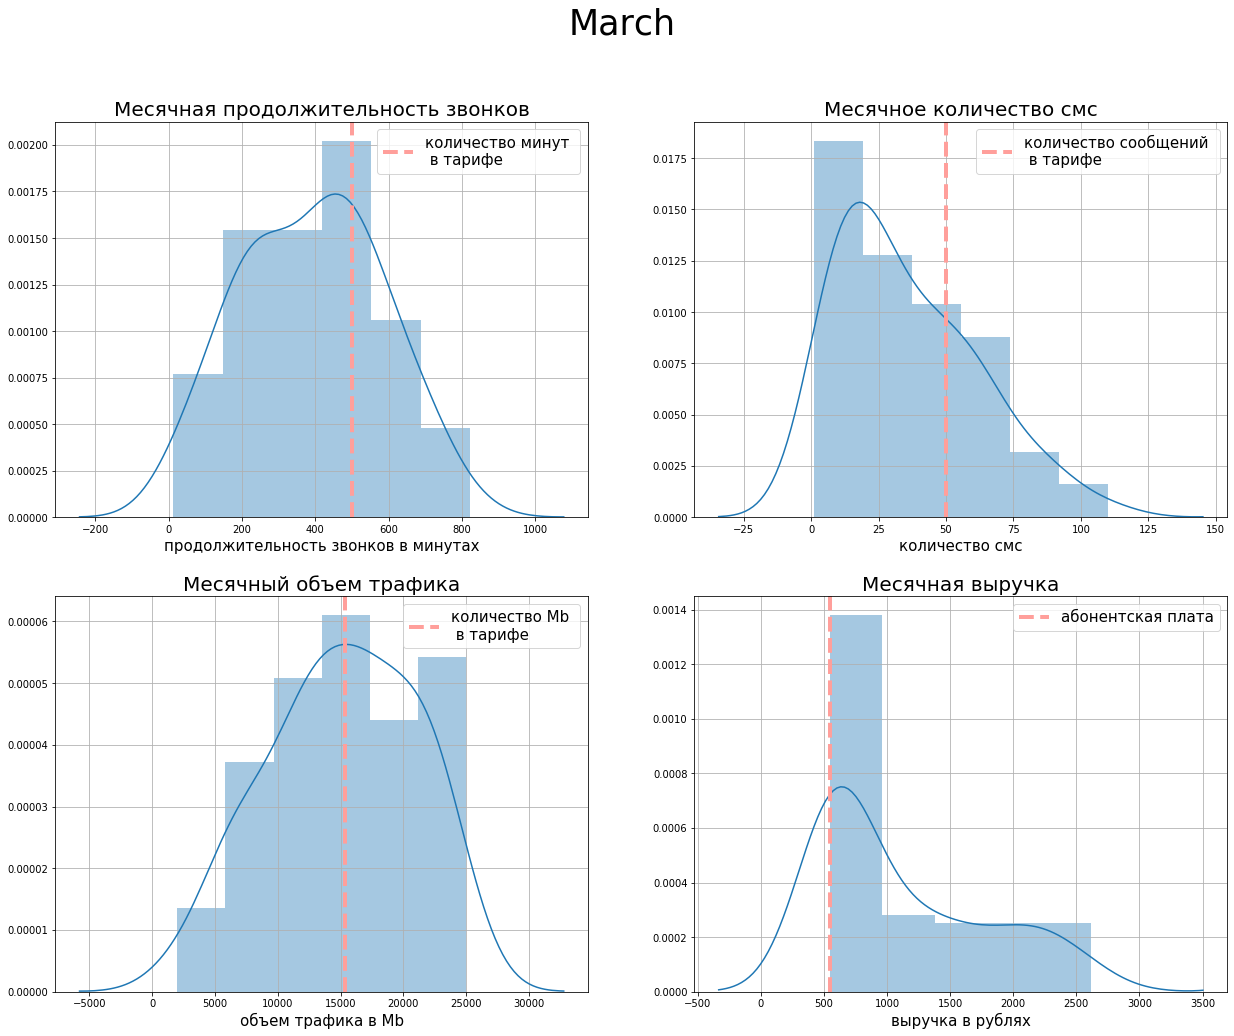

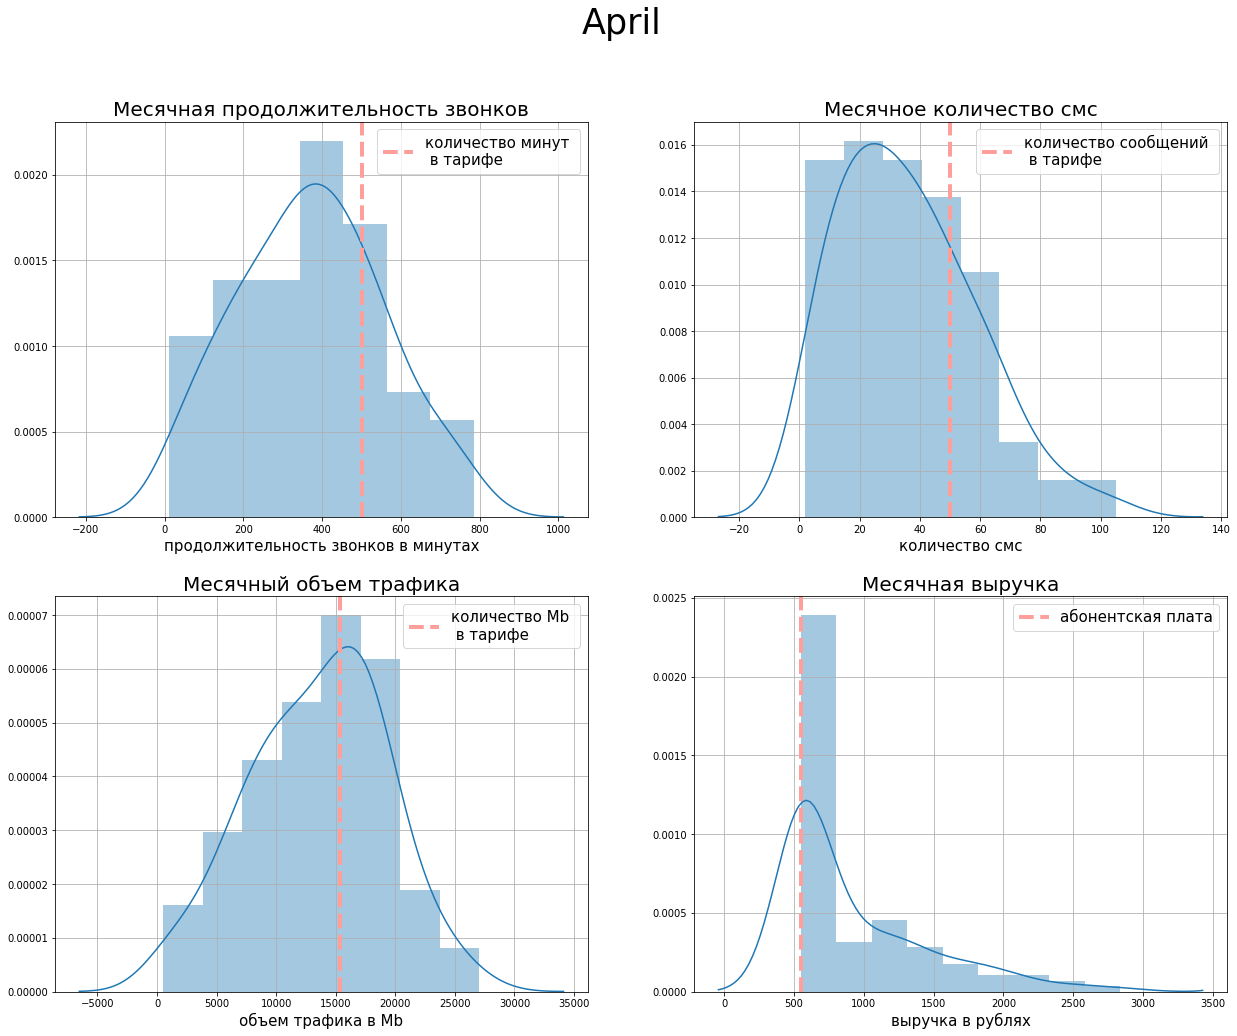

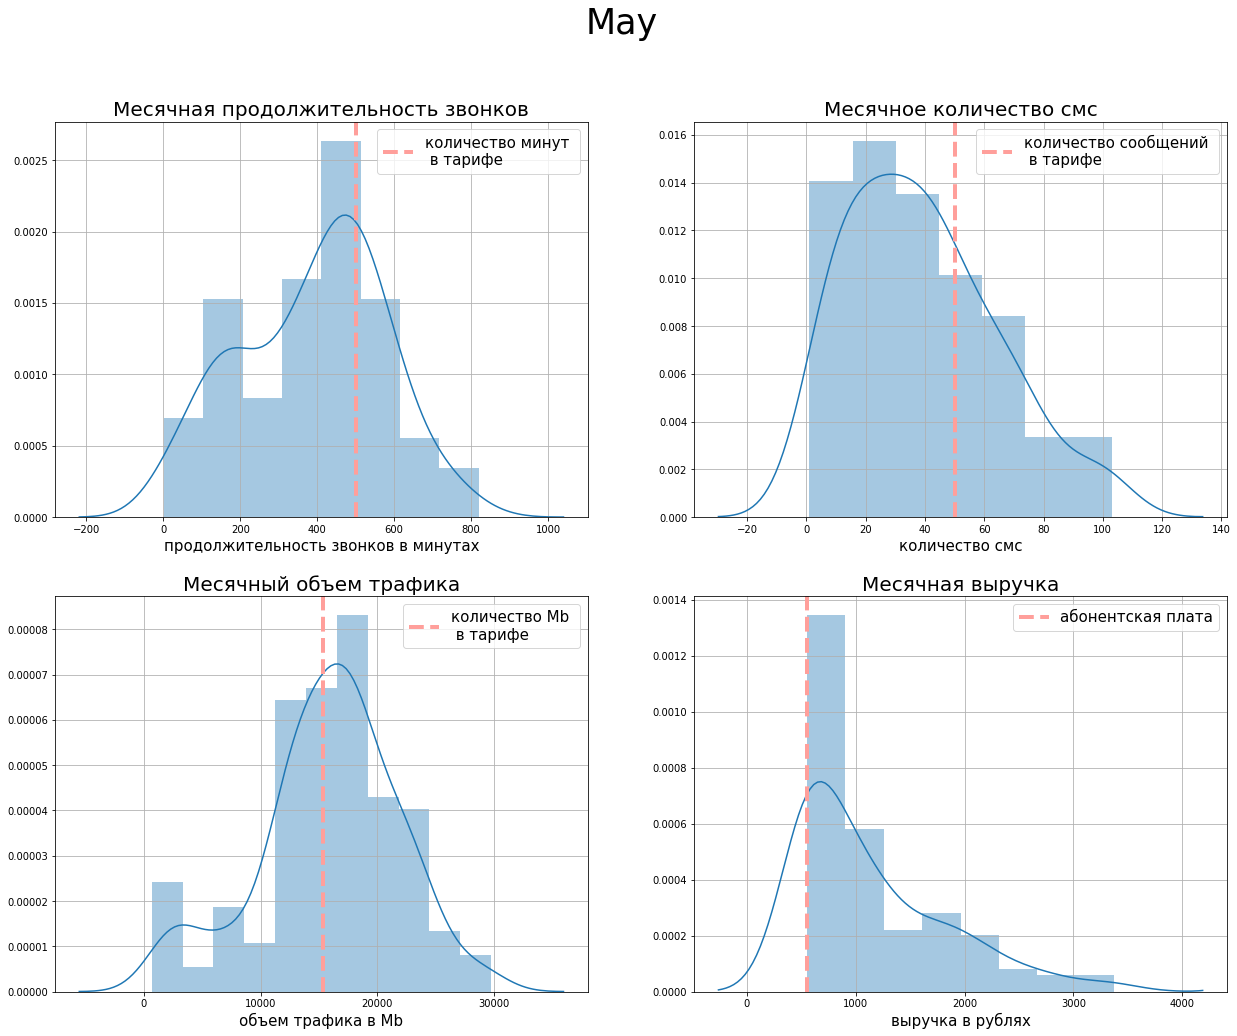

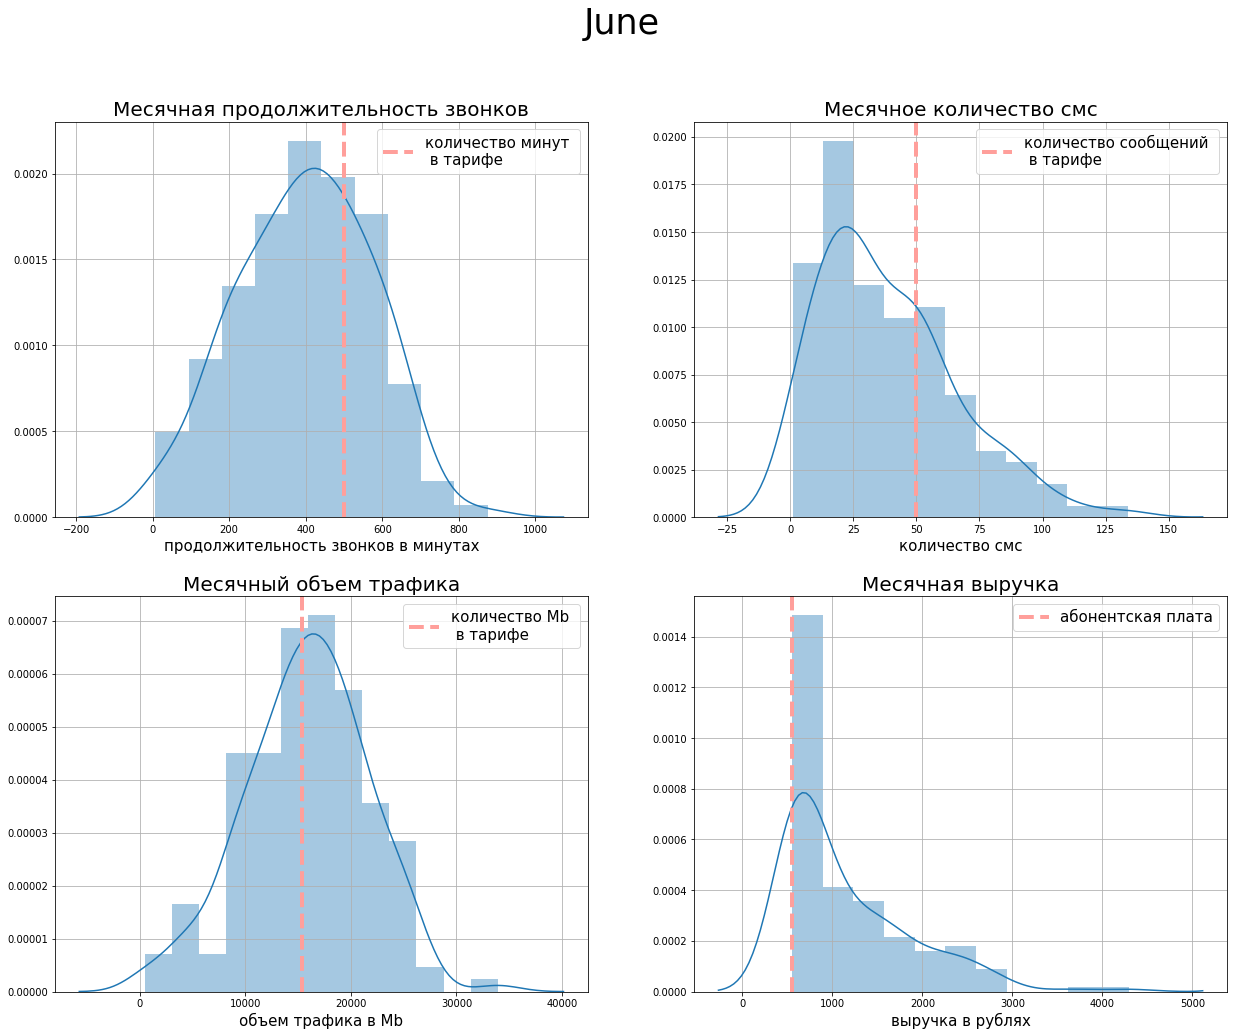

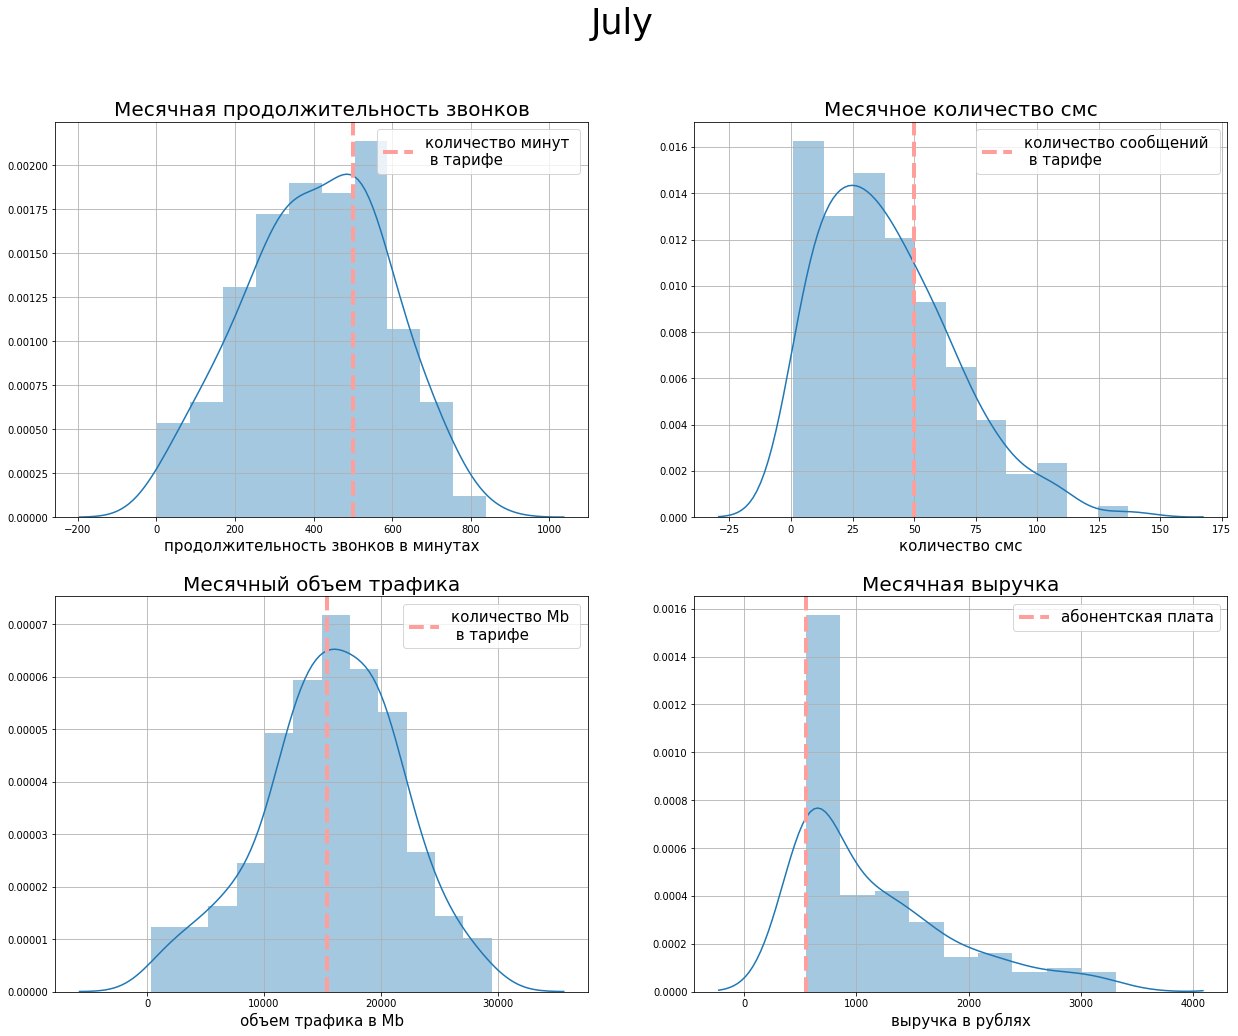

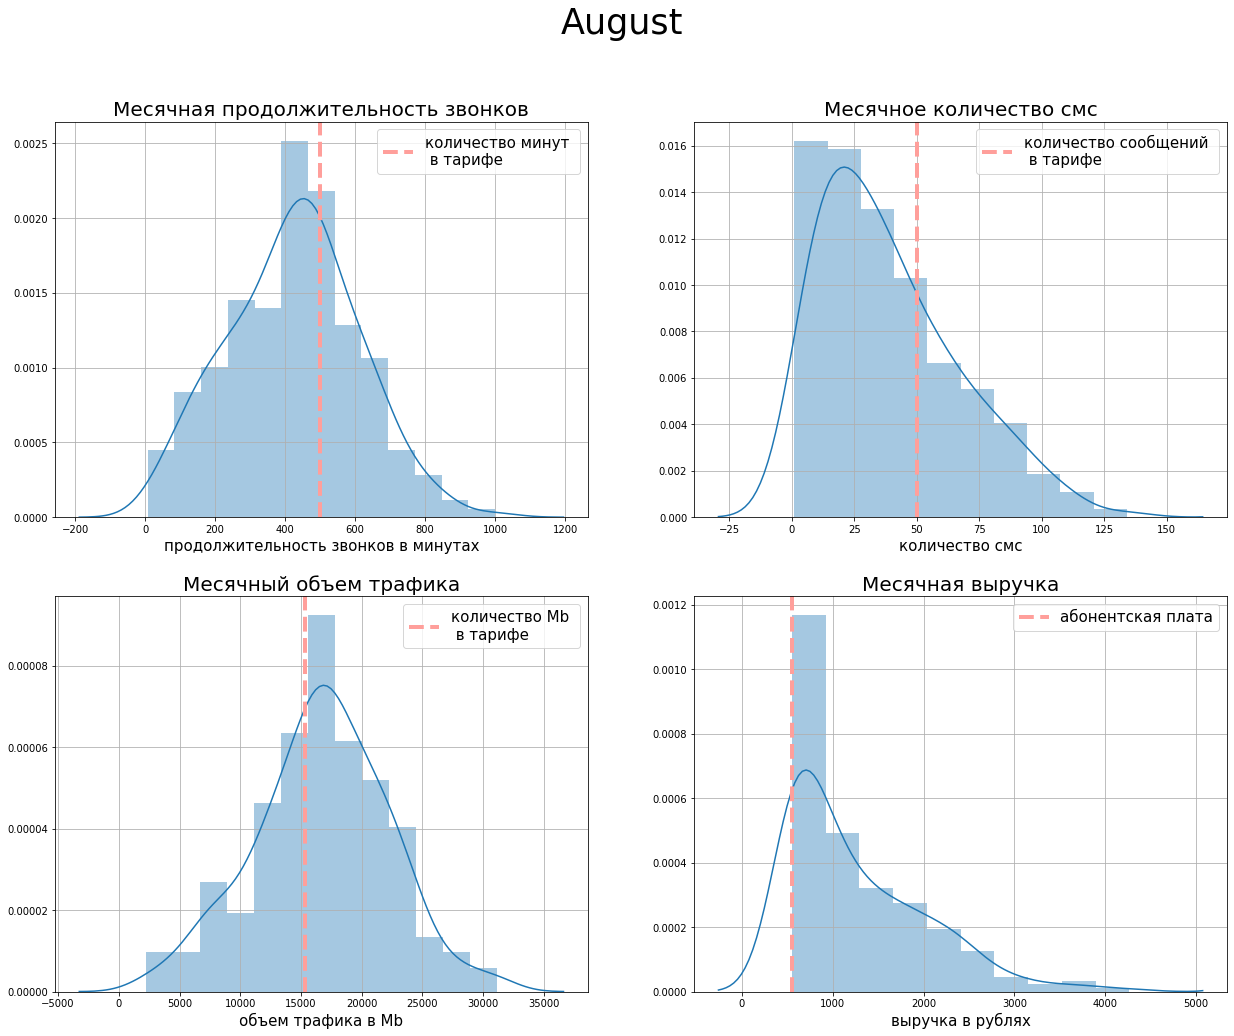

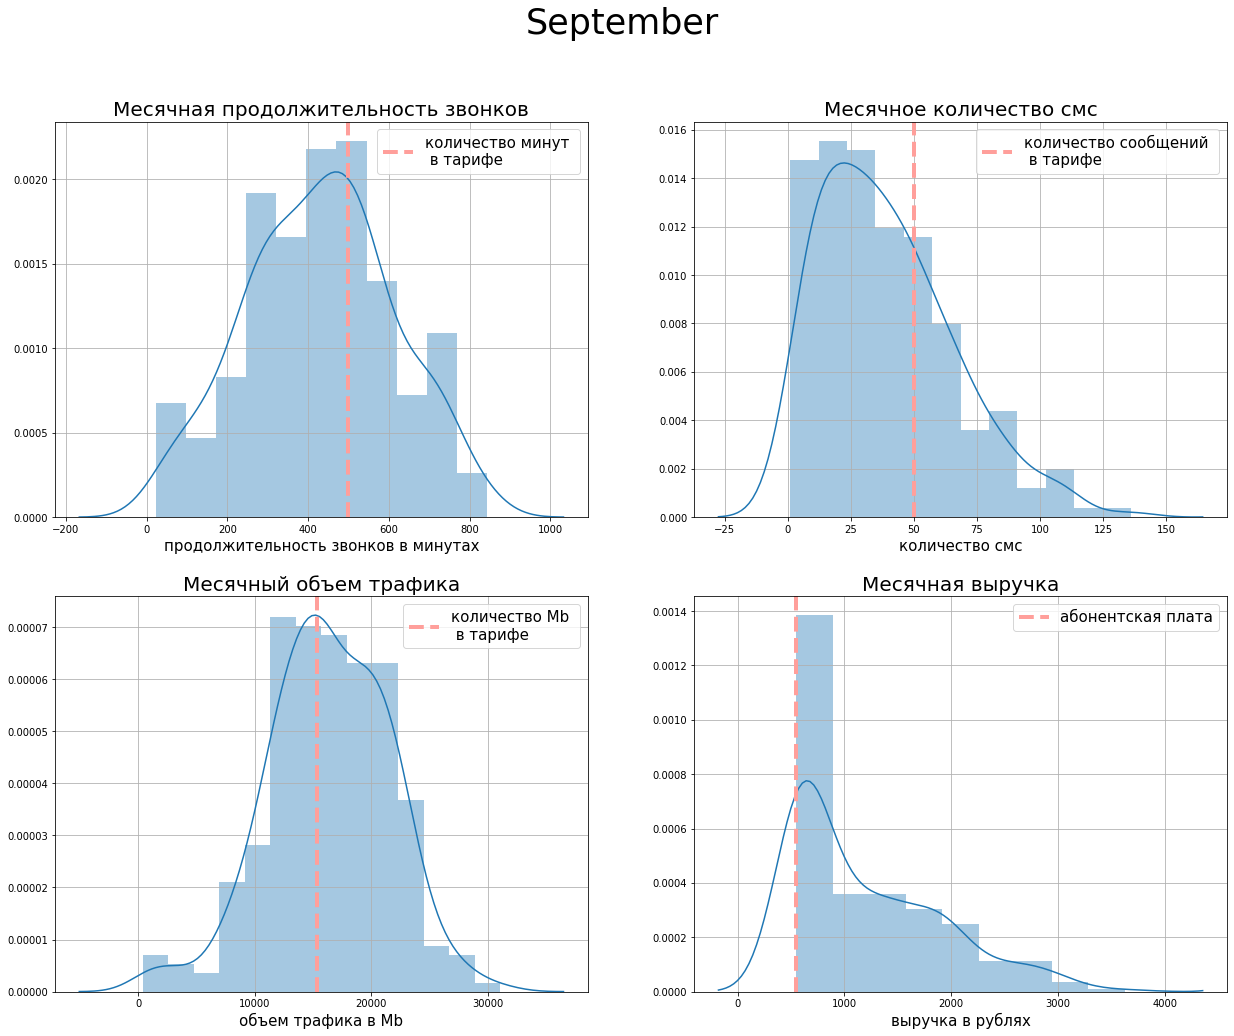

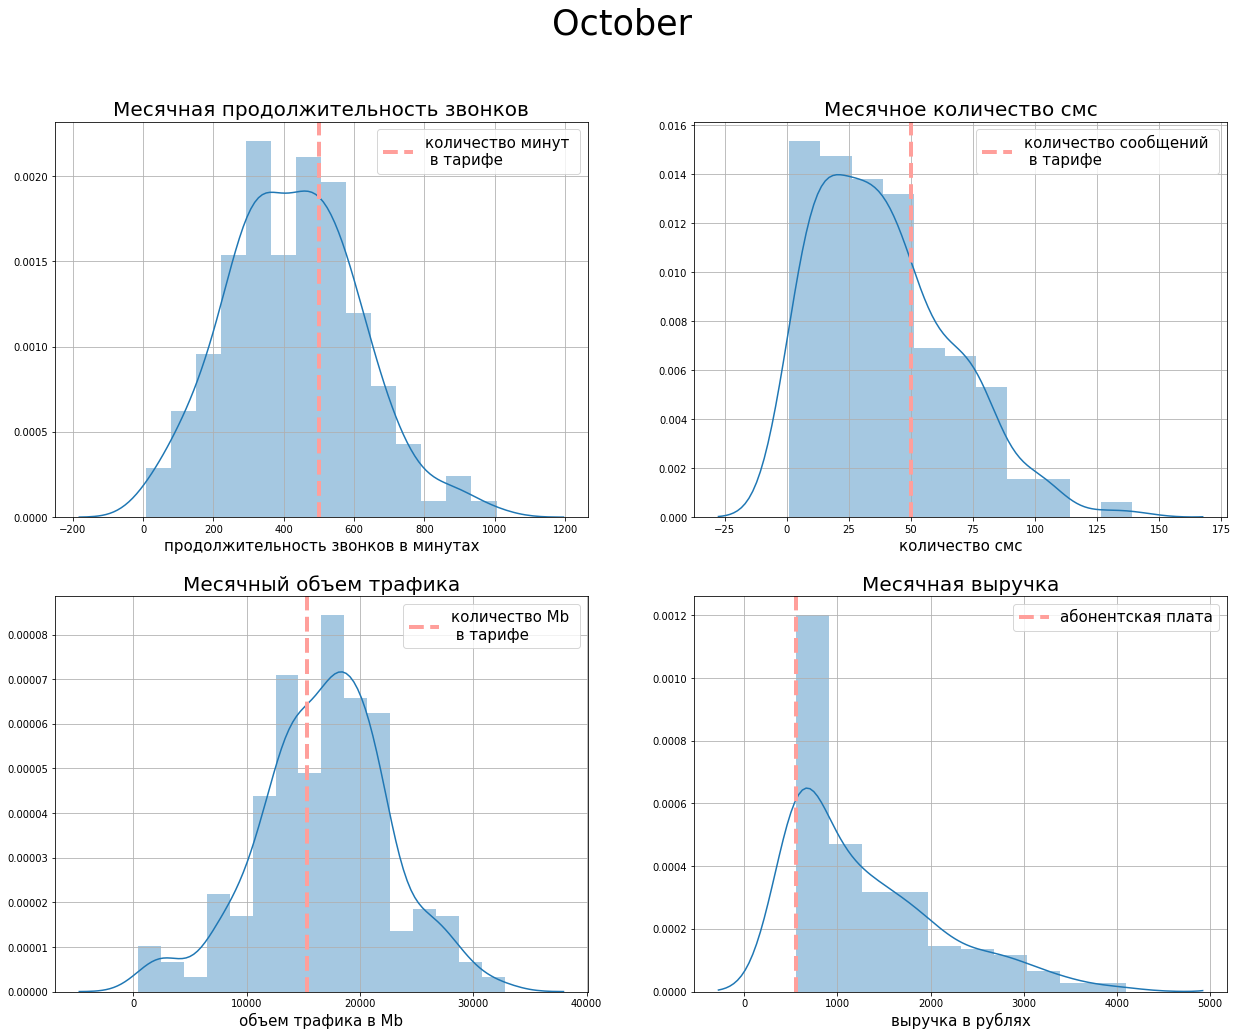

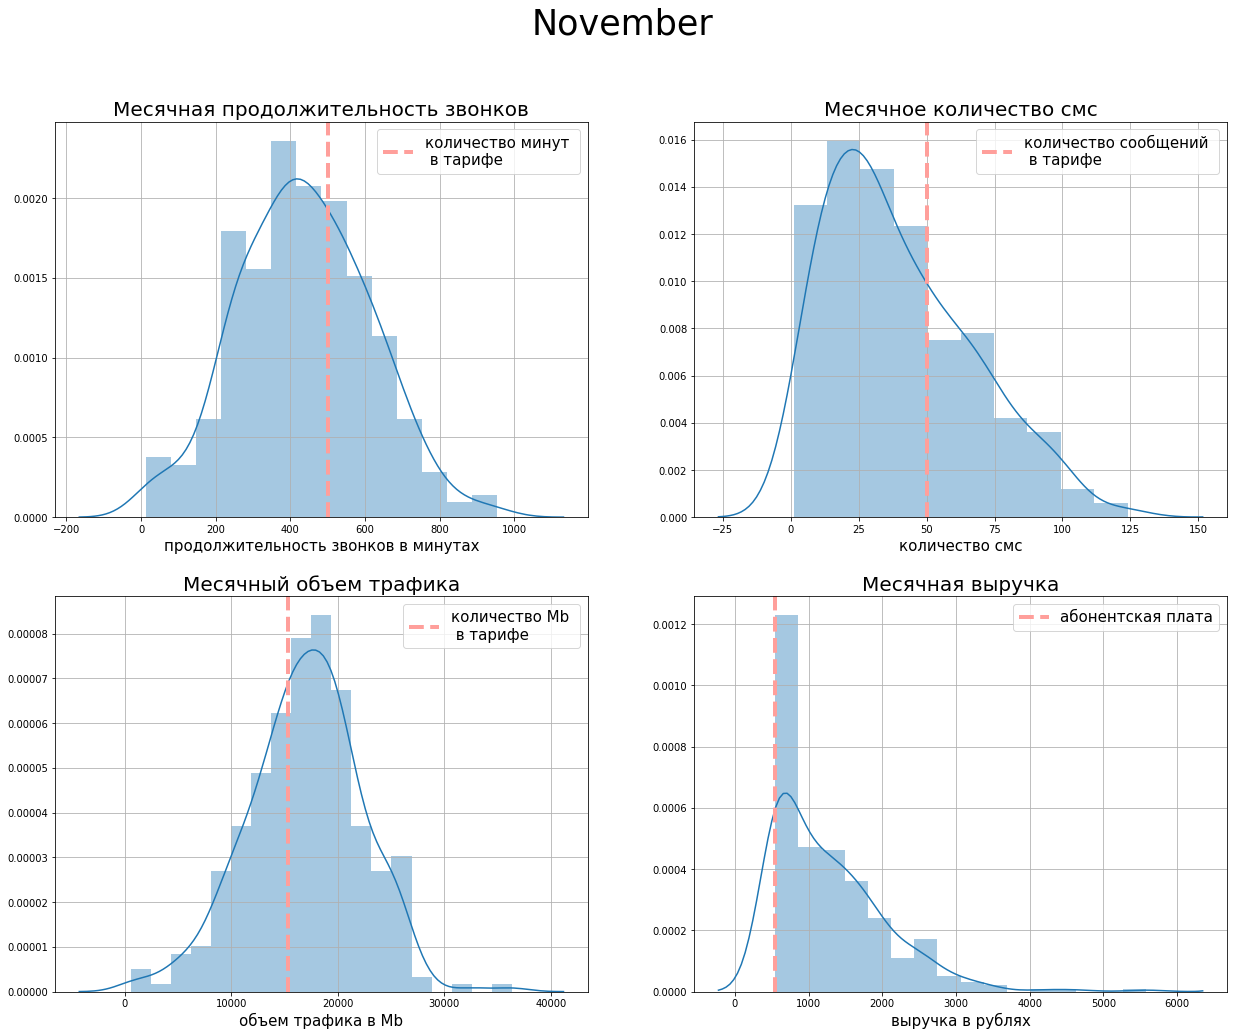

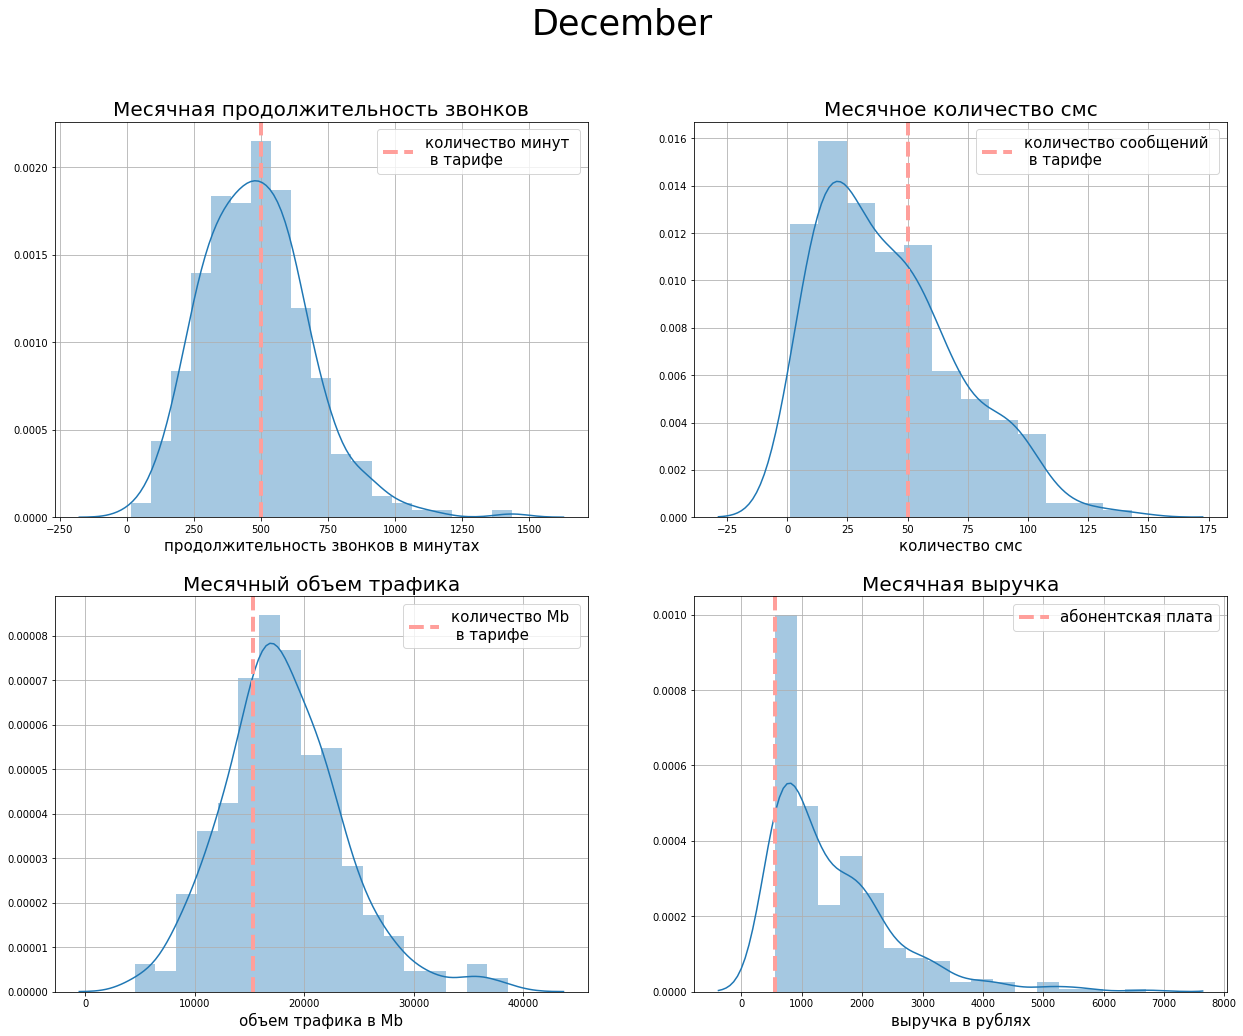

In [77]:
# пользователи тарифа smart

for month_number in range(1,13):

    month_distr_hist(users_smart_vertical, 'smart', month_number)

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


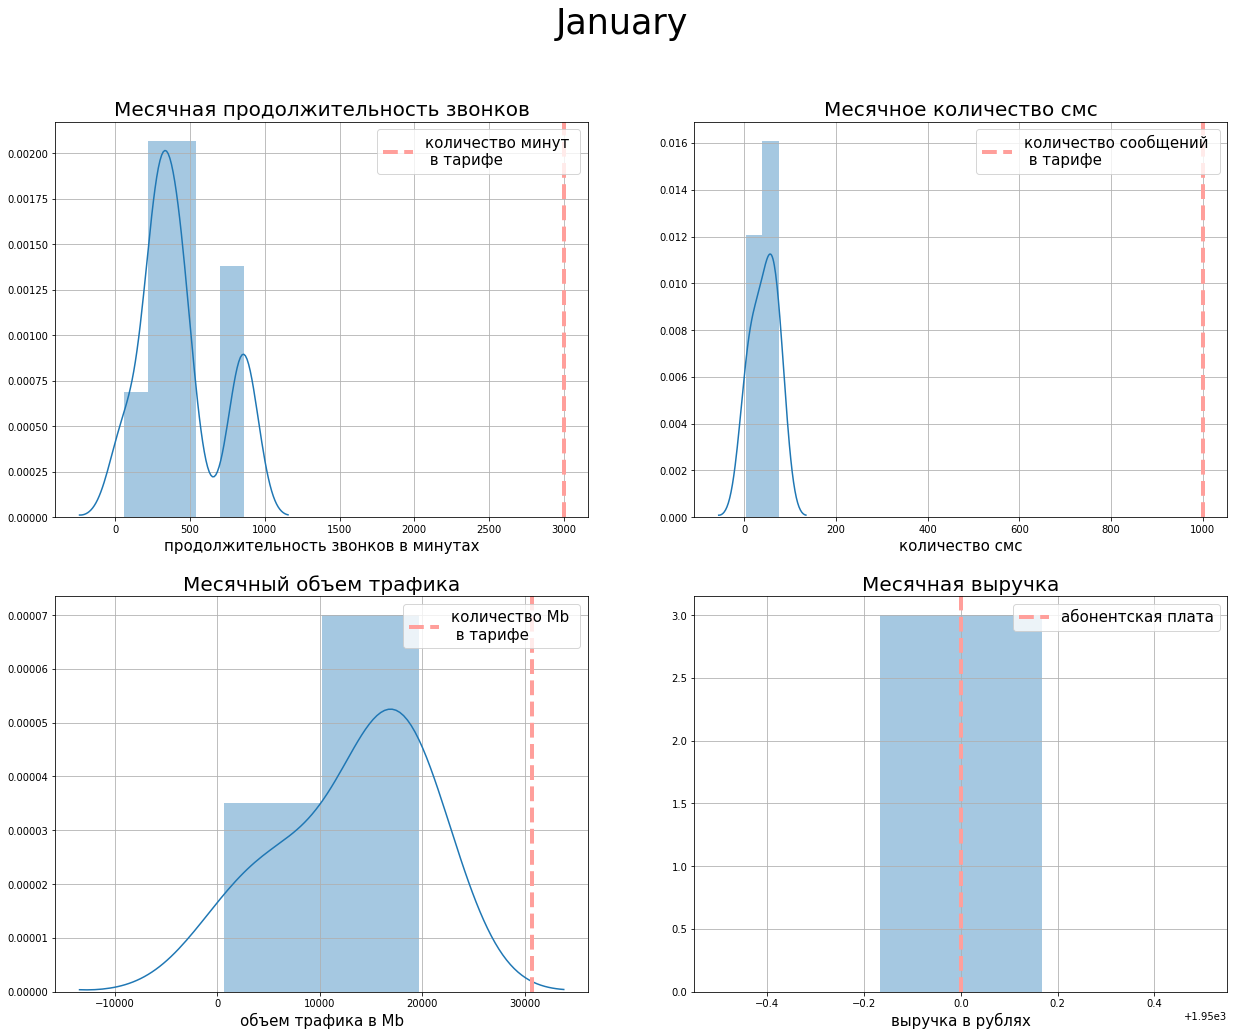

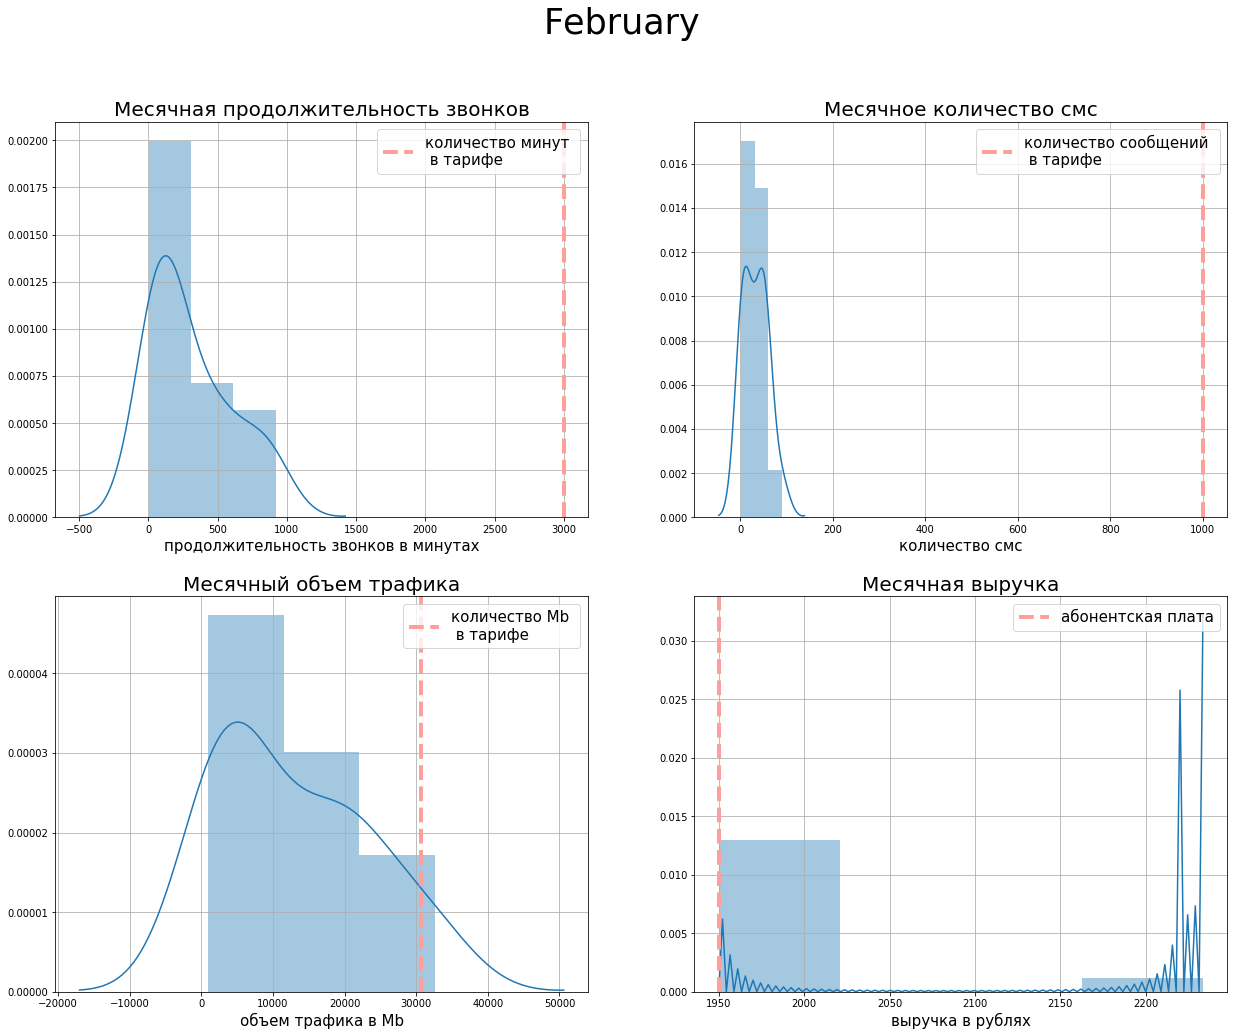

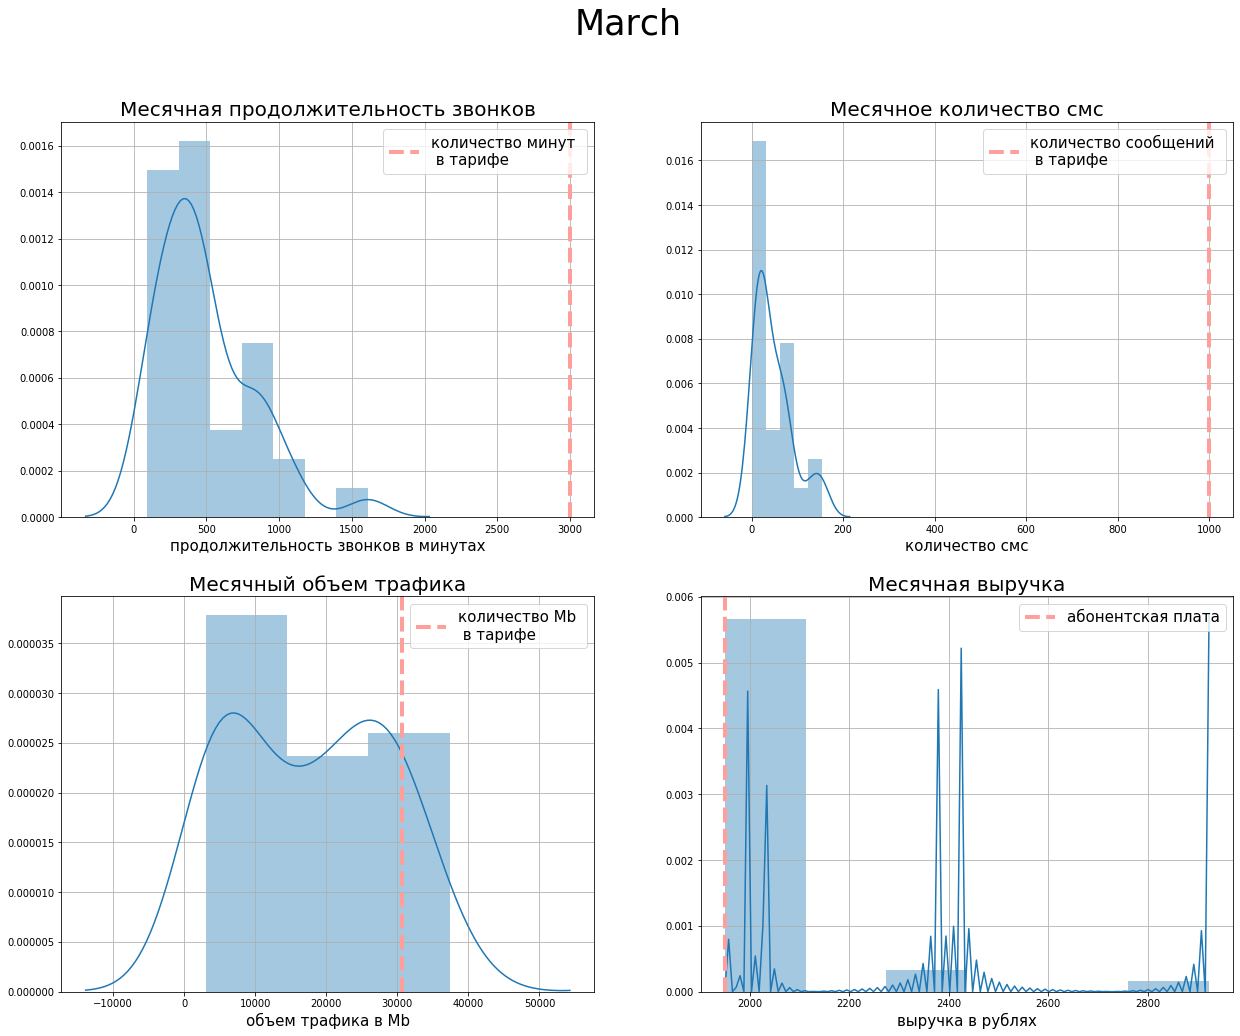

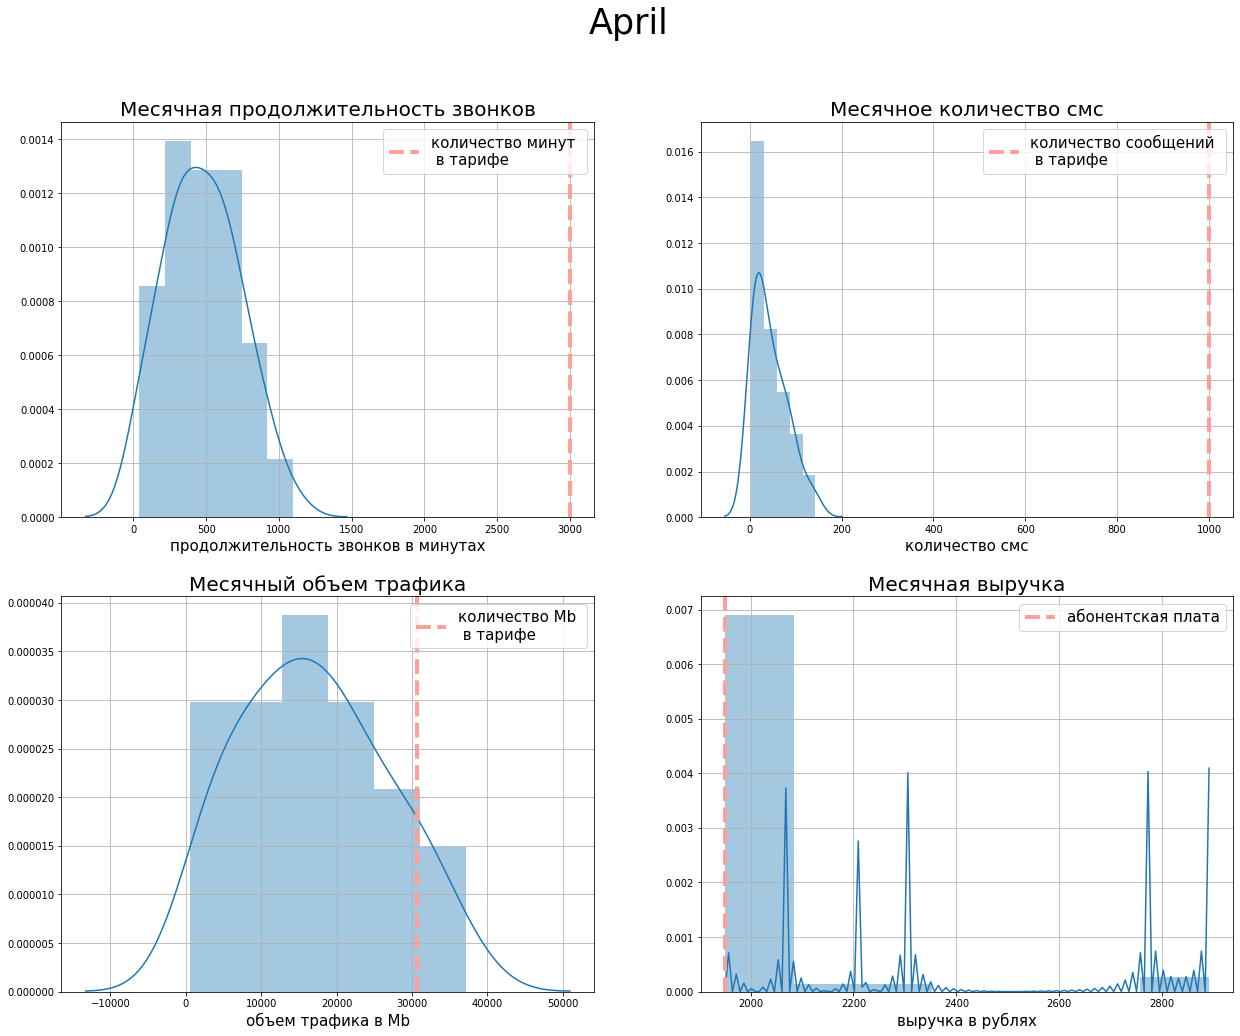

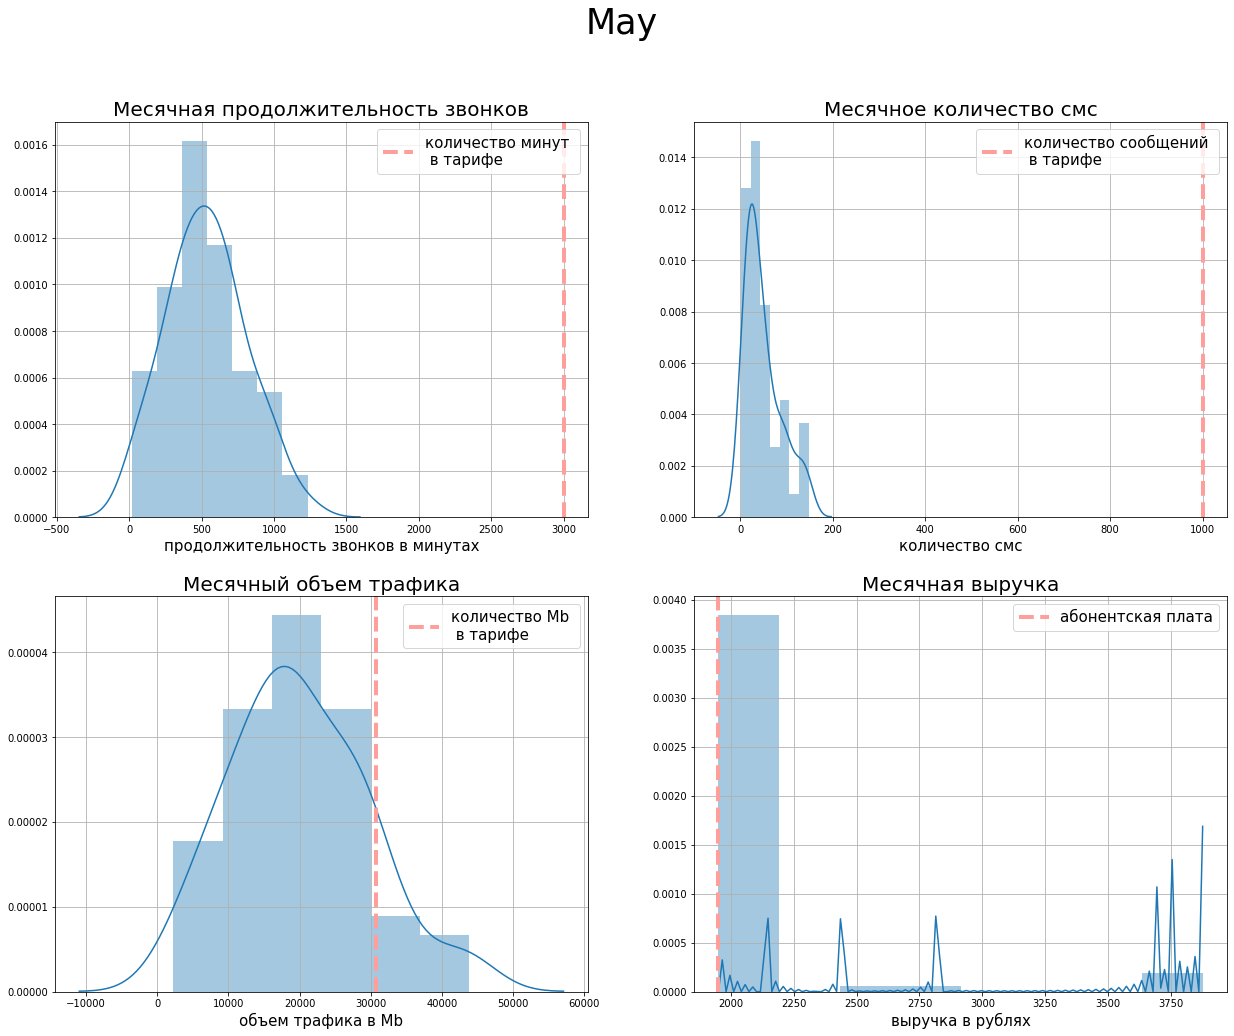

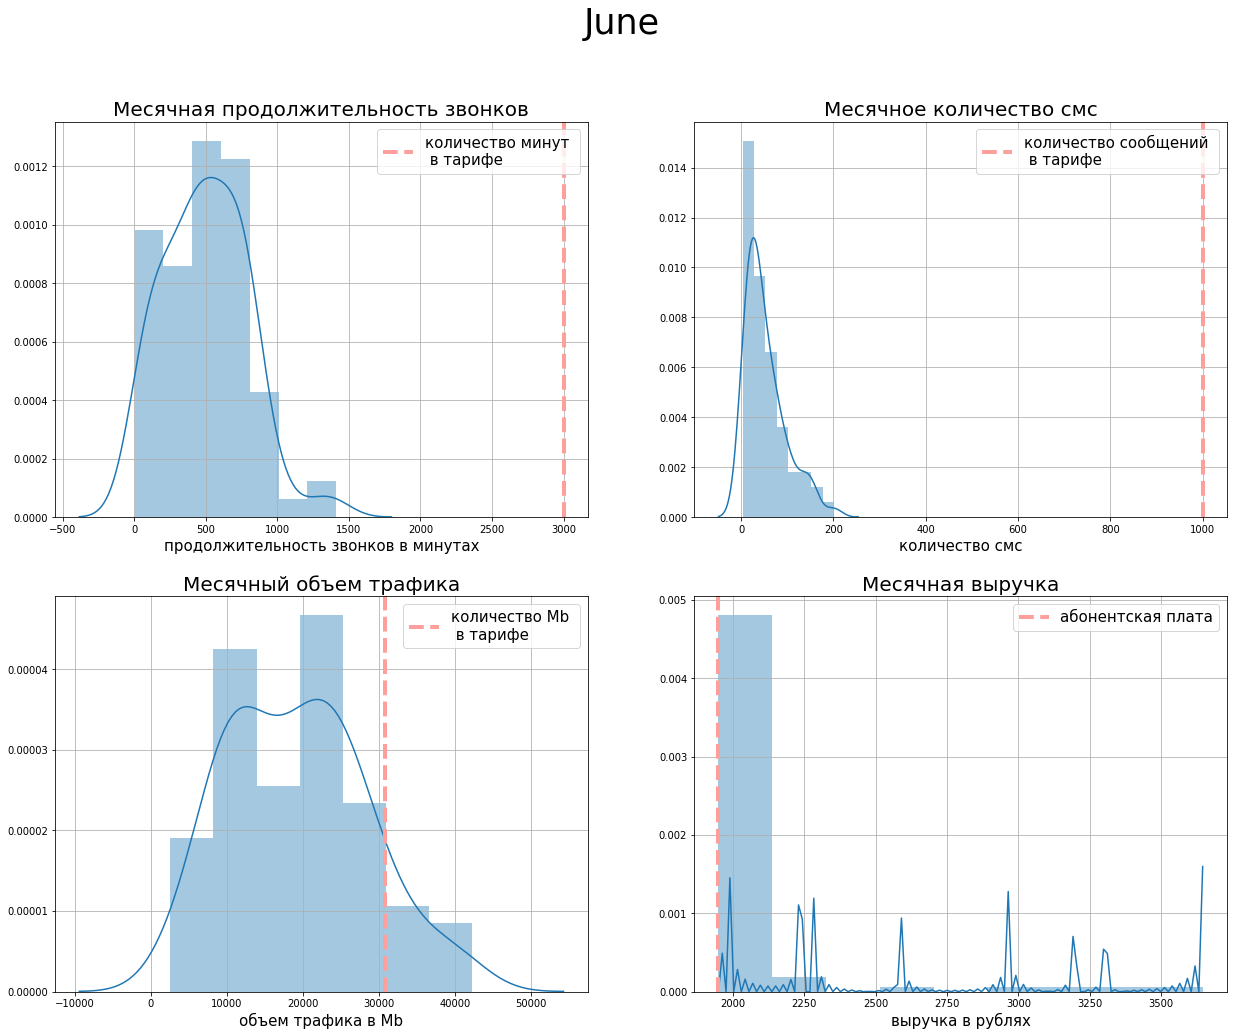

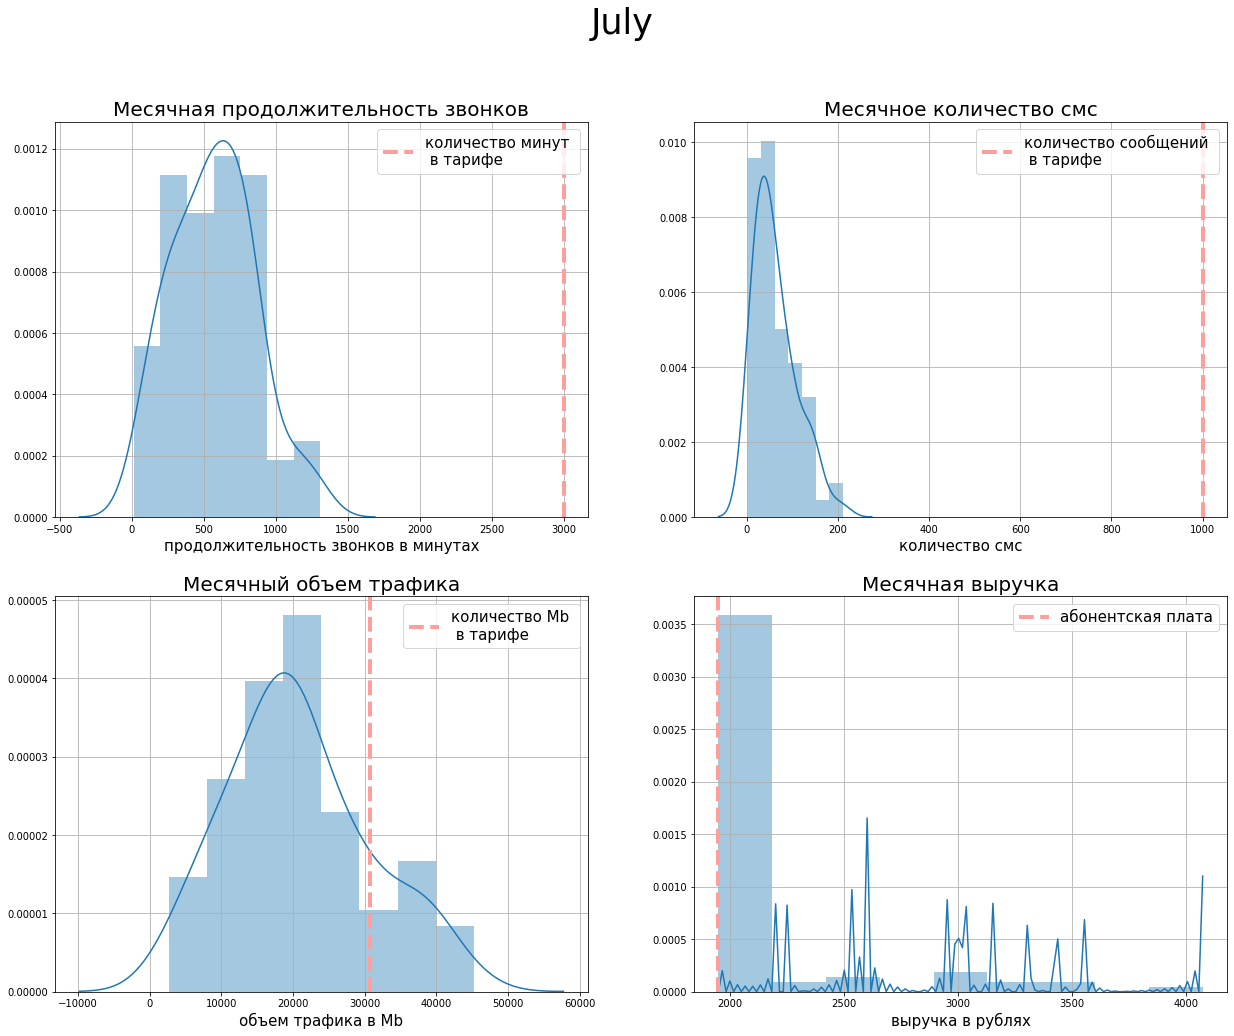

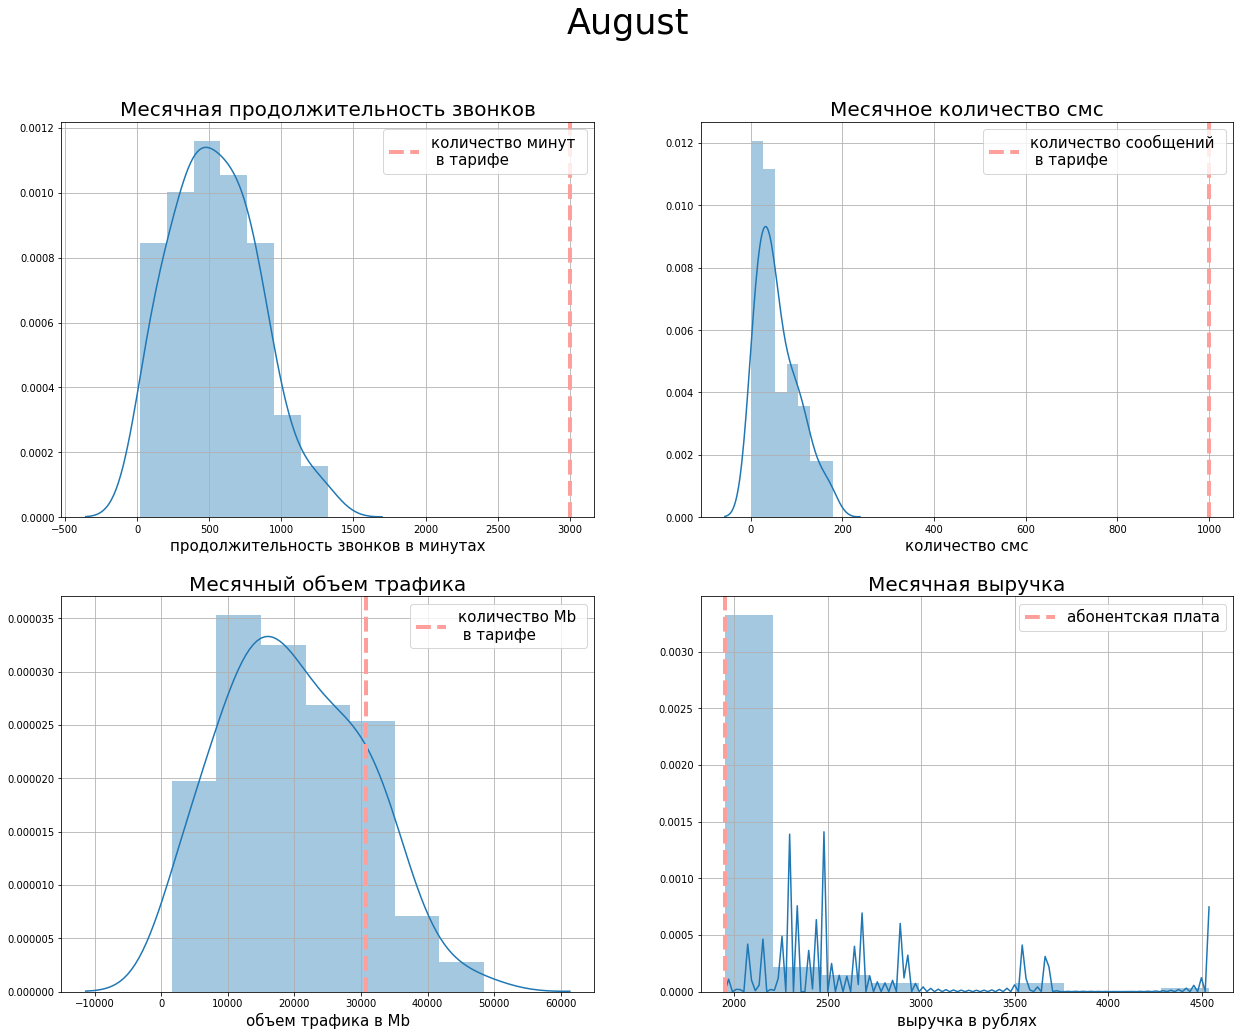

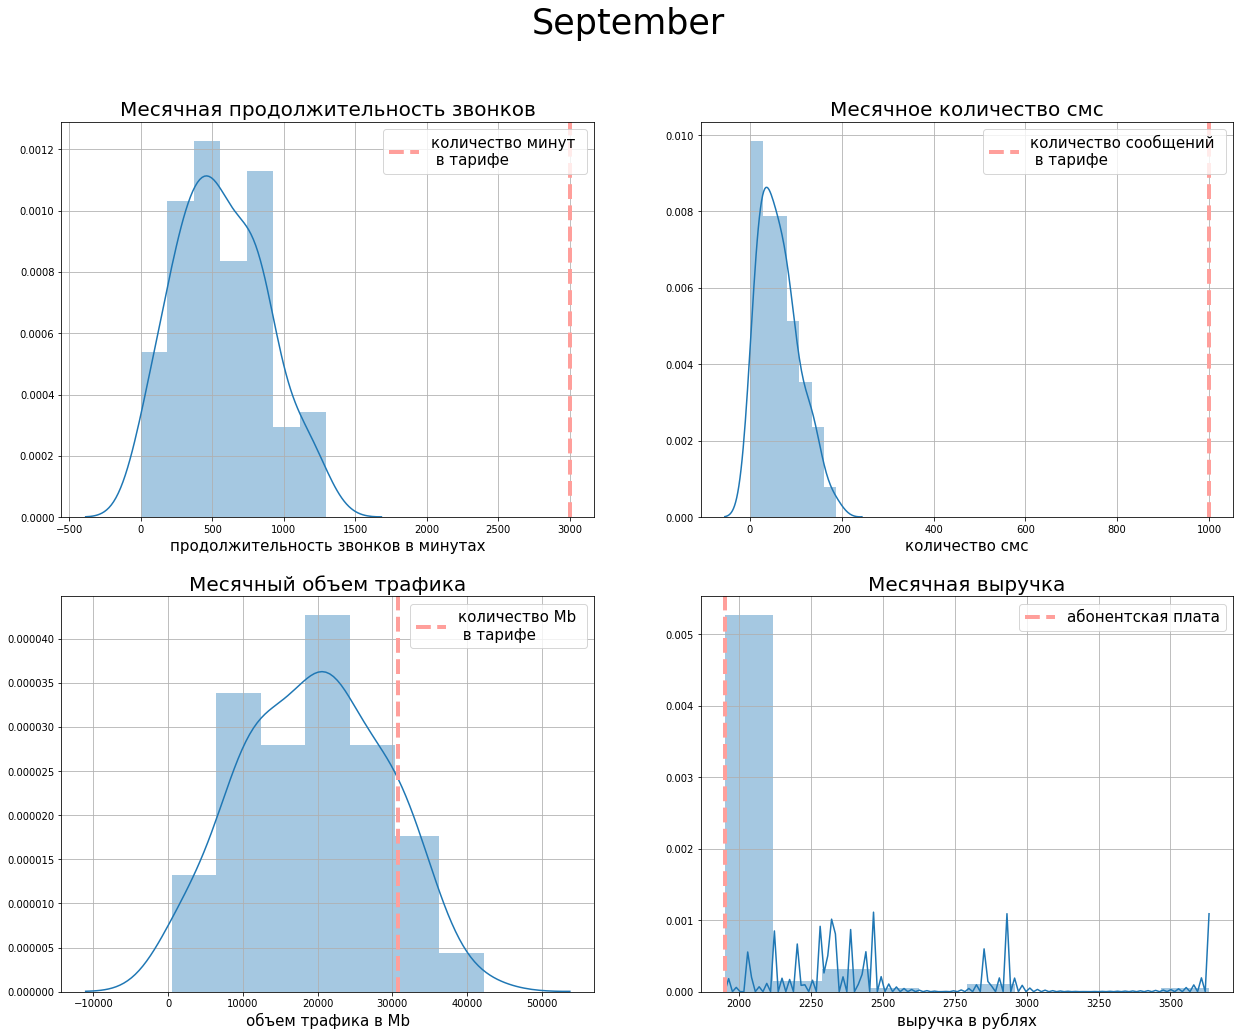

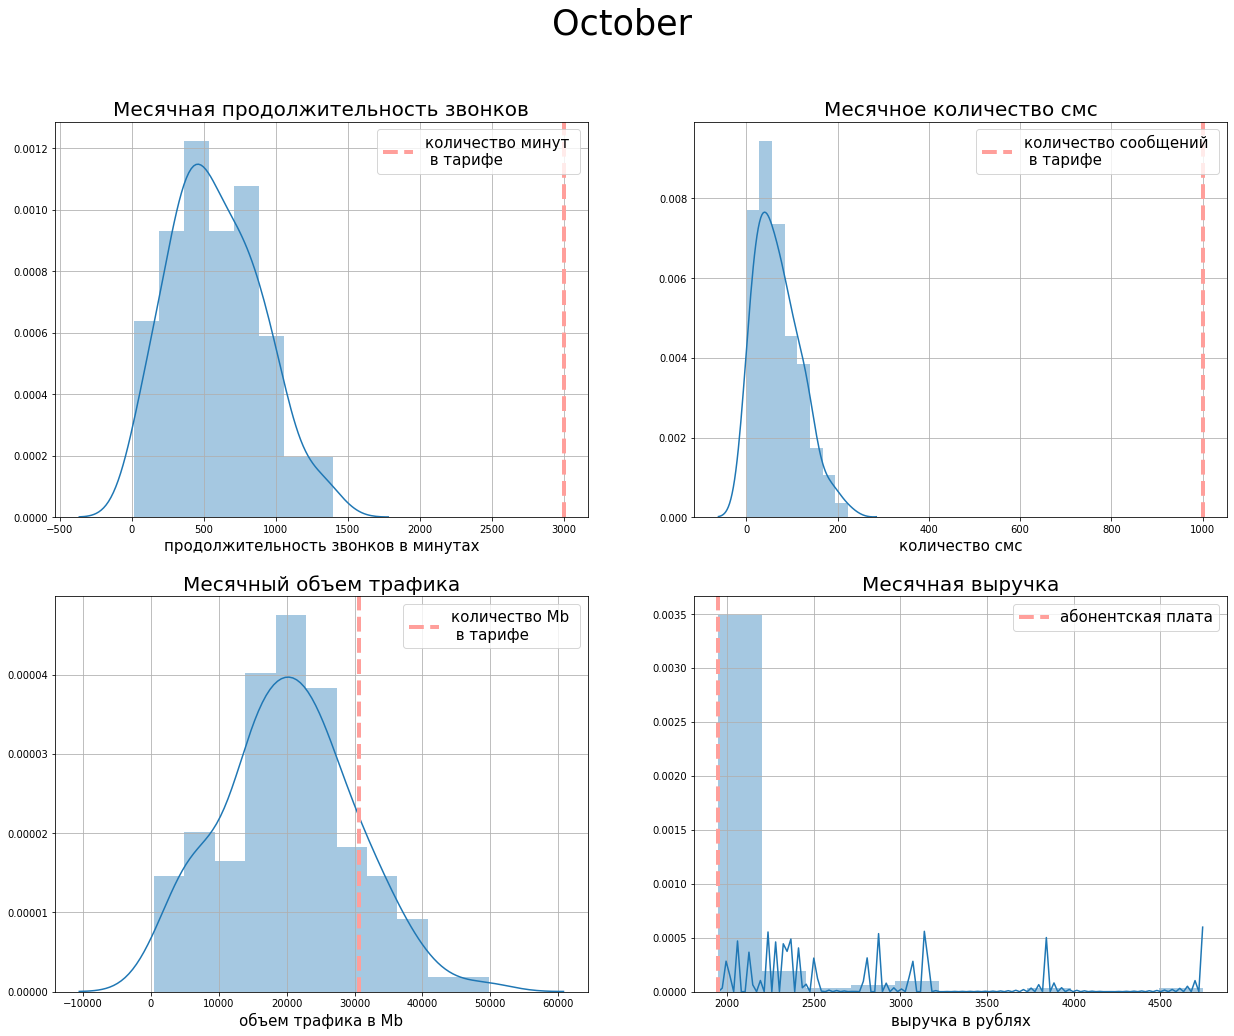

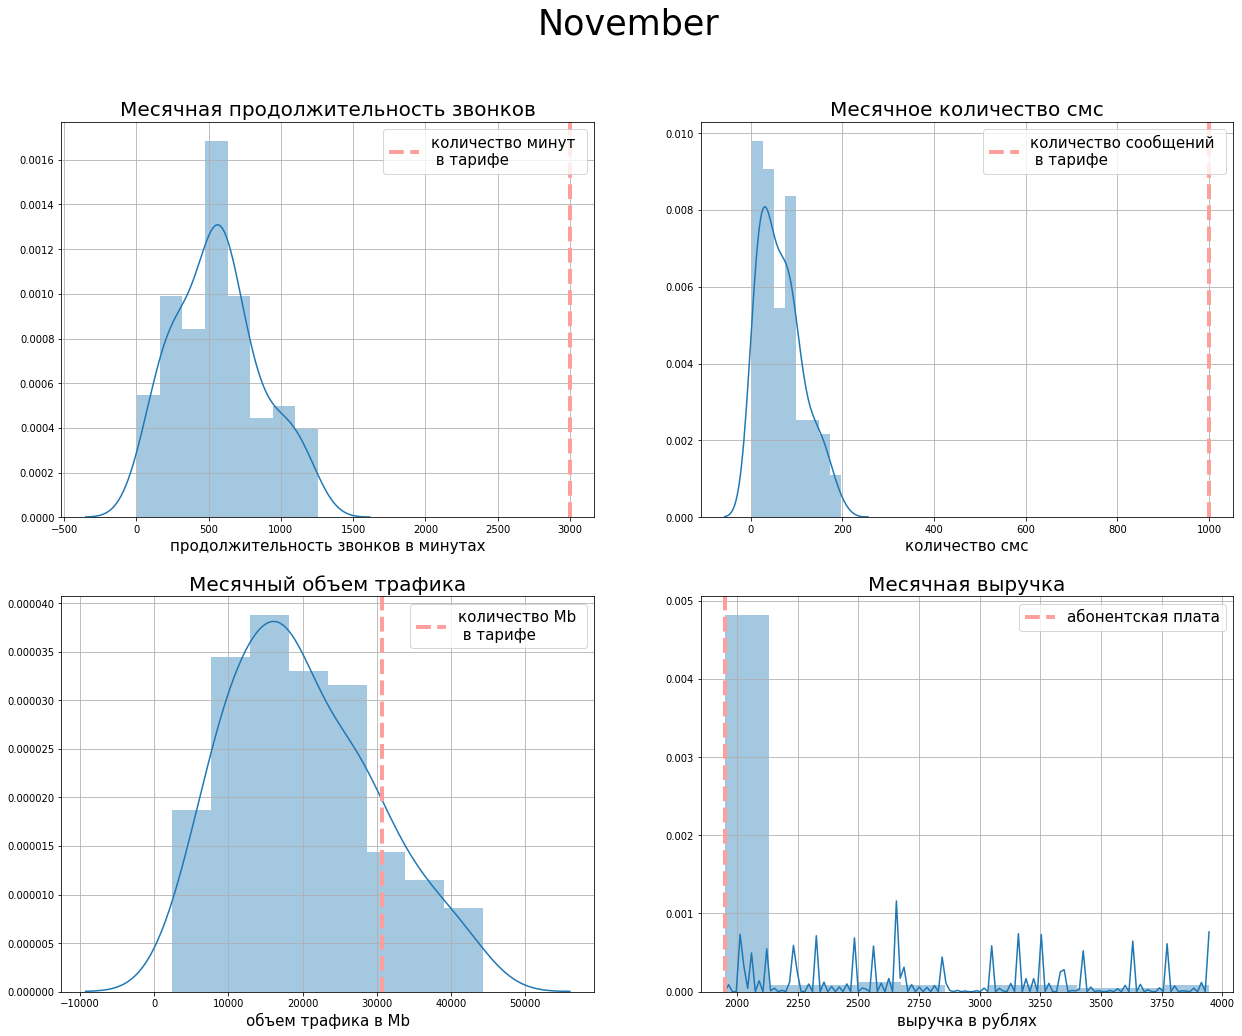

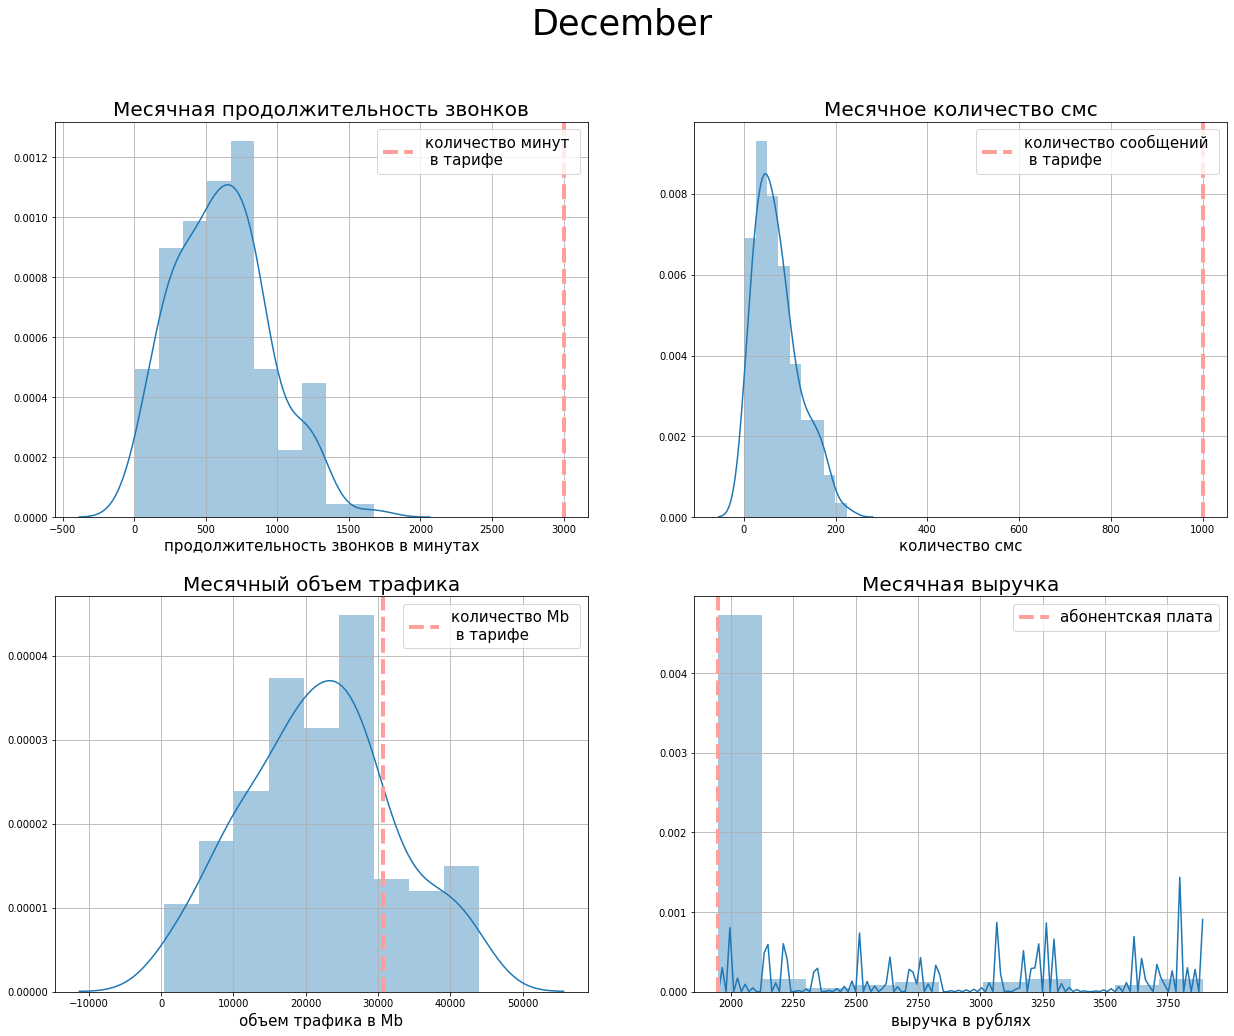

In [78]:
# пользователи тарифа ultra

for month_number in range(1,13):

    month_distr_hist(users_ultra_vertical, 'ultra', month_number)
    

### *Промежуточный вывод 3.*

По графикам можно сказать:
    
1.  **Пользователи smart**
    
    - средняя выручка стабильно росла от 1 до 12 месяца. Это обусловлено тем, что в более поздние месяцы росла активность использования мобильной связи (звонков, смс, интернета) при этом все больше клиентов превышали пакет тарифа, соответственно платили за дополнительную связь. При этом максимальная средняя месячная выручка не превысила 1600 рублей (что меньше абонентской платы тарифа ultra), а минимальная лишь немного превысила 550 рублей (абонентскую плату тарифа smart)
    
    - значительная часть пользователей выходит за границы тарифа. Особенно сильно это проявляется на примере интернет трафика. Это в свою очередь проявляется в росте выручки с пользователя
    
    - выручка с некоторых пользователей превышает абонентскую плату тарифа ultra
    
    
    
2. **Пользователи ультра**

    - средняя месячная выручка осциллирует около 2000 (это хорошо видно по диаграмме "ящик с усами", где самого ящика мы не наблюдаем, как и усов, видны только достаточно редкие выбросы). При этом, в отличие от пользователей smart, у которых наименее популярным оказался 1 месяц, у пользователей тарифа ultra использование мобильной связи просело во 2 месяце.
    
    -  всем пользователям хватает количества смс и минут в рамках тарифа. Тем не менее некоторая часть пользователь превышает лимит интернет трафика
    
    
    
После анализа графиков можно предположить, что наиболее перспективным является увеличение рекламного бюджета для тарифа ultra, т.к.:

1. пользователи это тарифа приносят большую выручку, и более стабильны по этому показателю


2. судя по росту выручки пользователей тарифа smart, которая для многих приближается к абоентской плате тарифа ultra, можно ожидать, что более продвинутая реклама тарифа ultra поможет части пользователей тарифа smart перейти на ultra

## Шаг 4. Проверяем гипотезы.

Теперь нам нужно проверить две гипотезы. Для проверки будем пользоваться t-тестом. Критический уровень статистической значимости выберем равным 0.05

In [79]:
# пороговое значение для p-value 

alpha =.05

### Гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Сформулируем нулевую гипотезу: **средняя выручка пользователей тарифа смарт, равна средней выручке пользователей тарифа ультра**.

Теперь воспользуемся t-тестом, если значение p-value будет превышать критический уровень статистической значимости (`alpha`), то нулевую гипотезу отвергнуть не получится. Если p-value будет меньше alpha, то можно сказать что средние выручки для двух тарифоф статистически различаются

In [80]:
# создаем списки с выборками пользователей разных тариффов

ultra_income = users_ultra_vertical['income'].dropna().values
smart_income = users_smart_vertical['income'].dropna().values

# проводит t-тест для независимых выборок

"""
аргументу equal_var передаем False, т.к. уже по графикам мы убедились в том, что дисперсии у выборок будут разными
"""

tariff_results = st.ttest_ind(ultra_income, smart_income, equal_var=False)


# выводим p-value на экран

print('p-значение:', tariff_results.pvalue)

# делаем проверку - если p-value меньше порогового значения, то отвергаем гипотезу.

if (tariff_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.931402711366754e-296
Отвергаем нулевую гипотезу


Гипотеза о равенстве средней выручки не подтвердилась. Этого следовало ожидать, т.к. на столбчатой диаграмме видно, что средняя выручка пользователей тарифа смарт осциллирует около 2000 рублей, а выручка смарт-клиентов, хоть и постоянно растет, но даже в пике лишь немного превышает 1400 рублей. 

**По результатам t-теста можно утверждать**: средние выручки пользователей тарифа смарт и ультра различаются

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Чтобы применить t-тест в данном случае, нам нужно для начала общую выборку разделить на две части - пользователи из Москвы и пользователи из других регионов.

Для начала убедимся, что Москва во всех строках таблицы записана единообразно

In [81]:
# получаем список названий всех городов

locality_names_list = users_month_distr['city'].value_counts().index.values

# создаем таблицу с названиями городов
locality_names = pd.DataFrame(data = locality_names_list, columns = ['name'])

# лемматизируем

locality_names['lemma'] = locality_names['name'].apply(m.lemmatize)


# в цикле проходим по всем леммам и ищем в них 'Москва', выводя названия локаций, где нашли таую лемму
for i in locality_names.index.values:
    if m.lemmatize('Москва')[0] in locality_names['lemma'][i]:
        print(locality_names['name'][i])

Москва


Отлично, Москва везде записана одинаково. А единообразность записи остальных городов нас сейчас не интересует. Теперь нам нужно разделить датафрейм vertical_pivot_join на москвичей и не москвичей. Правда столбца с названием города в этой таблице пока что нет. Добавим его для начала

In [82]:
# создаем пустой список, в который будем записывать названия города

city_list=[]

# в цикле идем по всем строкам таблицы vertical_pivot_join и записываем в список город, который соответствует юзеру
"""
получается, что мы 12 раз подряд записываем один и тот же город, потому что каждому пользователю
соответствует 12 строк (по числу месяцев)
"""

for i in vertical_pivot_join.index:
    
    city_list.append(users[users['user_id'] == i[0]]['city'].values[0])
    
# из списка с городами создаем датафрейм из одной колонки, но с мультииндексом, соответствующим vertical_pivot_join
    
city_column = pd.DataFrame(city_list, index=vertical_pivot_join.index)

# создаем в vertical_pivot_join новый столбец и присваиваем ему названия городов

vertical_pivot_join['city'] = city_column

In [83]:
# посмотрим на результат

vertical_pivot_join.head(25)

calls_total  calls_duration  messages_total  mb_total tariff  \
1000 1           NaN             NaN             NaN       NaN  ultra   
     2           NaN             NaN             NaN       NaN  ultra   
     3           NaN             NaN             NaN       NaN  ultra   
     4           NaN             NaN             NaN       NaN  ultra   
     5          17.0           159.0            22.0    2256.0  ultra   
     6          28.0           172.0            60.0   23257.0  ultra   
     7          41.0           340.0            75.0   14016.0  ultra   
     8          42.0           408.0            81.0   14070.0  ultra   
     9          46.0           466.0            57.0   14581.0  ultra   
     10         44.0           350.0            73.0   14717.0  ultra   
     11         37.0           338.0            58.0   14768.0  ultra   
     12         38.0           333.0            70.0    9827.0  ultra   
1001 1           NaN             NaN             NaN       NaN  smart   
     2           NaN             NaN             NaN       NaN  smart   
     3           NaN             NaN             NaN       NaN  smart   
     4           NaN             NaN             NaN       NaN  smart   
     5           NaN             NaN             NaN       NaN  smart   
     6           NaN             NaN             NaN       NaN  smart   
     7           NaN             NaN             NaN       NaN  smart   
     8           NaN             NaN             NaN       NaN  smart   
     9           NaN             NaN             NaN       NaN  smart   
     10          NaN             NaN             NaN       NaN  smart   
     11         45.0           430.0             NaN   18452.0  smart   
     12         47.0           414.0             NaN   14053.0  smart   
1002 1           NaN             NaN             NaN       NaN  smart   

             income         city  
1000 1          NaN    Краснодар  
     2          NaN    Краснодар  
     3          NaN    Краснодар  
     4          NaN    Краснодар  
     5   1950.00000    Краснодар  
     6   1950.00000    Краснодар  
     7   1950.00000    Краснодар  
     8   1950.00000    Краснодар  
     9   1950.00000    Краснодар  
     10  1950.00000    Краснодар  
     11  1950.00000    Краснодар  
     12  1950.00000    Краснодар  
1001 1          NaN       Москва  
     2          NaN       Москва  
     3          NaN       Москва  
     4          NaN       Москва  
     5          NaN       Москва  
     6          NaN       Москва  
     7          NaN       Москва  
     8          NaN       Москва  
     9          NaN       Москва  
     10         NaN       Москва  
     11  1153.90625       Москва  
     12   550.00000       Москва  
1002 1          NaN  Стерлитамак

Отлично, теперь можно разделить пользователей на москвичей и не москвичей

In [84]:
moscow_values = vertical_pivot_join[vertical_pivot_join['city'] == 'Москва']
regions_values = vertical_pivot_join[vertical_pivot_join['city'] != 'Москва']

Мы выделили пользователей из Москвы и из других регионов. Теперь воспользуемся t-тестом, сформулировав нулевую гипотезу так: **средняя выручка пользователей из Москвы не отличается от выручки пользователей из регионов**

In [85]:
# создаем списки с выборками пользователей разных тариффов

moscow_income = moscow_values['income'].dropna().values
regions_income = regions_values['income'].dropna().values

# проводим t-тест для независимых выборок

city_results = st.ttest_ind(moscow_income, regions_income, equal_var=False)

# выводим p-value на экран

print('p-значение:', city_results.pvalue)

# делаем проверку - если p-value меньше порогового значения, то отвергаем гипотезу.

if (city_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4549775646471024
Не получилось отвергнуть нулевую гипотезу


**По результатам t-теста можно утверждать**: средняя выручка пользователей из Москвы статистически **НЕ** отличается от средней выручки пользователей из других регионов

### *Промежуточный вывод 4.*

С помощью t-теста были проверены две гипотезы:
    
1. О равенстве средней выручки пользователей тарифа смарт и пользователе тарифа ультра
    
    - по результатам теста можно утверждать, что средние выручки статистически различаются
    
        
2. О равенстве средней выручки пользователей из Москвы и пользователей из других регионов

    - по результатам теста можно утверждать, что средние выручки статичтически не различаются
    
  
***Пороговое значение статистической значимости было выбрано равным 0.05***

## Шаг 5. Общий вывод.

В процессе проекта было реализовано:
    
1. Тип всех столбцов, содержащих дату был изменен на datetime


2. Количество минут и Mb, израсходованных пользователем были округлены вверх, согласно условию


3. Для последующего анализа из таблиц `calls` и `internet` были удалены записи о звонках с нулевой продолжительностью и сессиях с нулевым трафиком


4. Были созданы сводные таблицы по количеству и продолжительности звонков/количеству смс/израсходованному трафику, в качестве индексов были выбраны id пользователей, а в качетсве колонок - номера календарных месяцев


5. Была создана общая сводная таблица, путем объединения сводных таблиц по звонкам, смс и трафику с таблицей `users`, содержащей личные данные клиентов


6. В общую сводную таблицу были добавлены данные о помесячной выручке с каждого клиента


7. Были построены таблицы, содержащие информацию о среднем, дисперсии и стандартном отклонении для общей длительности звонков в месяце, общего количества смс в месяце, общего объема интернет трафика, выручки с клиента для:

    - пользователей тарифа smart
    
    - пользователей тарифа ultra
    
    - пользователей из Москвы
    
    - пользователей из регионов
    
   
8. По таблицам были построены графики годовых распределений длительности звонков, количества сообщений, объема трафика и выручки

    - по графикам можно предположить, что целесообразным является увеличение рекламного бюджета для тарифа ultra, т.к. пользователи это тарифа приносят большую прибыль, и более стабильны по этому показателю
    
    
9. С помощью t-теста были проверены две гипотезы (пороговое значение статистической значимости 0.05)

    - О равенстве средней выручки пользователей тарифа смарт и пользователе тарифа ультра
    
        - по результатам теста можно утверждать, что средние выручки статистически различаются
     
    - О равенстве средней выручки пользователей из Москвы и пользователей из других регионов

        - по результатам теста можно утверждать, что средние выручки статичтически не различаются